## 데이터 분석의 과정

![](images/process.png){width=500 fig-align="center"} <br />
source: [R for Data Science](https://r4ds.had.co.nz/explore-intro.html)


- Transform (데이터 변형)
    - 데이터의 변수들 중 일부를 선택하기
    - 필요한 부분를 필터링하기
    - 기존의 변수들로 새로운 변수 만들기
    - 요약자료를 계산하기
- Visualise (시각화)
    - 시각화를 통해 데이터가 품고 있는 정보를 파악하여 데이터에 대한 이해를 높임
- Model (모형)
    - 시각화와 데이터 변형의 두 가지를 병행하면서 호기심과 의구심을 갖고 연구자가 자신의 관심사에 답을 구하는 탐색적 분석을 하는 과정
    - 이 과정에서 모형을 세우고 데이터를 얼마나 잘 설명하는지를 살펴보고, 모형을 수정해 나가는 과정을 거침

## First steps

In [7]:
#| code-fold: true
#| code-summary: Load packages

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

# statistics
import statsmodels.api as sm

In [8]:
#| echo: false
from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')
pd.options.display.notebook_repr_html = False

In [9]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

Data: *Fuel economy data from 1999 to 2008 for 38 popular models of cars*

In [10]:
# import the dataset
mpg_data = sm.datasets.get_rdataset("mpg", "ggplot2")
mpg = mpg_data.data

In [6]:
#| output: false
# Description
print(mpg_data.__doc__)

.. container::

   === ===============
   mpg R Documentation
   === ===============

   .. rubric:: Fuel economy data from 1999 to 2008 for 38 popular models
      of cars
      :name: fuel-economy-data-from-1999-to-2008-for-38-popular-models-of-cars

   .. rubric:: Description
      :name: description

   This dataset contains a subset of the fuel economy data that the EPA
   makes available on https://fueleconomy.gov/. It contains only models
   which had a new release every year between 1999 and 2008 - this was
   used as a proxy for the popularity of the car.

   .. rubric:: Usage
      :name: usage

   ::

      mpg

   .. rubric:: Format
      :name: format

   A data frame with 234 rows and 11 variables:

   manufacturer
      manufacturer name

   model
      model name

   displ
      engine displacement, in litres

   year
      year of manufacture

   cyl
      number of cylinders

   trans
      type of transmission

   drv
      the type of drive train, where f = front-wh

In [7]:
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

  
  
Q: 엔진의 크기(displ)와 연비(hwy)는 어떤 관계에 있는가?

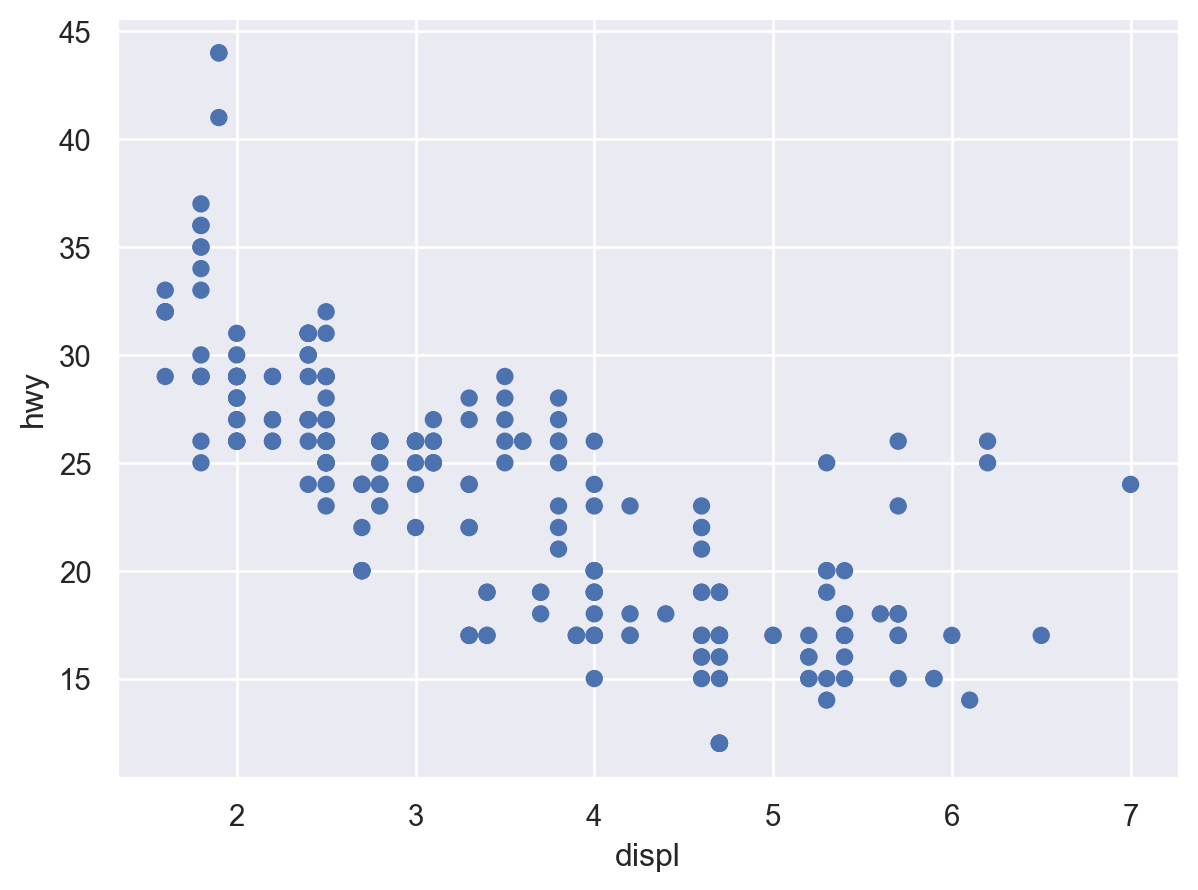

In [8]:
# Scatter plot: 산포도
(
    so.Plot(mpg, x="displ", y="hwy") # empty plot을 생성하고, x, y축에 mapping할 mpg 데이터의 변수를 지정
    .add(so.Dot()) # layer를 추가하여, points들을 Dot이라는 mark object를 써서 표현
)

::: {.callout-important}

**Layer-specific mappings**  
global vs. local mapping

다음과 같이 첫번째 layer 안에서 x, y를 mapping하는 경우, 이후 새로 추가되는 layer에는 그 mapping이 적용되지 않음

```
(
    so.Plot(mpg)
    .add(so.Dot(), x="displ", y="hwy") # 이 layer에서만 mapping이 유효
)
```

:::

::: {.callout-tip}

다음과 같이 x, y를 생략하거나 간략히 할 수 있으나...

```
so.Plot(mpg, "displ", "hwy").add(so.Dot())
```

:::

#### 카테고리 변수인 경우

- cyl (실린더 개수), hwy (고속도로 연비)의 관계를 scatterplot으로 살펴볼 수 있는가? (left)
- class (차량 타입), drv (전륜 구동, 후륜 구동, 4륜 구동 타입)의 관계는 어떠한가? (right)

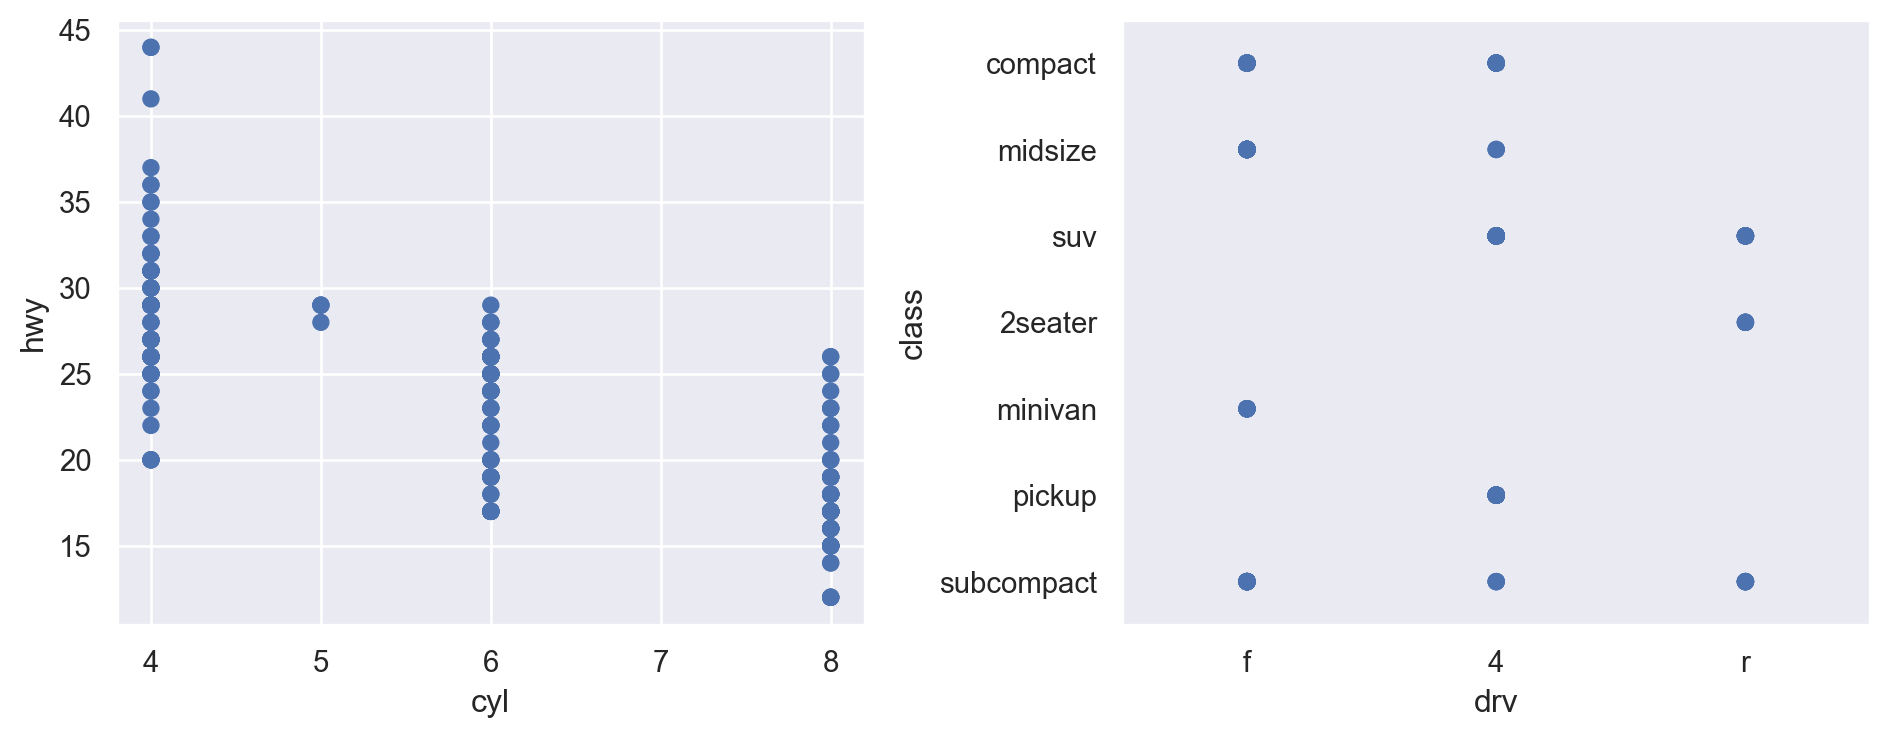

In [9]:
#| echo: false

(
    so.Plot(mpg)
    .pair(
        x=["cyl", "drv"],
        y=["hwy", "class"],
        cross=False,
    )
    .add(so.Dot())
    .layout(size=(10, 4))
)

## Aesthetic mappings

Q: 엔진의 크기와 연비와의 관계에서 보이는 트렌드 라인에서 심하게 벗어난 것이 있는가?

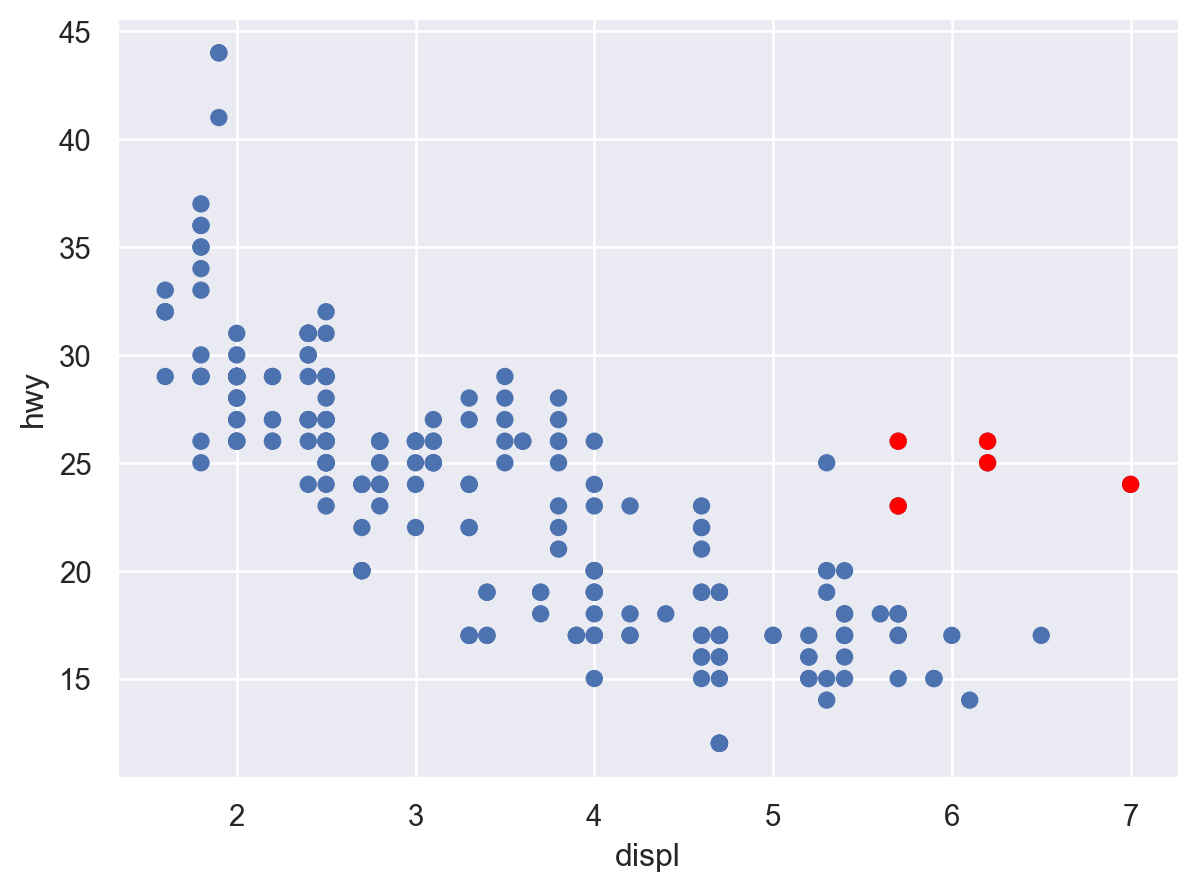

In [10]:
#| echo: false

mpg_2seater = mpg[mpg['class'] == "2seater"]

(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot())
    .add(so.Dot(color="red"), x=mpg_2seater.displ, y=mpg_2seater.hwy)
)


<br />
변수들을 x, y라는 position에 mapping하는 것에 추가하여 다음과 같은 속성(aesthetic)에 mapping할 수 있음

**색(color), 크기(pointsize), 모양(marker), 선 종류(linestyle), 투명도(alpha)**

![](images/aesthetics.png){width=400}

### Color

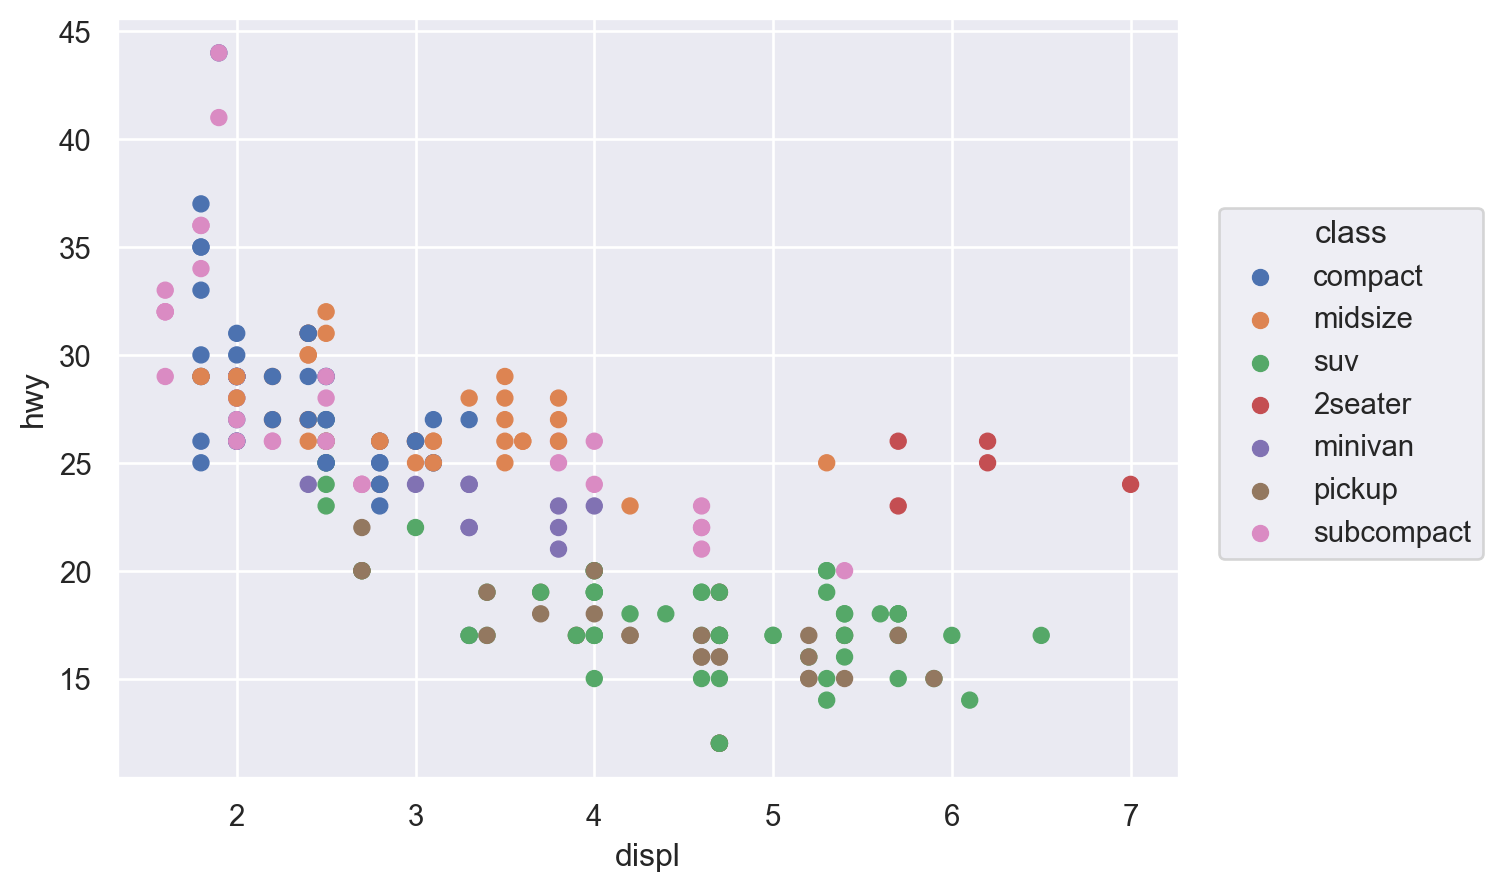

In [11]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class")
    .add(so.Dot())
)

### Pointsize

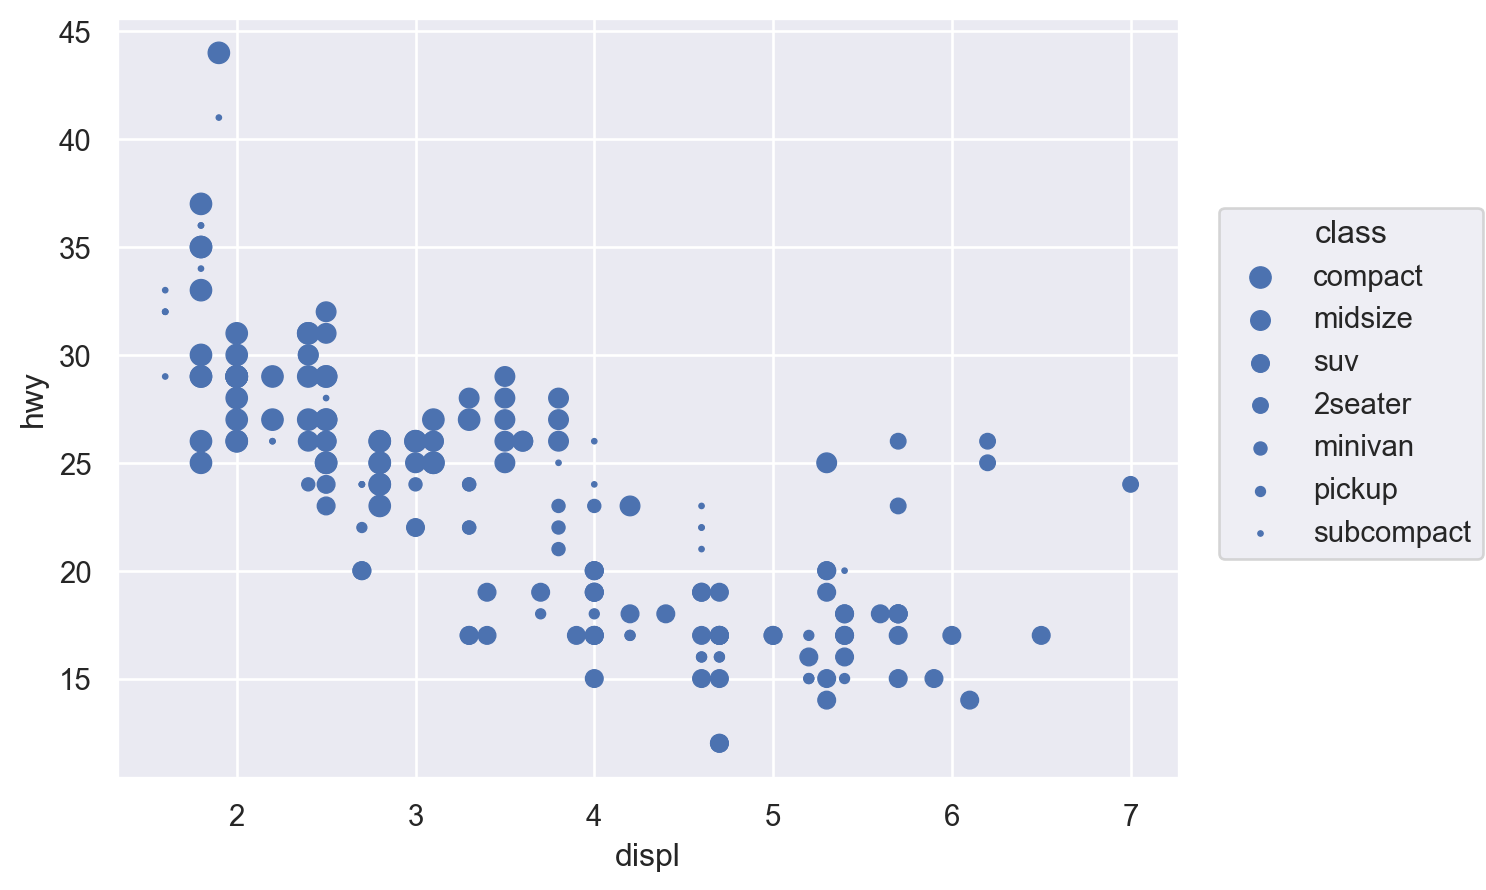

In [12]:
(
    so.Plot(mpg, x="displ", y="hwy", pointsize="class")
    .add(so.Dot())
)

### Marker

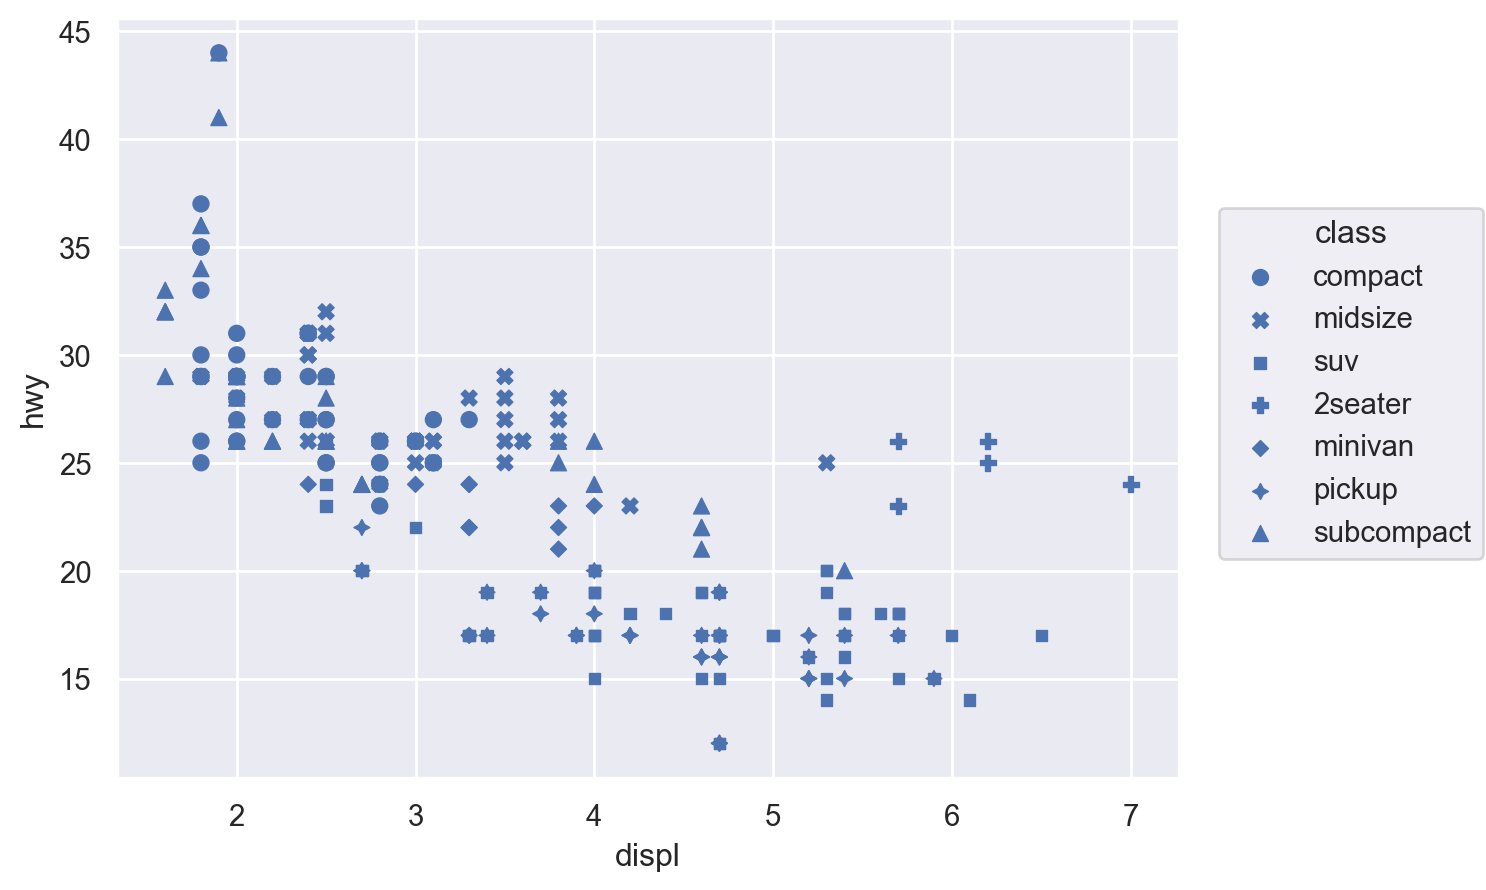

In [13]:
(
    so.Plot(mpg, x="displ", y="hwy", marker="class")
    .add(so.Dot())
)

### Alpha

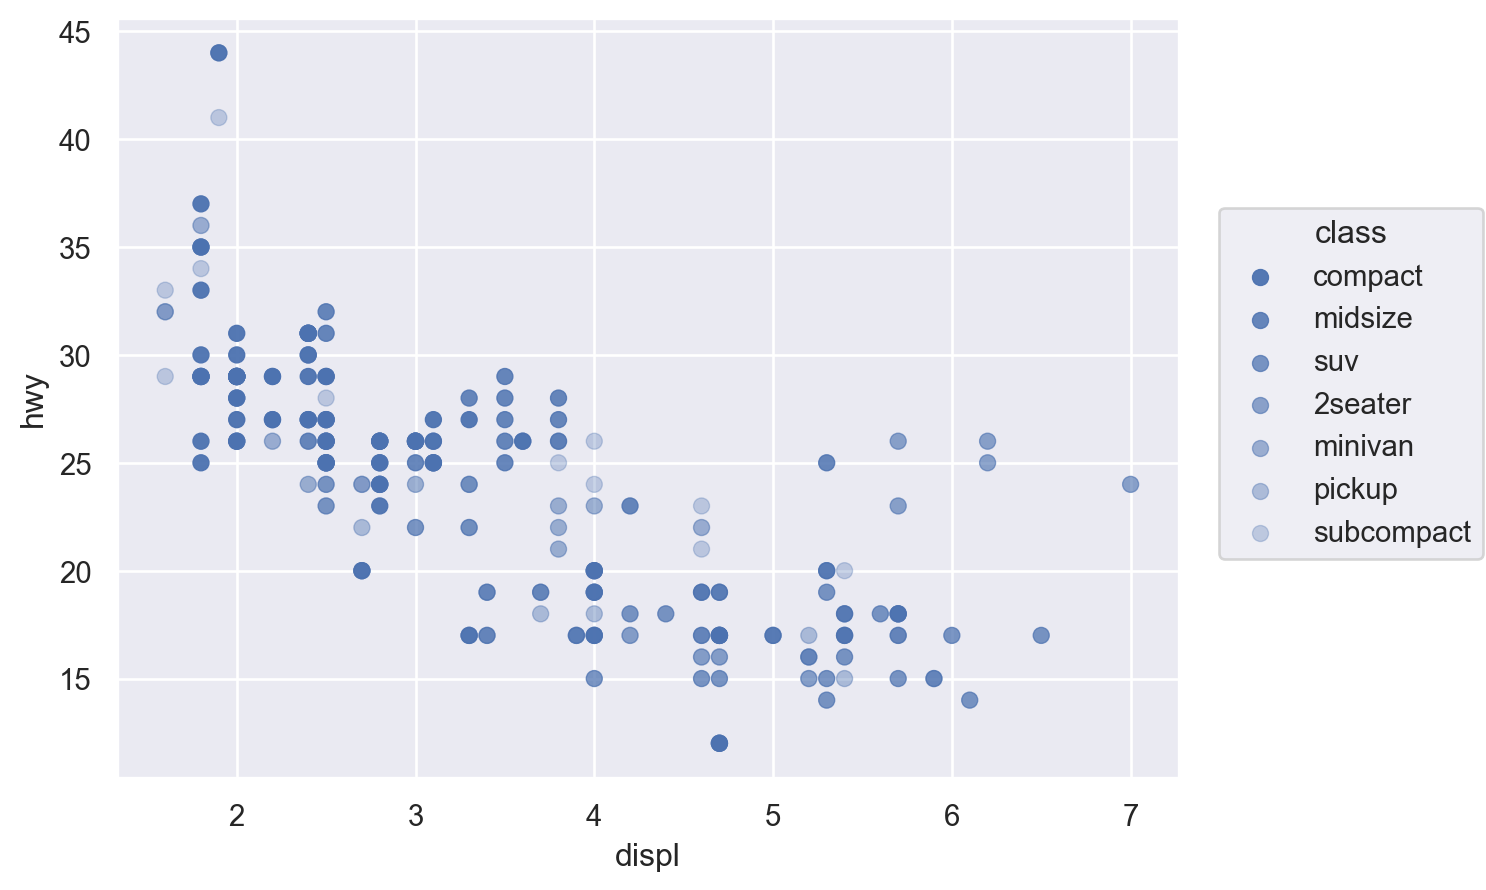

In [14]:
(
    so.Plot(mpg, x="displ", y="hwy", alpha="class")
    .add(so.Dot())
)

### Linestyle

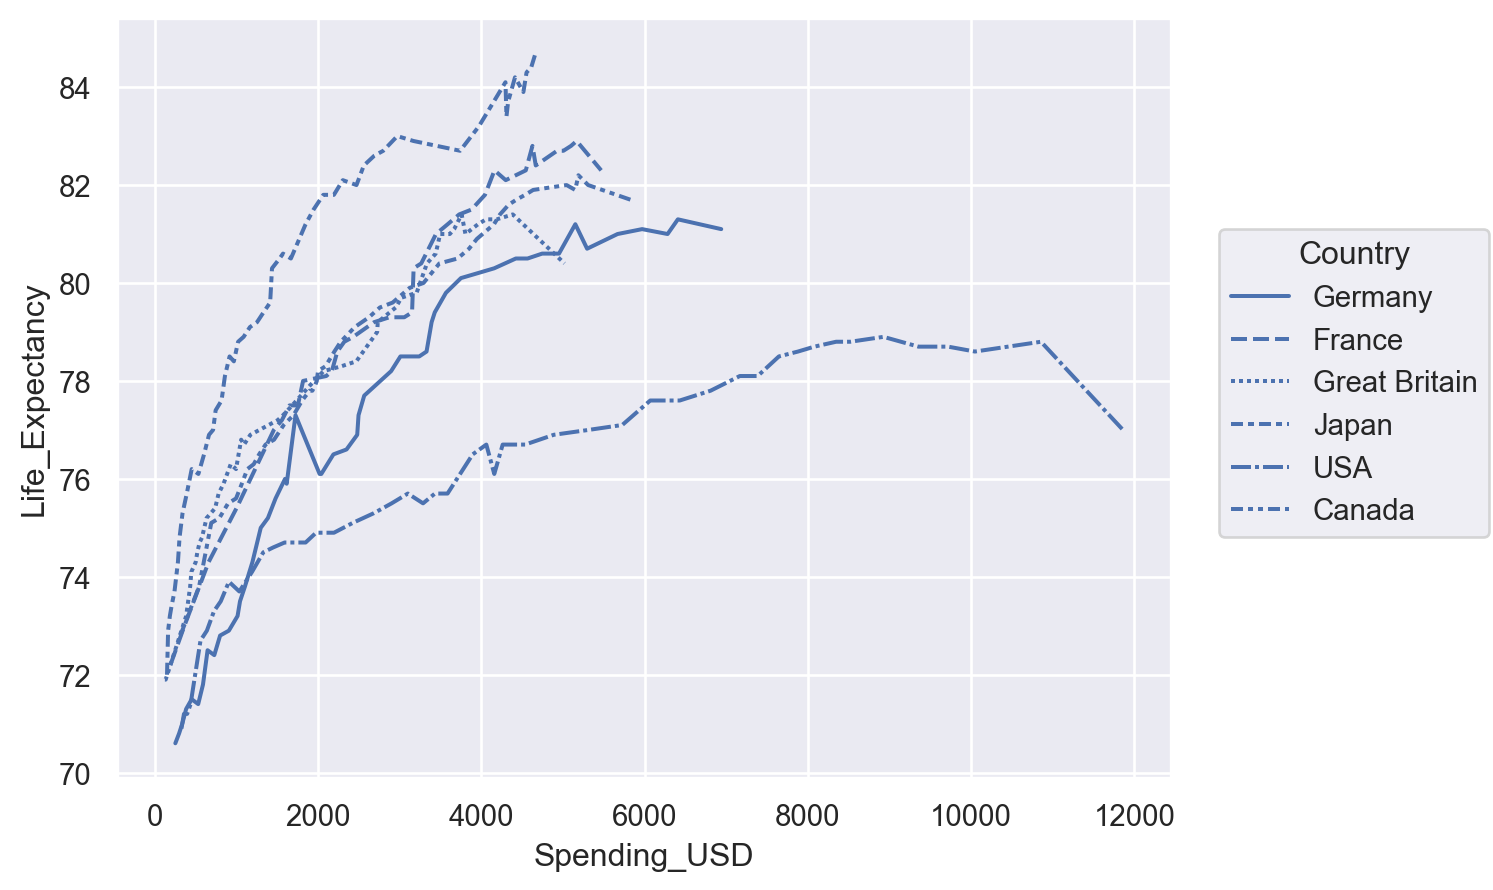

In [15]:
healthexp = sns.load_dataset("healthexp")

p = so.Plot(healthexp, x="Spending_USD", y="Life_Expectancy", linestyle="Country")
p.add(so.Line())

### 두 가지 이상의 속성
ex. color & marker

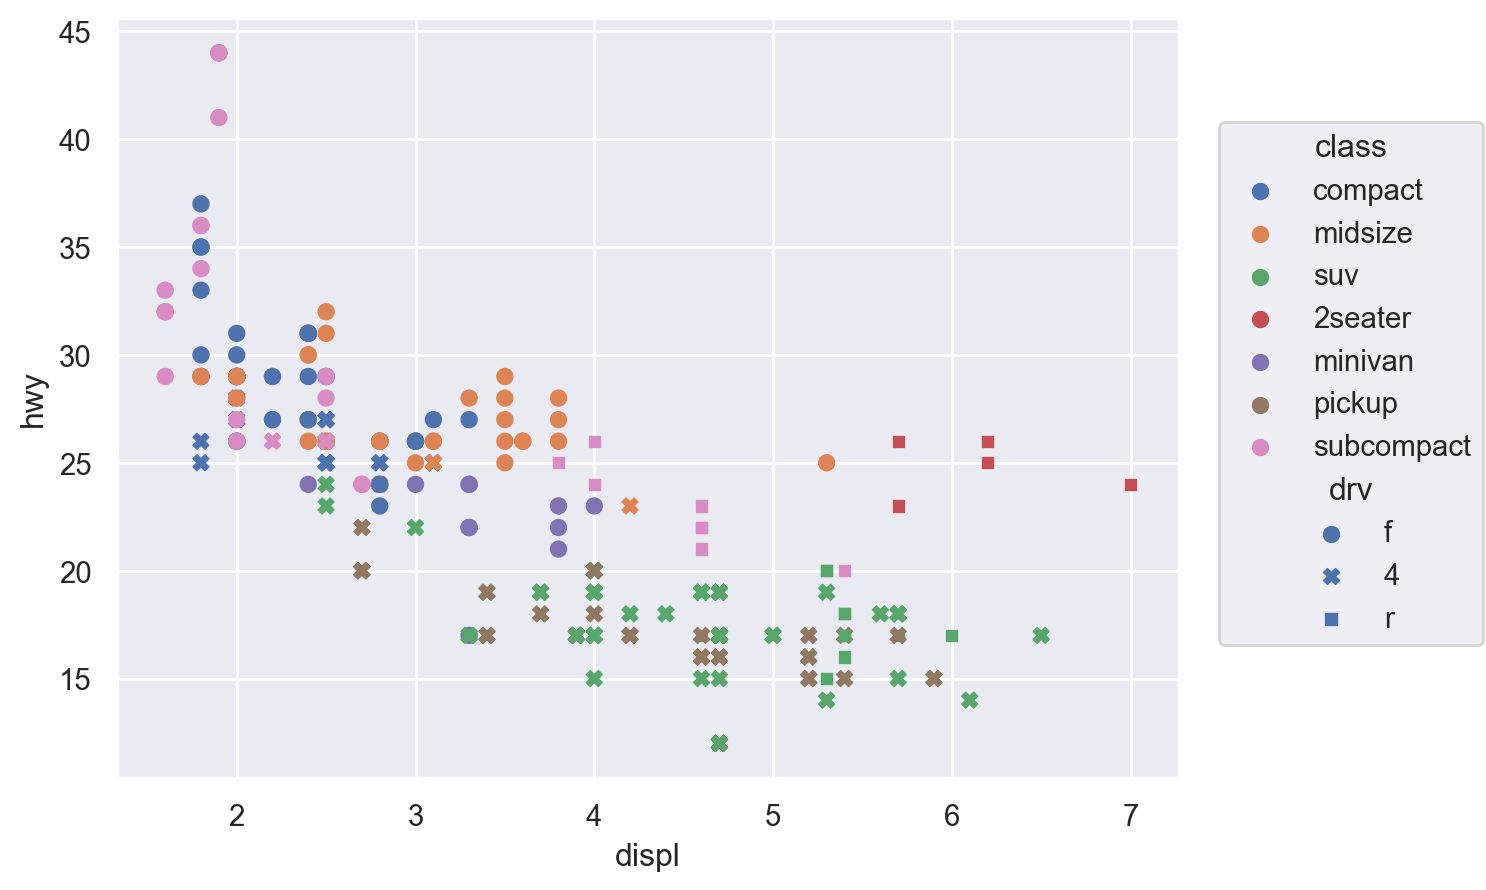

In [16]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class", marker="drv")
    .add(so.Dot())
)

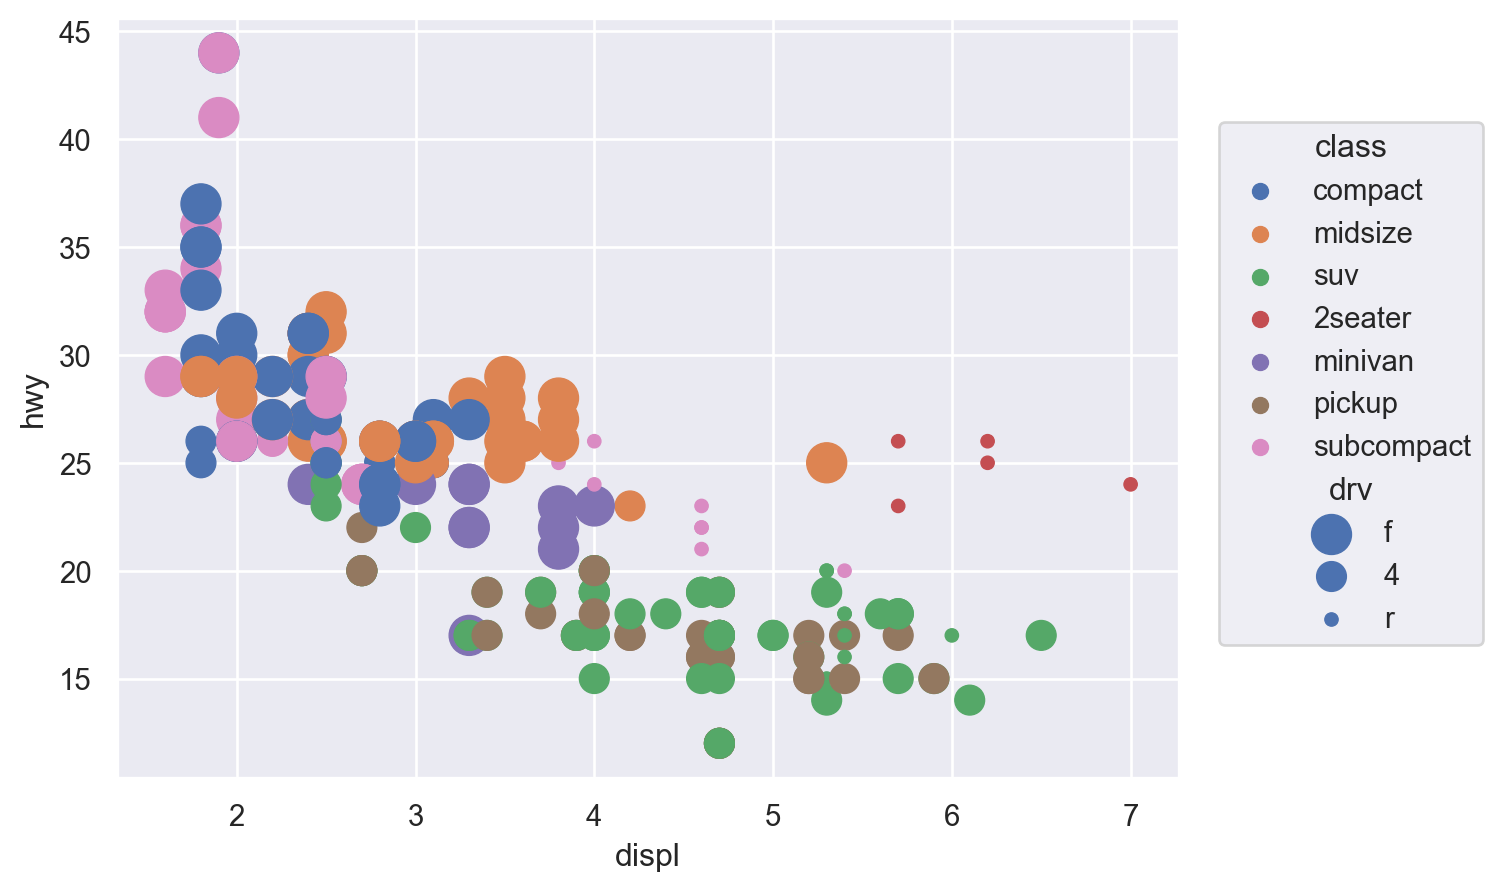

In [17]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class", pointsize="drv")
    .add(so.Dot())
    .scale(pointsize=(5, 15)) # pointsize의 range설정
)

::: {.callout-note}
아래 그림에서처럼 연속 vs. 카테고리 변수 여부에 따라 다르게 작동
:::

In [9]:
#| echo: false
left = so.Plot(mpg, x="displ", y="hwy", color="class").add(so.Dot()).layout(engine="constrained")

right = so.Plot(mpg, x="displ", y="hwy", color="cty").add(so.Dot()).layout(engine="constrained")

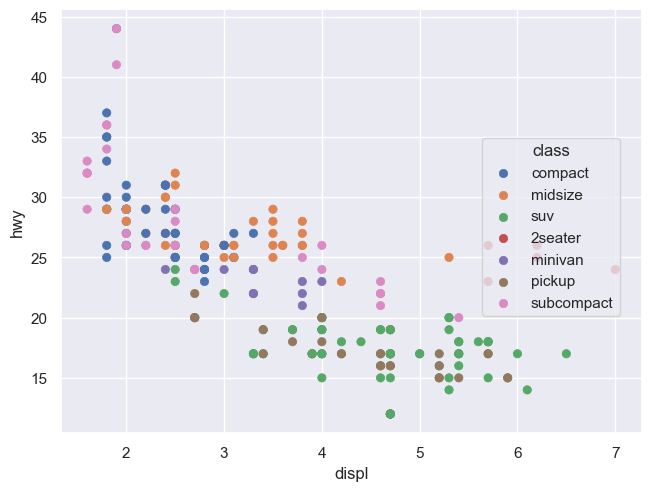

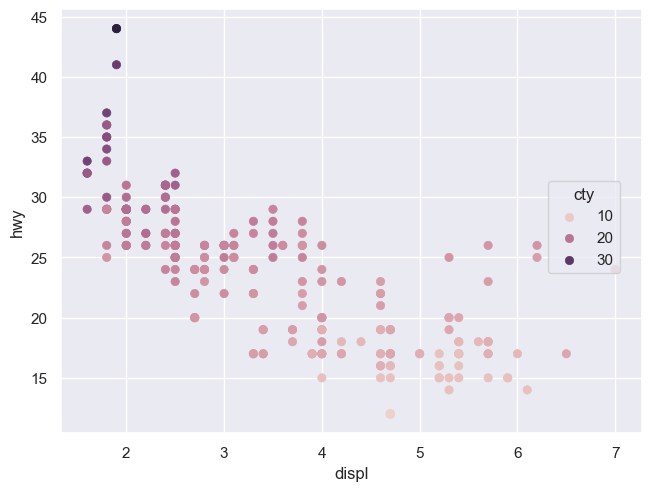

In [21]:
#| label: fig-charts
#| fig-cap: Categorical vs. Continuous
#| fig-subcap: 
#|   - "type of car"
#|   - "city miles per gallon"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

::: {.callout-important}

*어떤 속성을 어떤 변수에 할당하는 것이 적절한지를 선택하는 것이 기술*  
예를 들어, 아래 두 플랏은 동일한 정보를 품고 있으나, 시각적 인식에 큰 차이를 만듦

:::

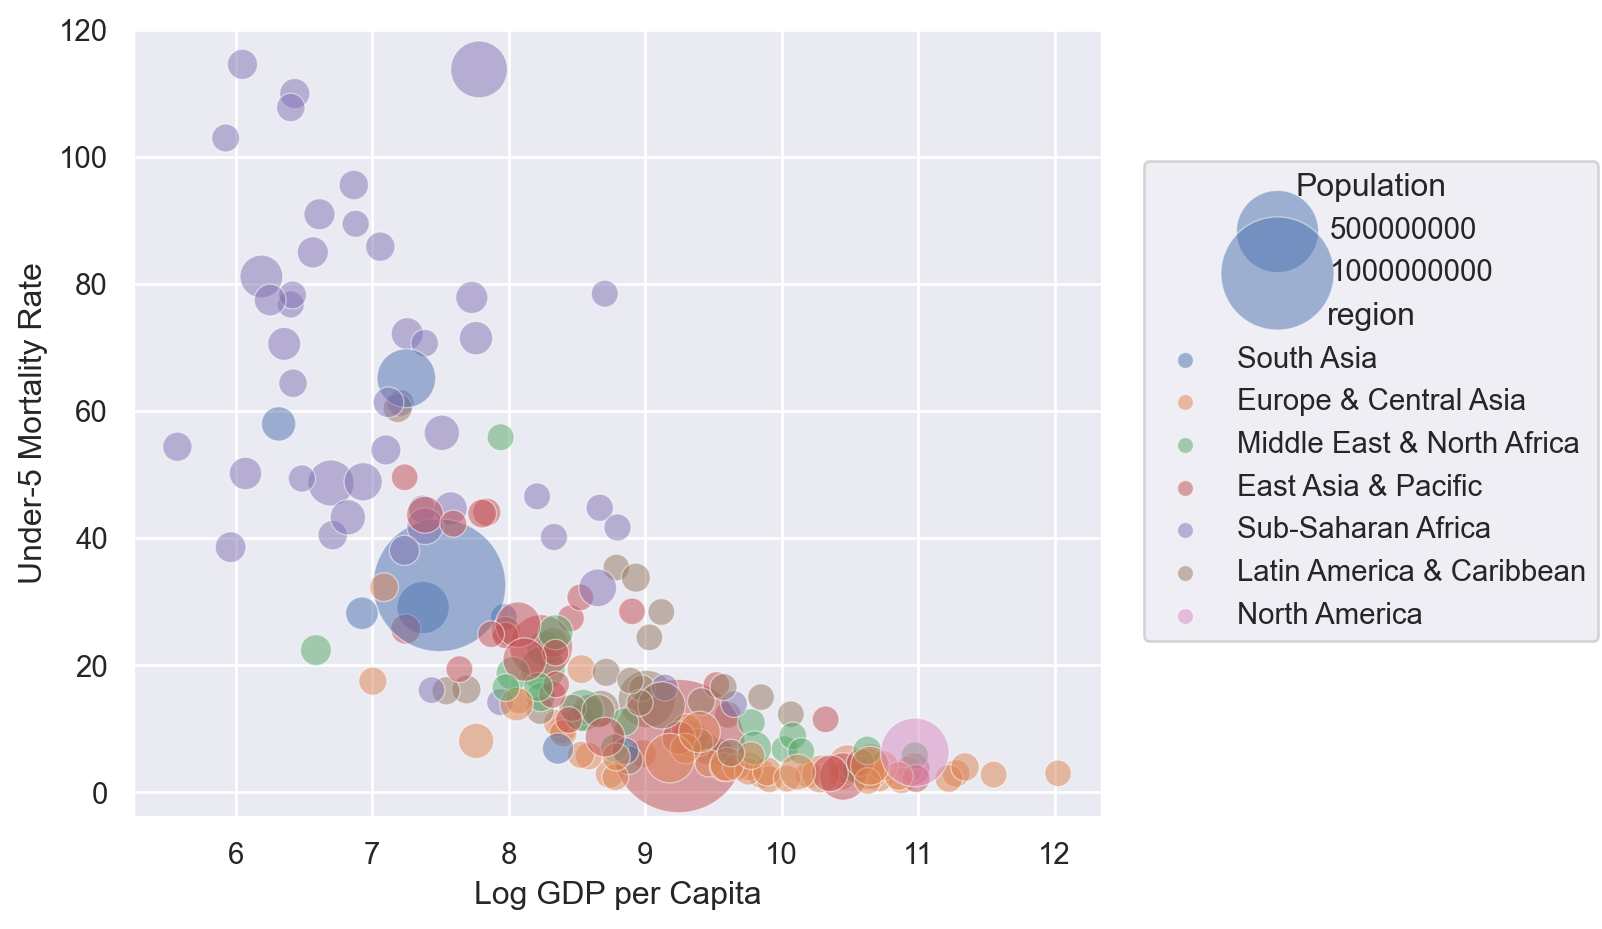

In [11]:
#| echo: false

wdi_2020 = pd.read_csv("data/wdi_2020.csv")
wdi_2020 = wdi_2020.assign(
    log_pop = lambda x: np.log(x["pop"])
)
wdi_2020.head()

(
    so.Plot(wdi_2020, x="log_gdp", y="child_mortality")
    .add(so.Dot(edgecolor="white", alpha=.5), pointsize="pop", color="region")
    .scale(pointsize=(10, 50))
    .label(x="Log GDP per Capita", y="Under-5 Mortality Rate", pointsize="Population")
    .layout(size=(6, 5))
)

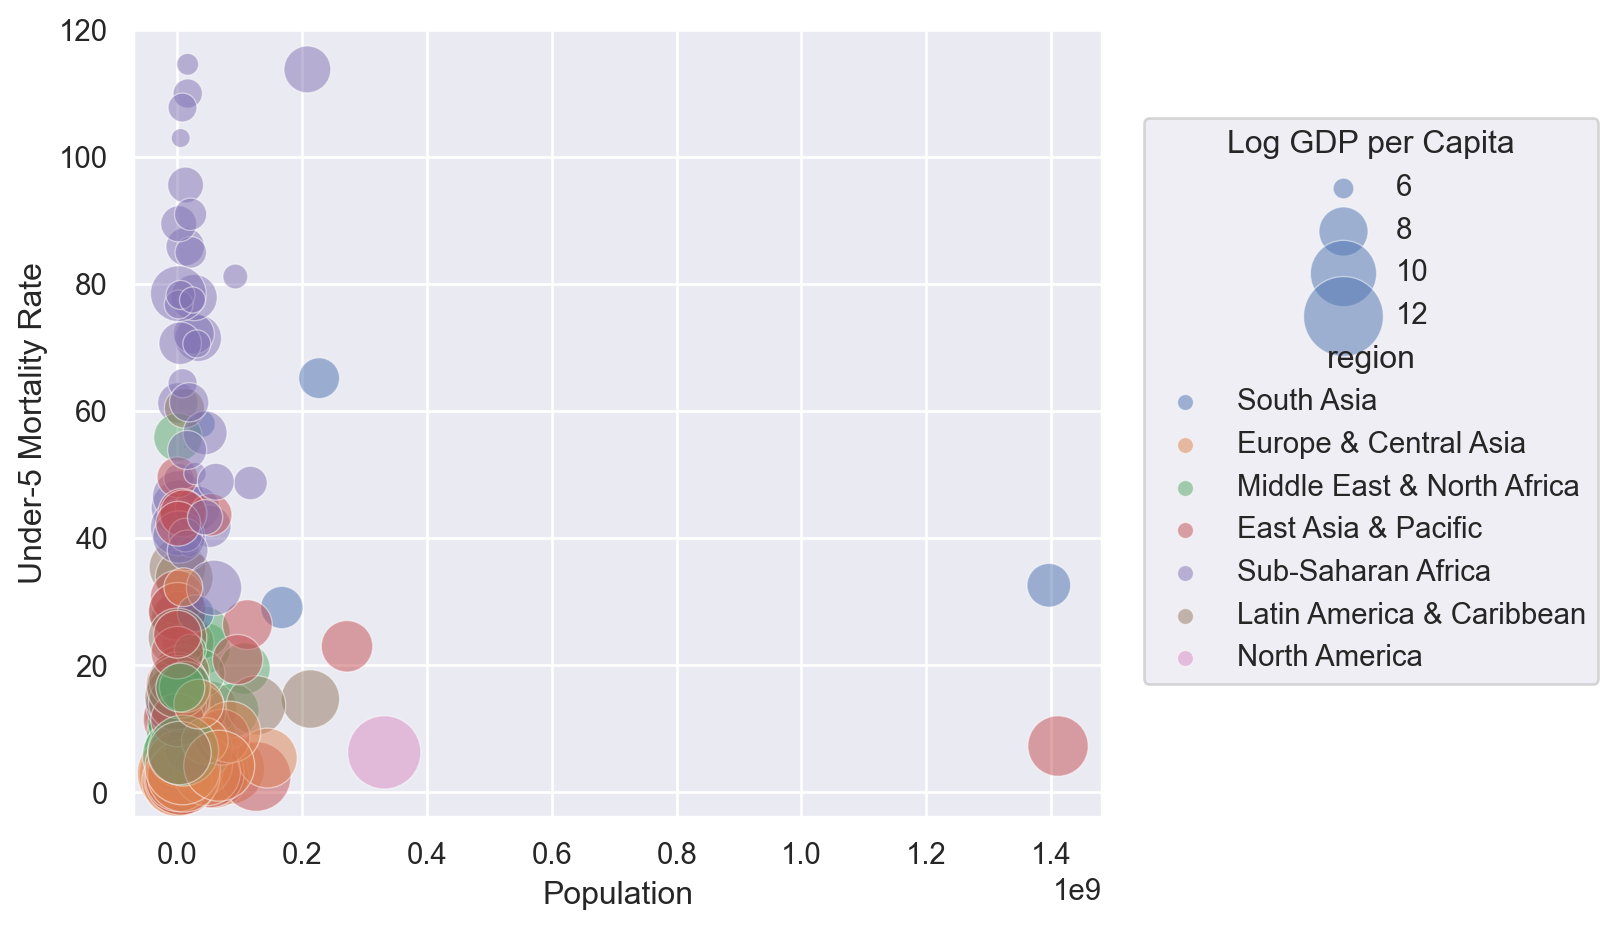

In [12]:
#| echo: false

(
    so.Plot(wdi_2020, x="pop", y="child_mortality")
    .add(so.Dot(edgecolor="white", alpha=.5), pointsize="log_gdp", color="region")
    .scale(pointsize=(1, 30))
    .label(x="Population", y="Under-5 Mortality Rate", pointsize="Log GDP per Capita")
    .layout(size=(6, 5))
)

## Setting properties

Setting properties vs. mapping properties (aesthetic)

![](images/mapping.png){width=300}

**변수**에 속성을 할당하는 것이 아니라, graphical objects (Marks)의 속성을 지정

Marks (.Dot, .Line, .Bar, ...) 마다 설정할 수 있는 속성이 다름

주로 쓰이는 속성들: `color`, `pointsize`, `alpha`


> `.Dot()`의 경우  
> *class seaborn.objects.Dot(artist_kws=<factory>, marker=<'o'>, pointsize=<6>, stroke=<0.75>, color=<'C0'>, alpha=<1>, fill=<True>, edgecolor=<depend:color>, edgealpha=<depend:alpha>, edgewidth=<0.5>, edgestyle=<'-'>)*
>
> `.Dots()`의 경우  
> *class seaborn.objects.Dots(artist_kws=<factory>, marker=<rc:scatter.marker>, pointsize=<4>, stroke=<0.75>, color=<'C0'>, alpha=<1>, fill=<True>, fillcolor=<depend:color>, fillalpha=<0.2>)*
>
> [API reference 참고](https://seaborn.pydata.org/api.html)

::: {.callout-tip}
다양한 Mark properties에 대해서는 홈페이지 참고  
[Properties of Mark objects](https://seaborn.pydata.org/tutorial/properties.html)
:::

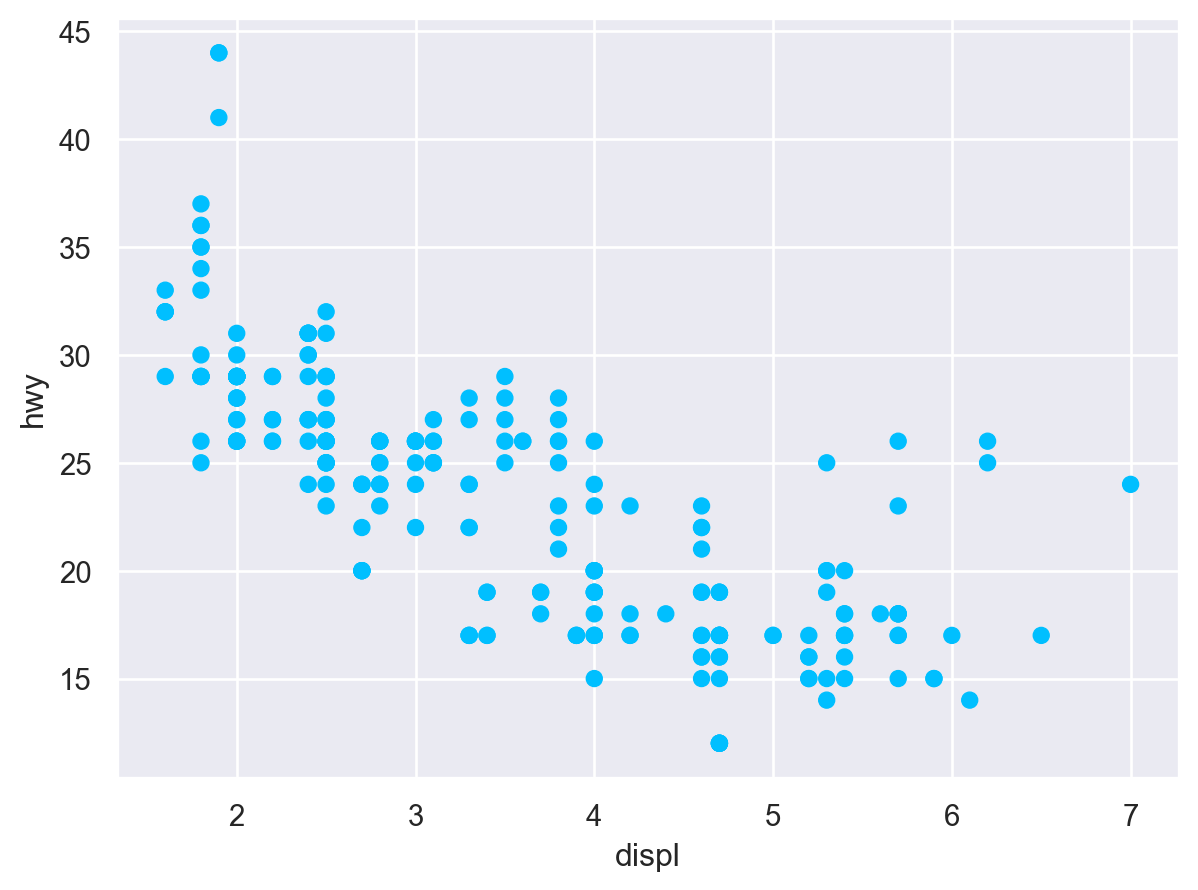

In [23]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="deepskyblue")) # Mark object 안에 지정!
)

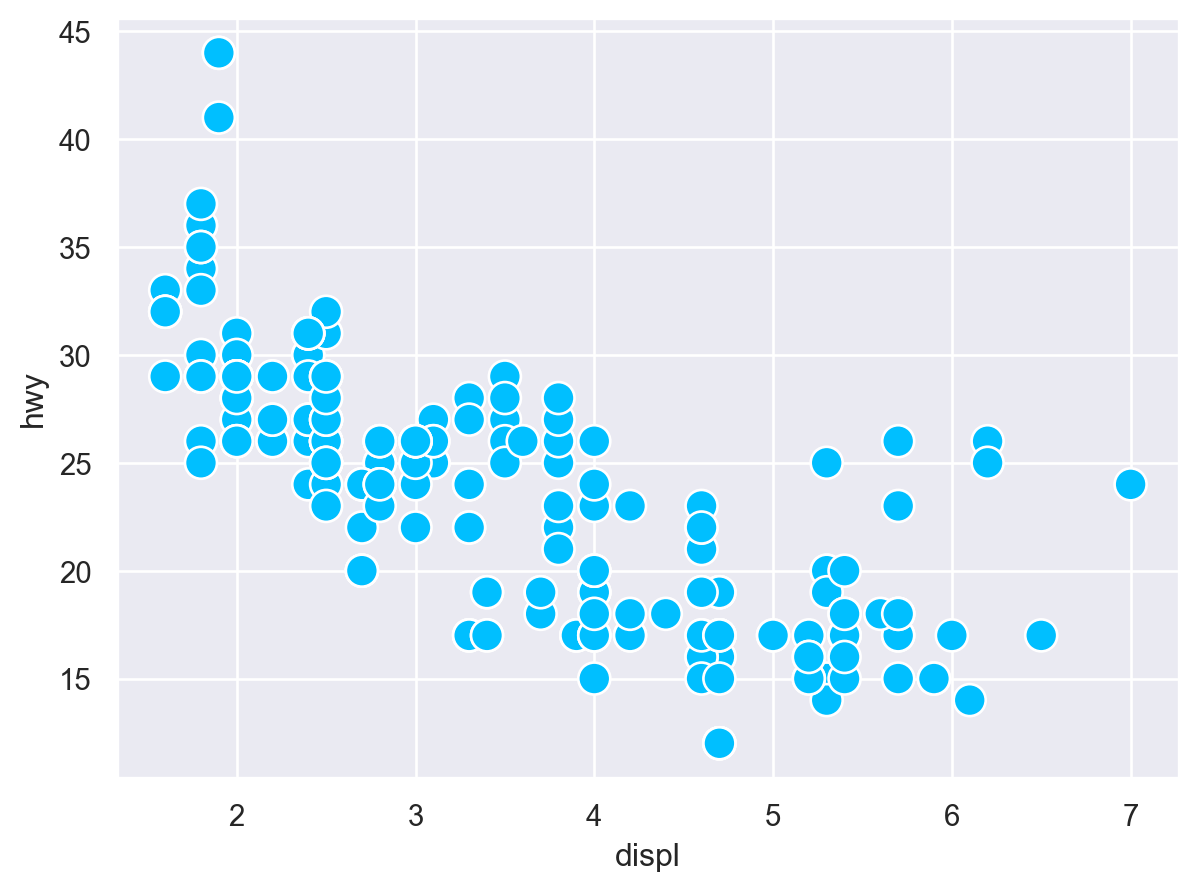

In [24]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="deepskyblue", pointsize=12, edgecolor="white", edgewidth=1)) # Mark object 안에 지정!
)

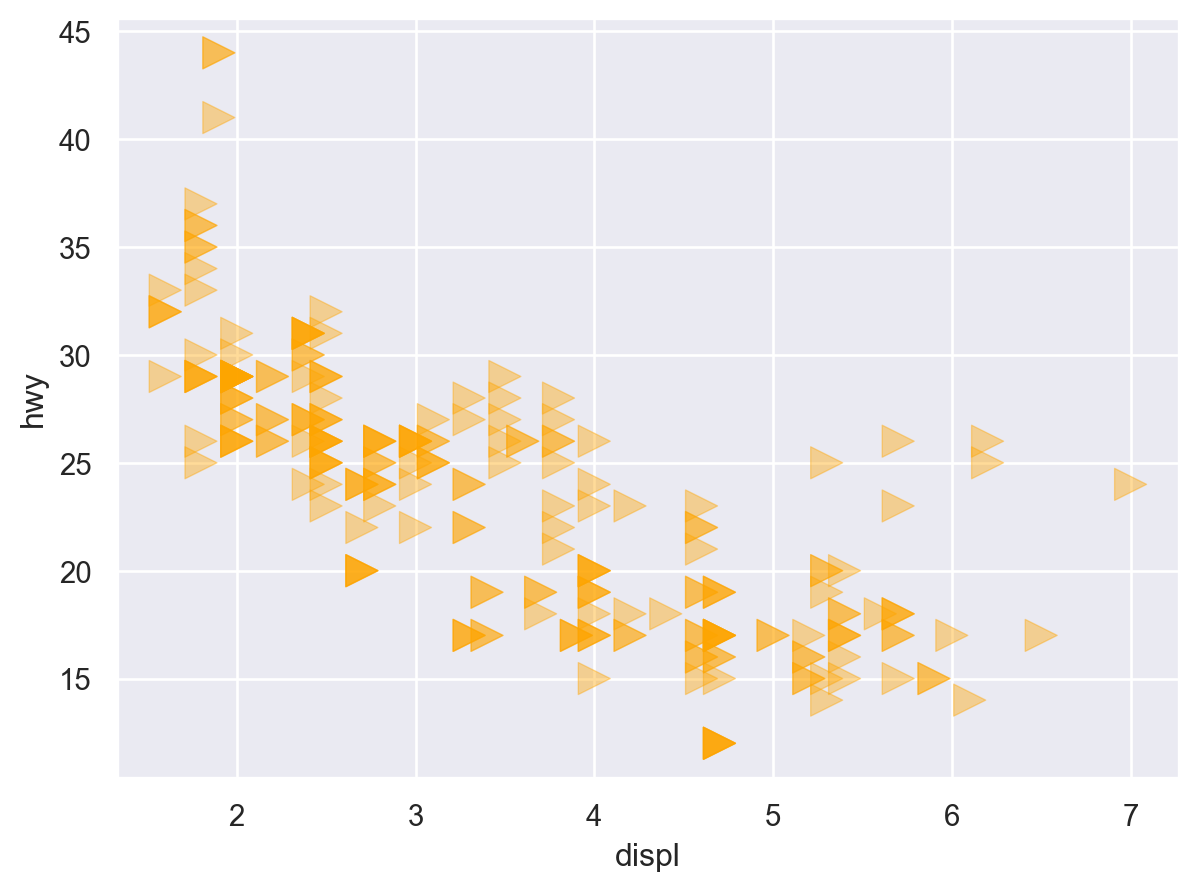

In [25]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="orange", pointsize=12, marker=">", alpha=.4)) # Mark object 안에 지정!
)

## Faceting

카테고리 변수들이 지니는 카테고리들(레벨)로 나누어 그리기

Data: palmerpenguins

::: {layout-ncol=2}
![](images/lter_penguins.png)
Artwork by @allison_horst

![](images/culmen_depth.png)
:::

In [5]:
penguins = sns.load_dataset("penguins") # load a dataset: penguins
penguins.head()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen           39.10          18.70             181.00   
1  Adelie  Torgersen           39.50          17.40             186.00   
2  Adelie  Torgersen           40.30          18.00             195.00   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen           36.70          19.30             193.00   

   body_mass_g     sex  
0      3750.00    Male  
1      3800.00  Female  
2      3250.00  Female  
3          NaN     NaN  
4      3450.00  Female  

In [215]:
#| echo: false
#| output: false
penguins.pivot(columns="species", values=penguins.columns[2:4])

        bill_length_mm                  bill_depth_mm                 
species         Adelie Chinstrap Gentoo        Adelie Chinstrap Gentoo
0                39.10       NaN    NaN         18.70       NaN    NaN
1                39.50       NaN    NaN         17.40       NaN    NaN
2                40.30       NaN    NaN         18.00       NaN    NaN
..                 ...       ...    ...           ...       ...    ...
341                NaN       NaN  50.40           NaN       NaN  15.70
342                NaN       NaN  45.20           NaN       NaN  14.80
343                NaN       NaN  49.90           NaN       NaN  16.10

[344 rows x 6 columns]

In [216]:
#| echo: false
#| output: false
penguins.set_index("species", append=True).unstack()

            island                   bill_length_mm                   \
species     Adelie Chinstrap  Gentoo         Adelie Chinstrap Gentoo   
0        Torgersen       NaN     NaN          39.10       NaN    NaN   
1        Torgersen       NaN     NaN          39.50       NaN    NaN   
2        Torgersen       NaN     NaN          40.30       NaN    NaN   
..             ...       ...     ...            ...       ...    ...   
341            NaN       NaN  Biscoe            NaN       NaN  50.40   
342            NaN       NaN  Biscoe            NaN       NaN  45.20   
343            NaN       NaN  Biscoe            NaN       NaN  49.90   

        bill_depth_mm                  flipper_length_mm                   \
species        Adelie Chinstrap Gentoo            Adelie Chinstrap Gentoo   
0               18.70       NaN    NaN            181.00       NaN    NaN   
1               17.40       NaN    NaN            186.00       NaN    NaN   
2               18.00       NaN    NaN     

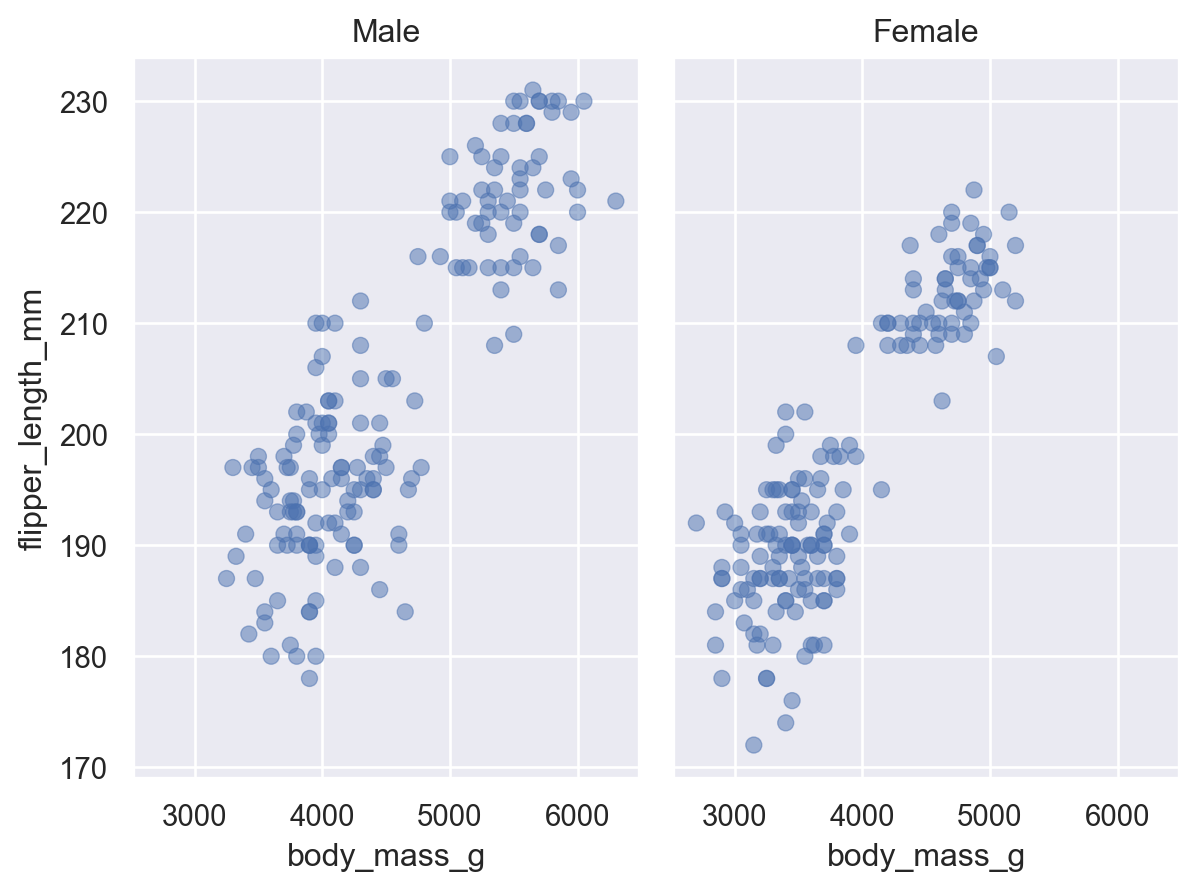

In [27]:
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dot(alpha=.5))
    .facet("sex") # 기본적으로 columns으로 나누어져 그림, wrap: column에 몇 개까지 그릴지
)

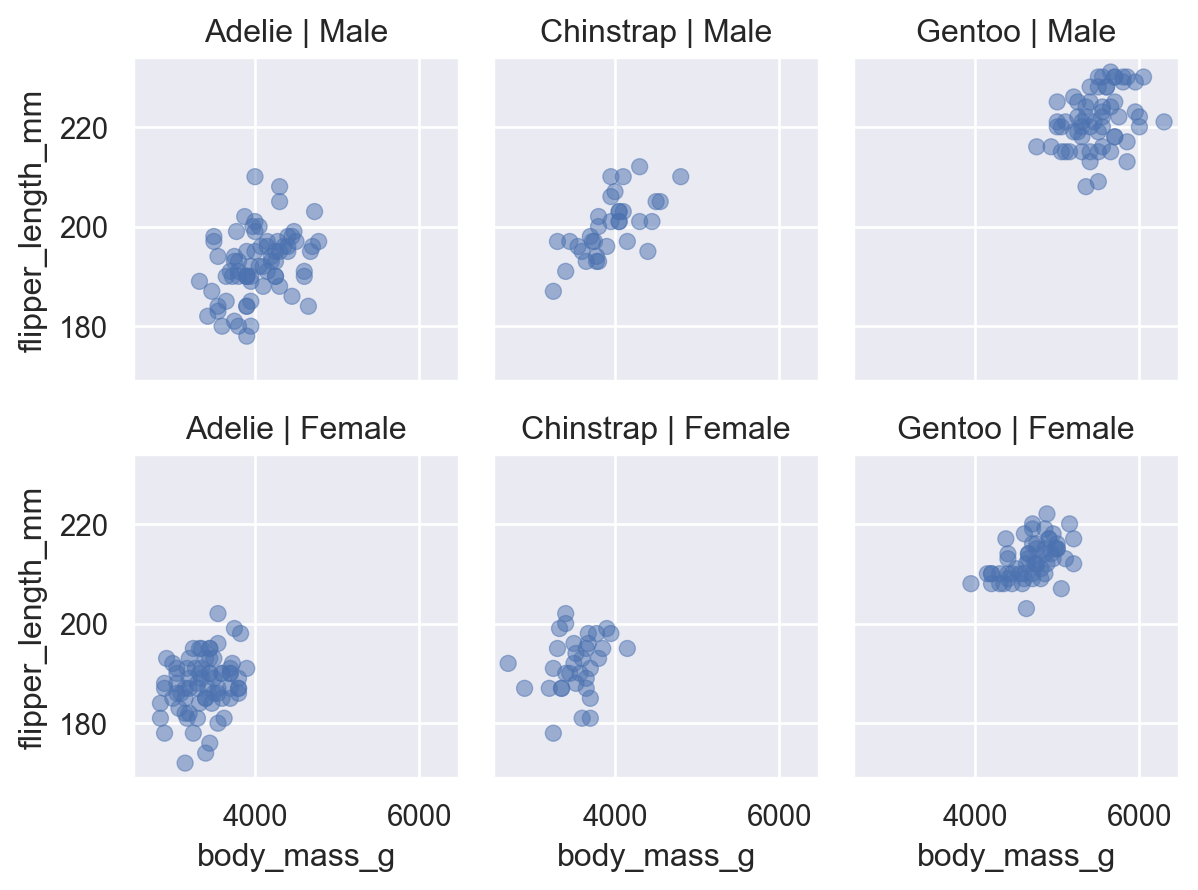

In [11]:
p = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Dot(alpha=.5))
)
p

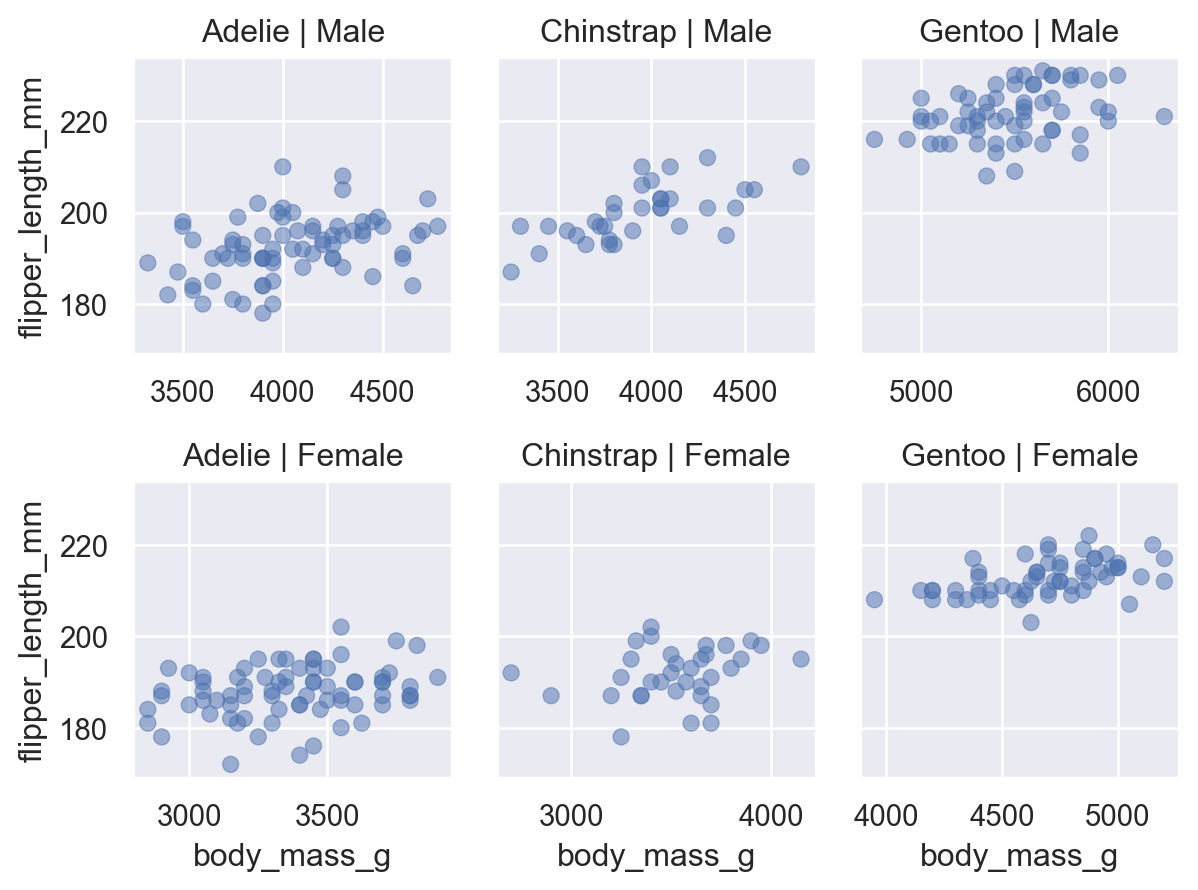

In [12]:
# x, y축의 눈금을 일치할지 여부
p.share(x=False, y=True)

::: {.callout-important}
Facet과 Color 중 어떤 방식으로 표현하는 것이 유리한가? 밸런스를 잘 선택!
:::

In [6]:
left = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species")
    .add(so.Dot(alpha=.5))
)
right = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm", color="species")
    .add(so.Dot(alpha=.5))
)

bottom = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(row="species")
    .add(so.Dot(alpha=.5))
)

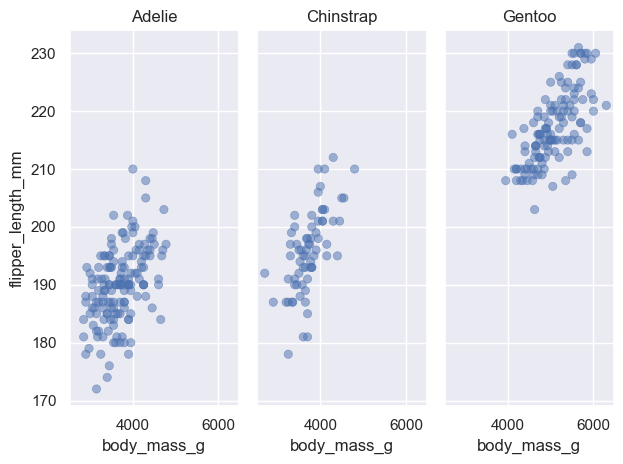

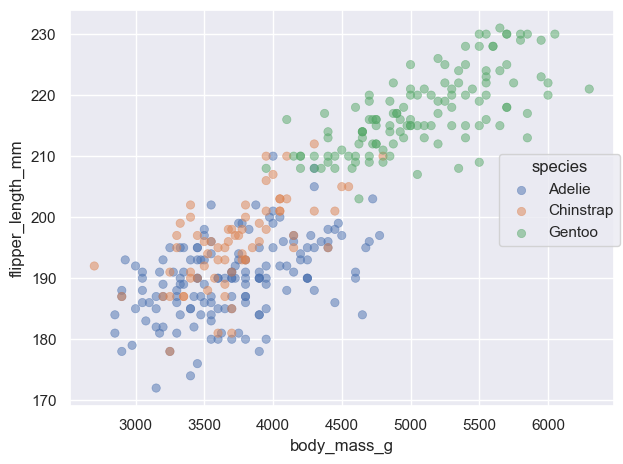

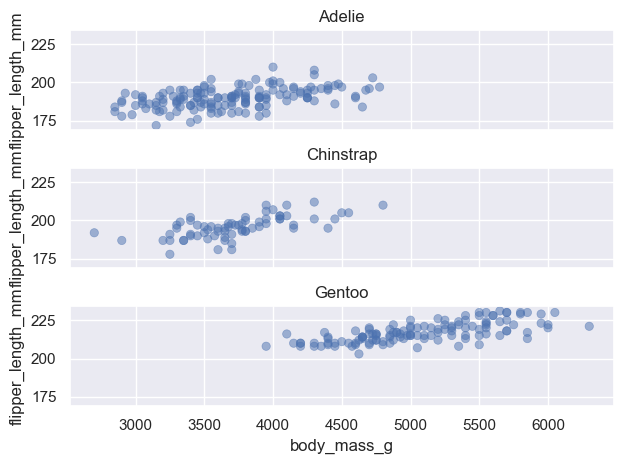

In [9]:
#| label: fig-charts2
#| fig-cap: faceting vs. color mapping
#| fig-subcap: 
#|   - "faceting horizonally"
#|   - "color mapping"
#|   - "faceting vertically"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()
bottom.show()

### Pairing

Faceting이 변수 내에 **다른 레벨**에 따라 그려지는데 반해,  
paring은 x, y축에 **다른 변수**를 지정하여 그림

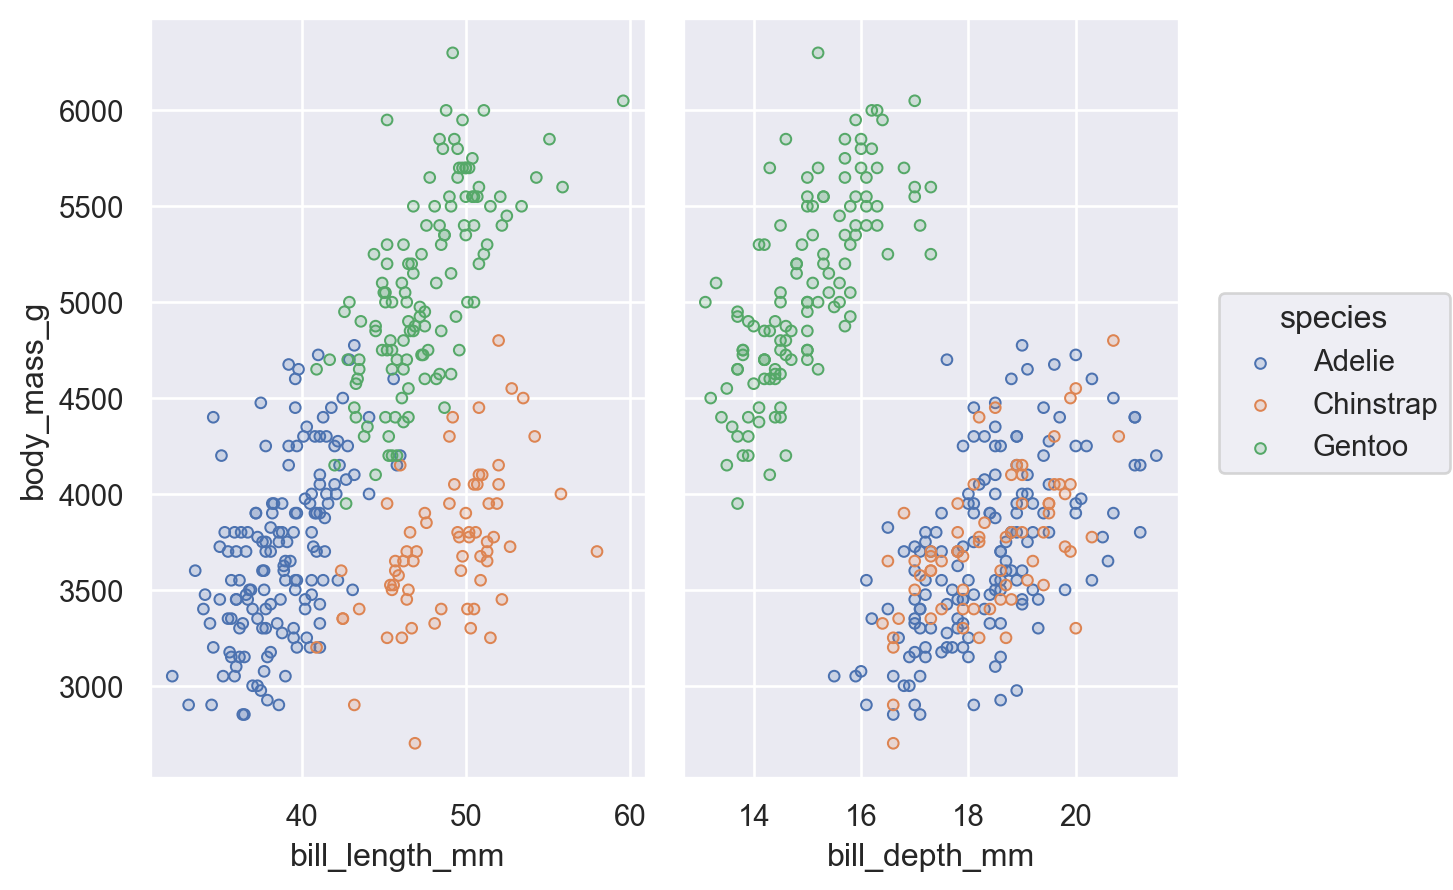

In [31]:
(
    so.Plot(penguins, y="body_mass_g", color="species") # y축은 공유
    .pair(x=["bill_length_mm", "bill_depth_mm"]) # x축에 다른 변수를 mapping
    .add(so.Dots()) # .Dots()! overploting에 유리. .Dot(alpha=.)로도 비슷
)

Facet & pair 동시

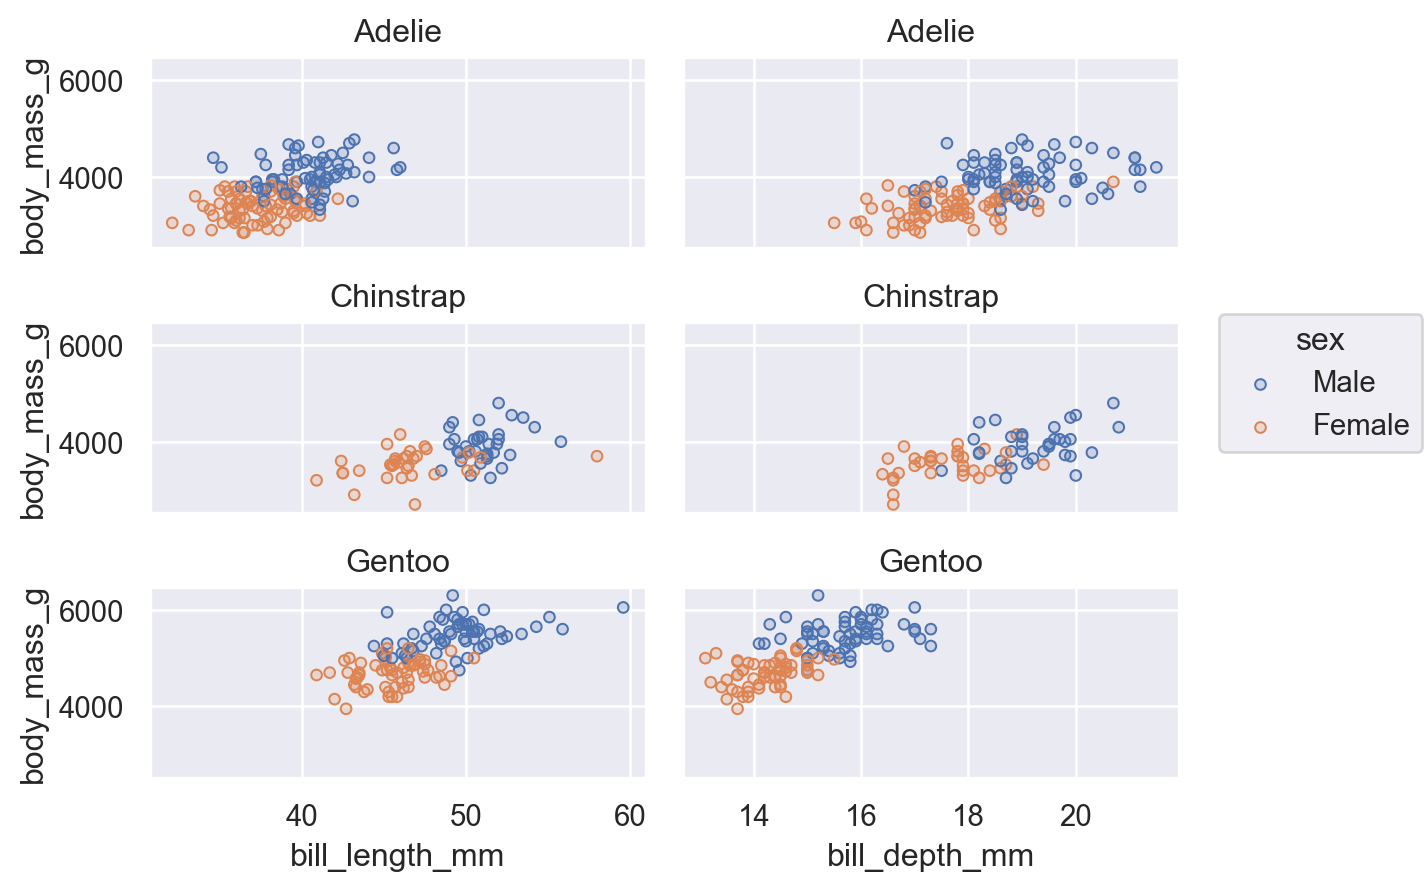

In [32]:
(
    so.Plot(penguins, y="body_mass_g", color="sex")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="species")
    .add(so.Dots())
)

### Multiple plots  
개발 중...? Matplotlib을 이용

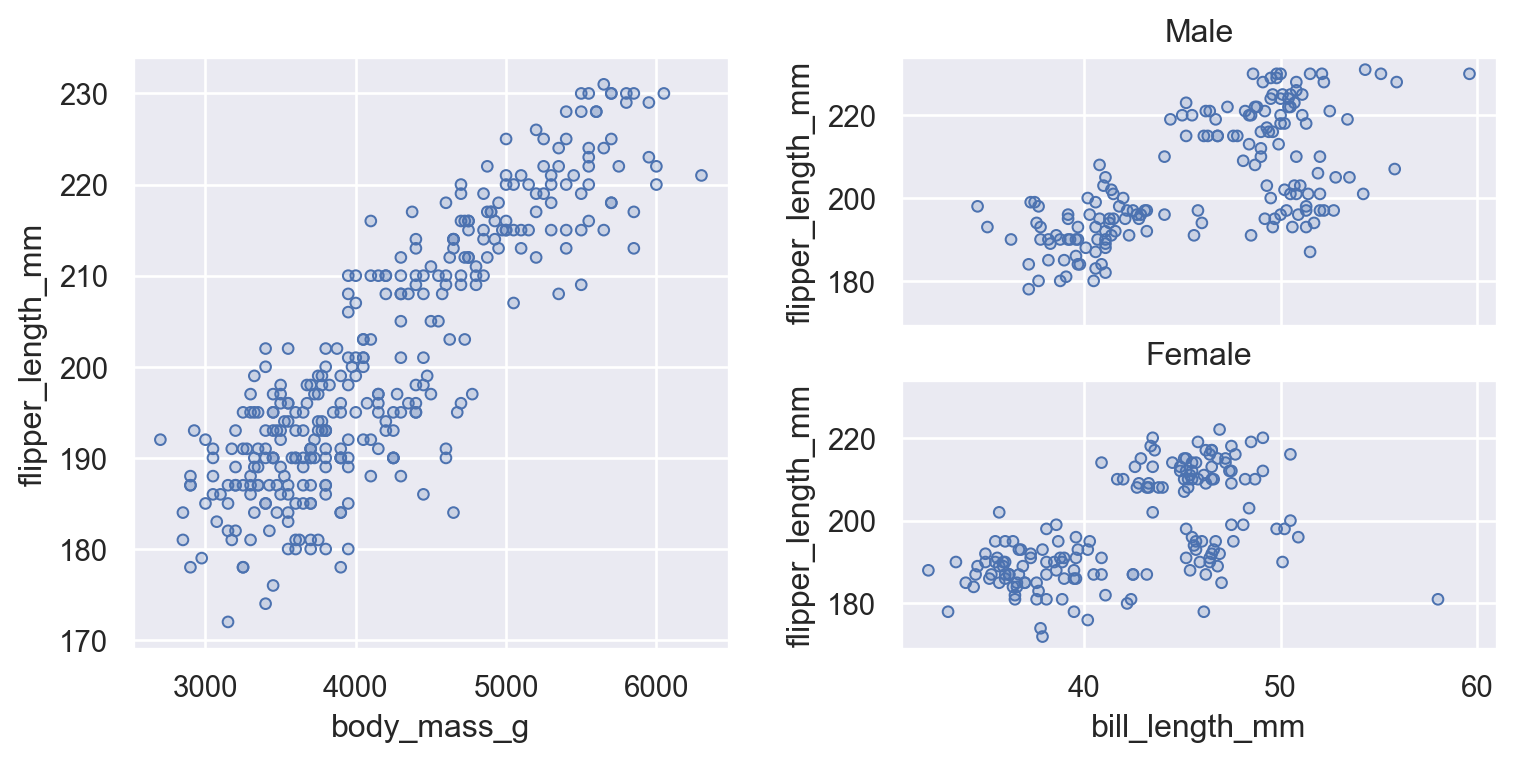

In [33]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="bill_length_mm", y="flipper_length_mm")
    .facet(row="sex")
    .add(so.Dots())
    .on(sf2)
    .plot()
)

Save plots

`p.save("data/filename.png")` *# p: a plot oject*

## Geometric objects 

- Dot marks: `Dot`, `Dots`
- Line marks: `Line`, `Lines`, `Path`, `Paths`, `Dash`, `Range`
- Bar marks: `Bar`, `Bars`
- Fill marks: `Area`, `Band`
- Text marks: `Text`

## Statistical transformations

`Agg`, `Est`, `Count`, `Hist`, `KDE`, `Perc`, `PolyFit`

::: {.callout-important}
위의 stats transform들을 이용하여 변형된 데이터 값을 geometric objects에 mapping하여 다양한 플랏을 그릴 수 있음  
원칙적으로는 직접 stats을 계산한 후에 그 데이터로 플랏을 그릴 수 있으나, 신속한 탐색적 분석을 위해 사용
:::


::: {.callout-note}
현재 seaborn.objects에서 다음 두 가지 중요한 statistical transformations이 제공되지 않고 있음

- (non-parametirc) fitted line을 보여주는 loess or GAM line 
- 분포의 간략한 summary인 boxplot

이 부분에 대해서는 아래 몇 가지 대안이 있음: 그외에는 alternative plots 섹션 참고

:::

::: {.callout-note}
Data에 fitted curve를 구하는 방식에는 여러 방법이 있음

- Linear fit: 1차 함수형태로 fit
- Smoothing fit
  - Polynominal fit: n차 다항함수형태로 fit
  - Loess/lowess: locally estimated/weighted scatterplot smoothing
  - GAM: generalized additive model
  - Spline: piece-wise polynominal regression

나중에 좀 더 자세히 알아봄

현재 seaborn.objects에서는 polynomial fit만 제공
:::

### Fitted lines

seaborn.objects

In [34]:
left = (
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(5)) # PolyFit(n): n차 다항식으로 fit
)

right = (
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Line(), so.PolyFit(5)) # PolyFit(n): n차 다항식으로 fit
)

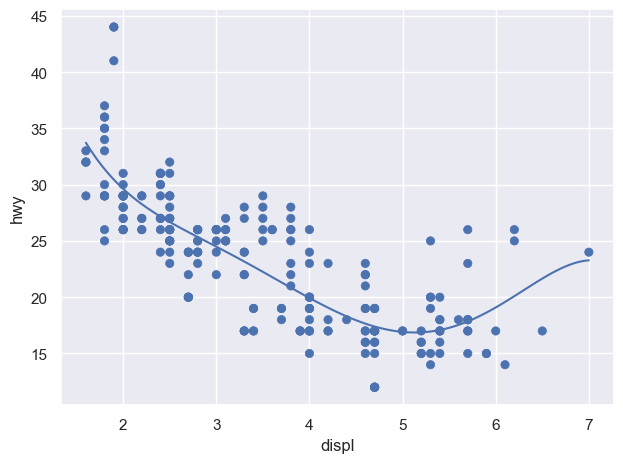

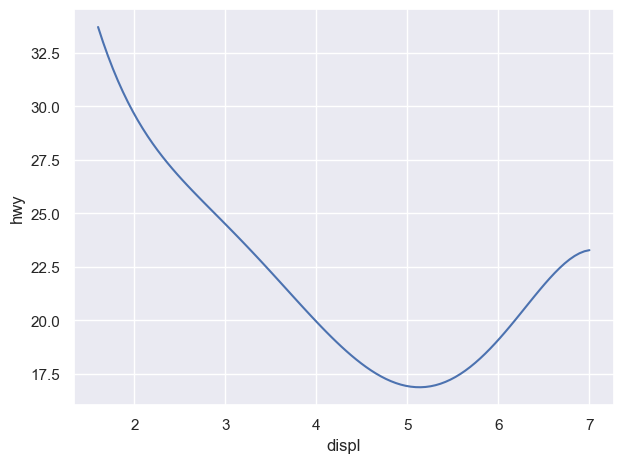

In [35]:
#| label: fig-charts3
#| fig-cap: 데이터로부터 계산을 한 후 플랏이 그려짐
#| fig-subcap: 
#|   - "Scatterplot + trendline"
#|   - "Trendline only"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

In [36]:
left = (
    so.Plot(mpg, x="displ", y="hwy", color="drv") # color mapping이 이후 모든 layer에 적용
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(5))
)

right = (
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(), color="drv") # color mapping이 이 layer에만 적용
    .add(so.Line(), so.PolyFit(5))
)

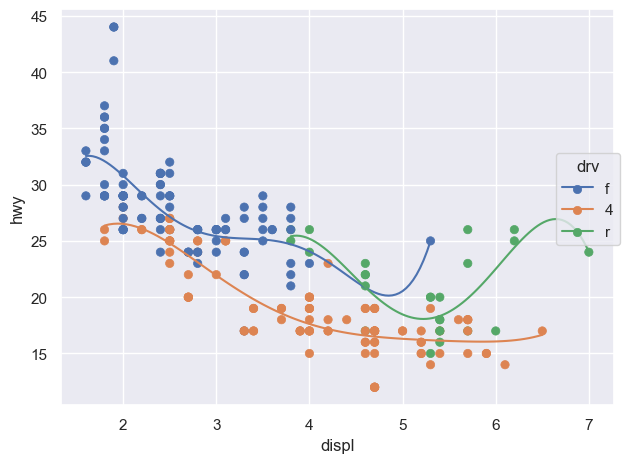

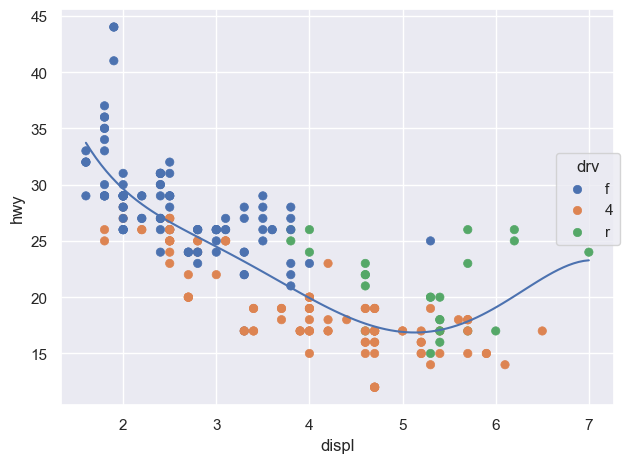

In [37]:
#| label: fig-charts4
#| fig-cap: Inherited mapping
#| fig-subcap: 
#|   - "color가 모든 layers에 적용: global mapping"
#|   - "color가 두번째 layer에만 적용: local mapping"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

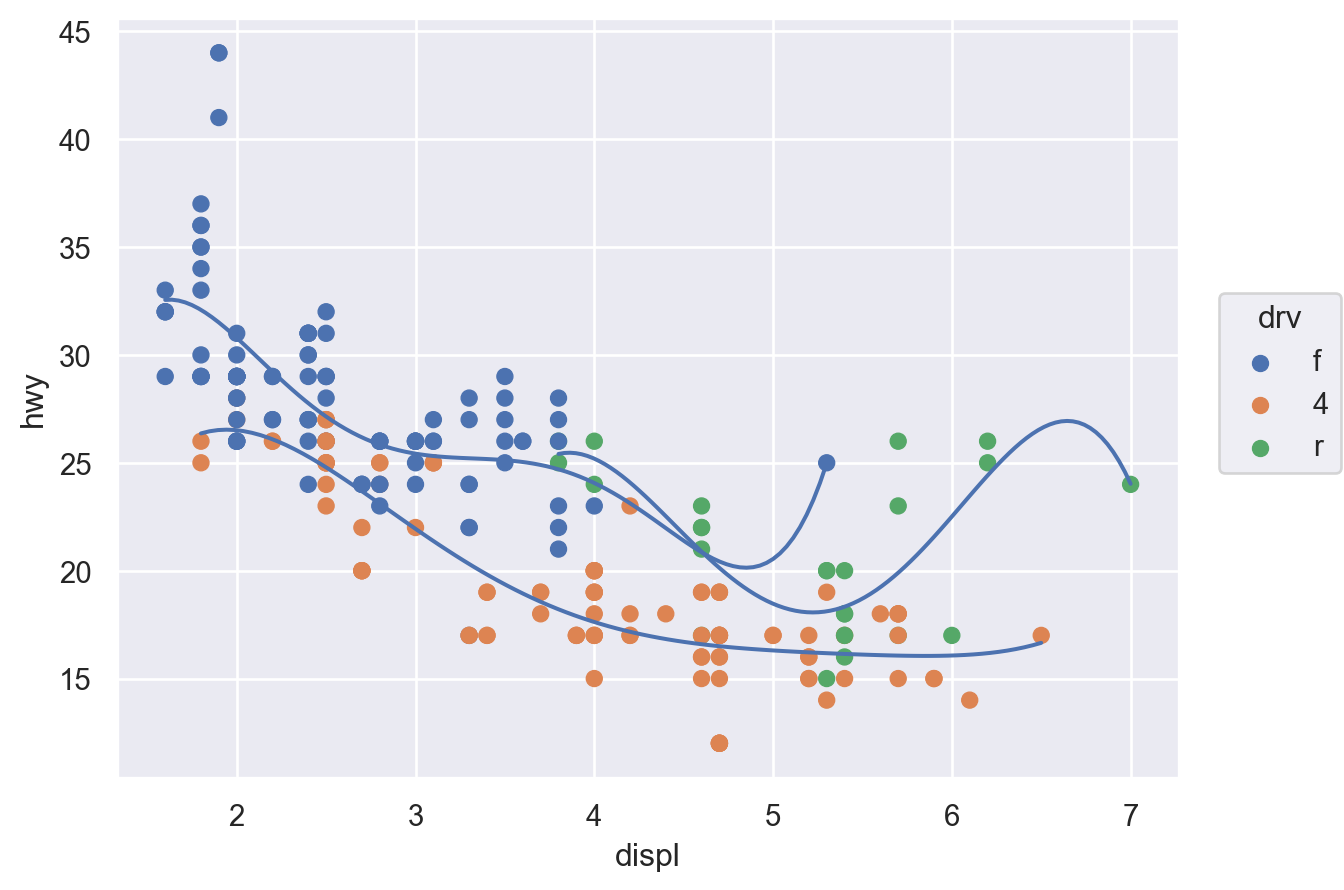

In [38]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(), color="drv")
    .add(so.Line(), so.PolyFit(5), group="drv") # color가 아닌 group으로 grouping
)
# 다항함수 fit의 특징 및 주의점

Linear fit vs. smoothing fit:  
선형적인 트렌드에서 얼마나 벗어나는가?

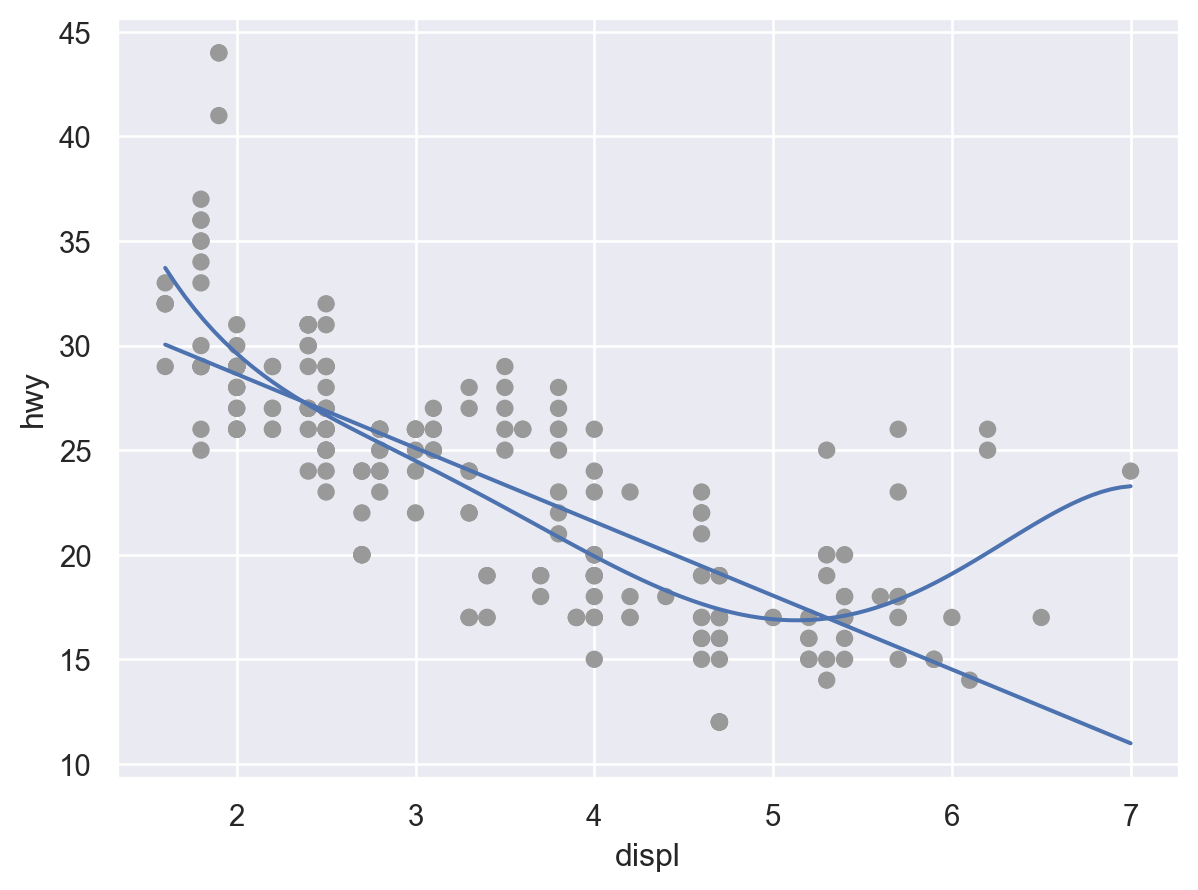

In [68]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color=".6"))
    .add(so.Line(), so.PolyFit(5))
    .add(so.Line(), so.PolyFit(1))
)

다른 대안으로는 `plotly`, `seaborn`; alternative plots 섹션 참고

---

## Seaborn.objects 요약

```python
(
    so.Plot(df, x=, y=, color=, ...)  # global mapping
    .add(so.Dot(color=, pointsize=,...))  # mark object + setting properties
    .add(so.Line(), x=, y=, color=, ...)  # local mapping
    .add(so.Line(), so.Polyfit(5))  # 통계적으로 변환한 값을 Line plot으로 표현
    .add(so.Bar(), so.Hist(stat="proportion"))  # 통계적으로 변환한 값을 Bar plot로 표현
    ...
    .facet(col=, row=, wrap=) # 카테고리의 levels에 따라 나누어 표현
)
```

1. **Aesthetic mapping**  
   
   - 위치(position): `x`축, `y`축
   - 색(`color`), 크기(`pointsize`), 모양(`marker`), 선 종류(`linestyle`), 투명도(`alpha`)
   - global vs. local mapping 

2. **Geometric objects**
   
   - Dot marks: `Dot`, `Dots`
   - Line marks: `Line`, `Path`, `Dash`, `Range`
   - Bar marks: `Bar`, `Bars`
   - Fill marks: `Area`, `Band`
   - Text marks: `Text`

3. **Setting properties**
   
   - Marks (`.Dot()`, `.Line()`, `.Bar()`, …) 내부에 속성을 지정하고, marks마다 설정할 수 있는 속성이 다름.
   - 주로 쓰이는 속성들: `color`, `pointsize`, `alpha`

4. **Statistical transformations**
   
   - 변수들을 통계적 변환 후 그 값을 이용
   - `Agg`, `Est`, `Count`, `Hist`, `KDE`, `Perc`, `PolyFit`

5. **Faceting**: 카테고리 변수들의 levels에 따라 나누어 그림
   

# Applications
## Visualizing distributions
분포를 살펴보는데 변수가 연속인지 카테고리인지에 따라 다른 방식

### A categorical variable

In [14]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


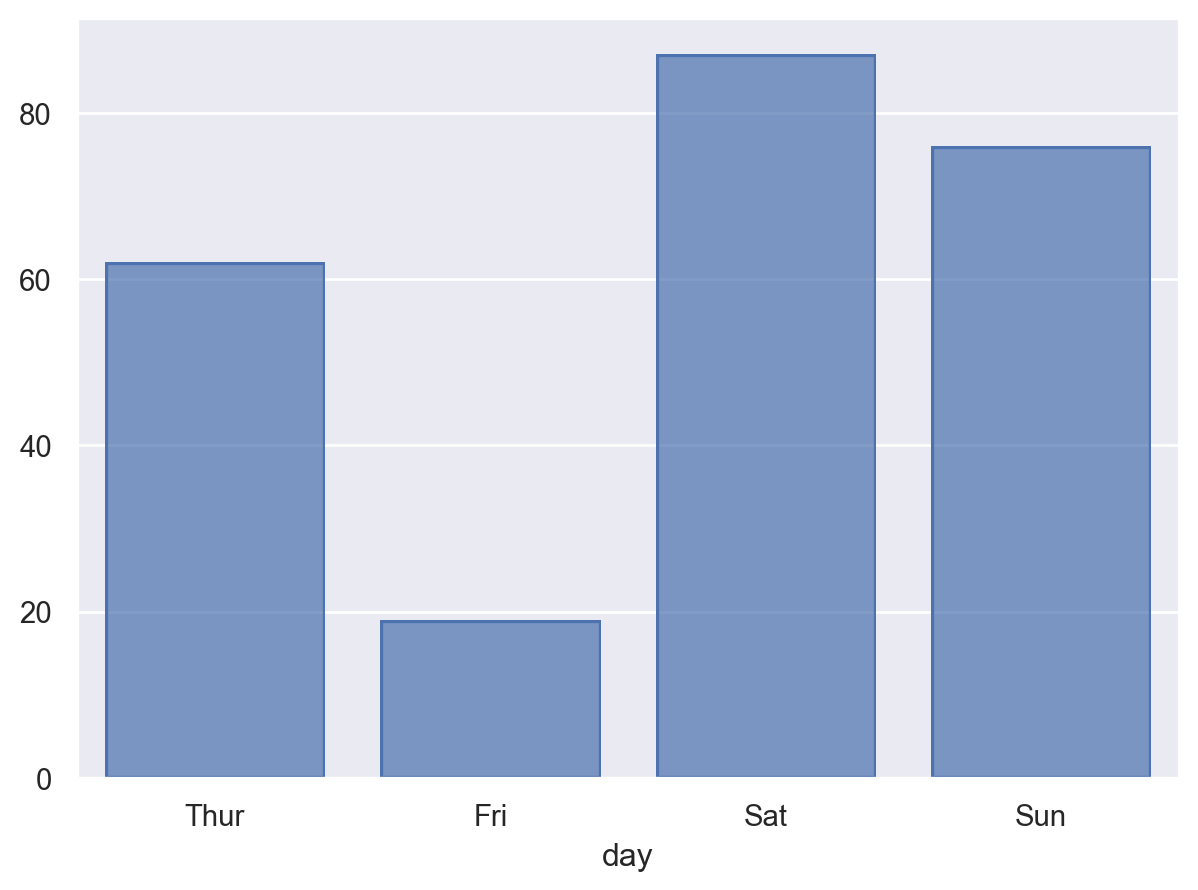

In [113]:
#| layout-ncol: 2
(
    so.Plot(tips, x="day")
    .add(so.Bar(), so.Count()) # category type의 변수는 순서가 존재. 그렇지 않은 경우 알바벳 순서로 
)

::: {.callout-note}
복잡한 통계치의 경우 직접 구한후 plot을 그리는 것이 용이

```python
count_day = tips[["day"]].value_counts(normalize=True).reset_index(name="pct")
#     day  pct
# 0   Sat 0.36
# 1   Sun 0.31
# 2  Thur 0.25
# 3   Fri 0.08
(
    so.Plot(count_day, x="day", y="pct")
    .add(so.Bar())
)
```
:::

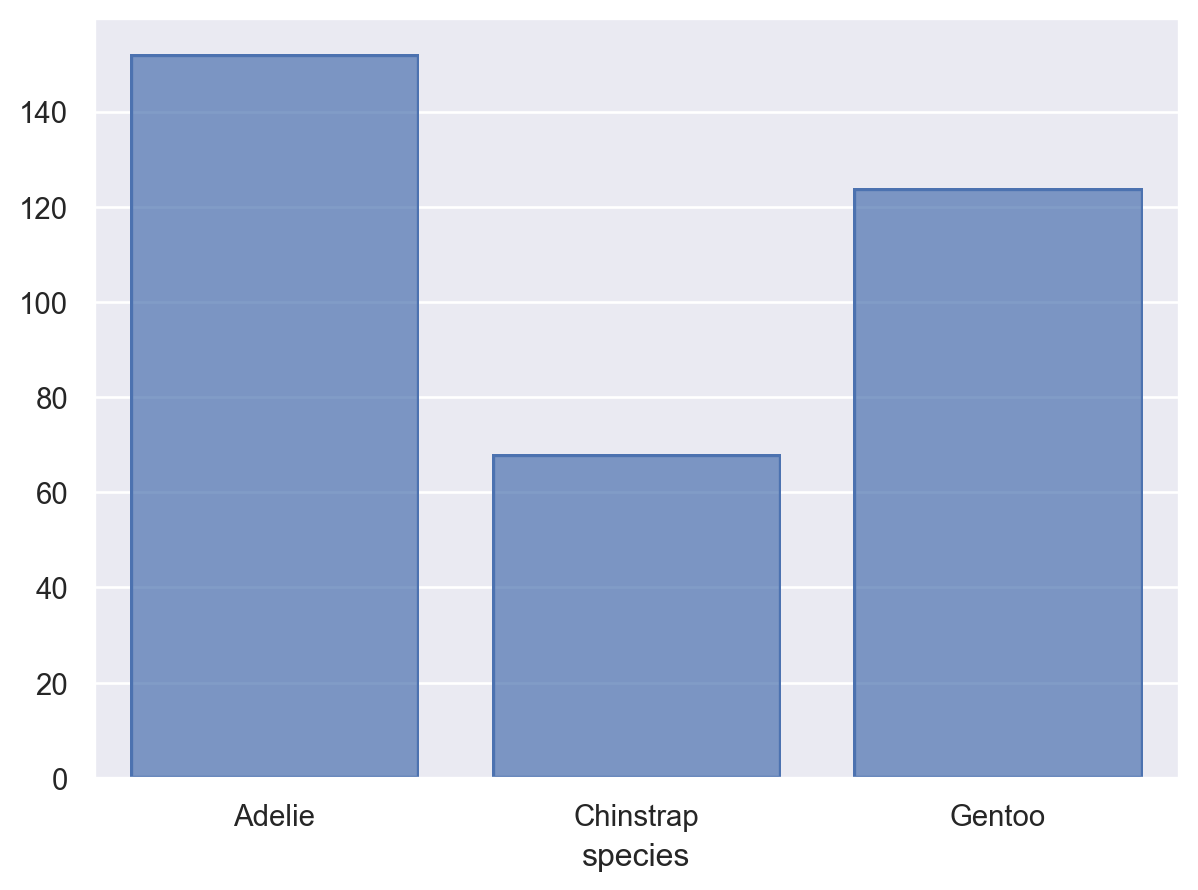

In [217]:
#| layout-ncol: 2
penguins = sns.load_dataset("penguins") # load a dataset: penguins

# Species에 inherent order가 없음; 알파벳 순으로 정렬
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Count())
)


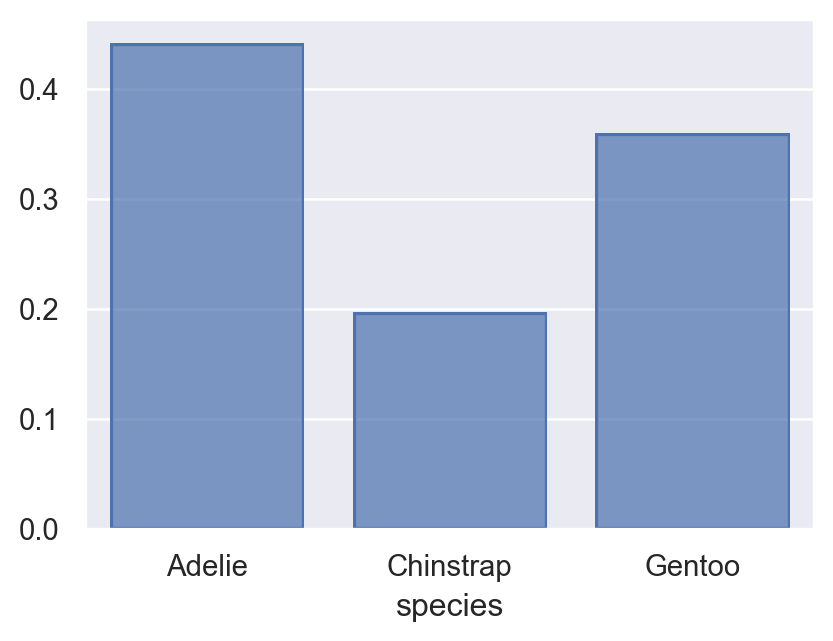

In [240]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Hist("proportion"))  # Hist()의 default는 stat="count"
    .layout(size=(4.5, 3.5))
)

# grouping의 처리에 대해서는 뒤에... 에를 들어, color="sex"

::: {.callout-important}
표시 순서를 변경하는 일은 의미있는 플랏을 만드는데 중요  
나중에 좀 더 자세히 다룸
:::

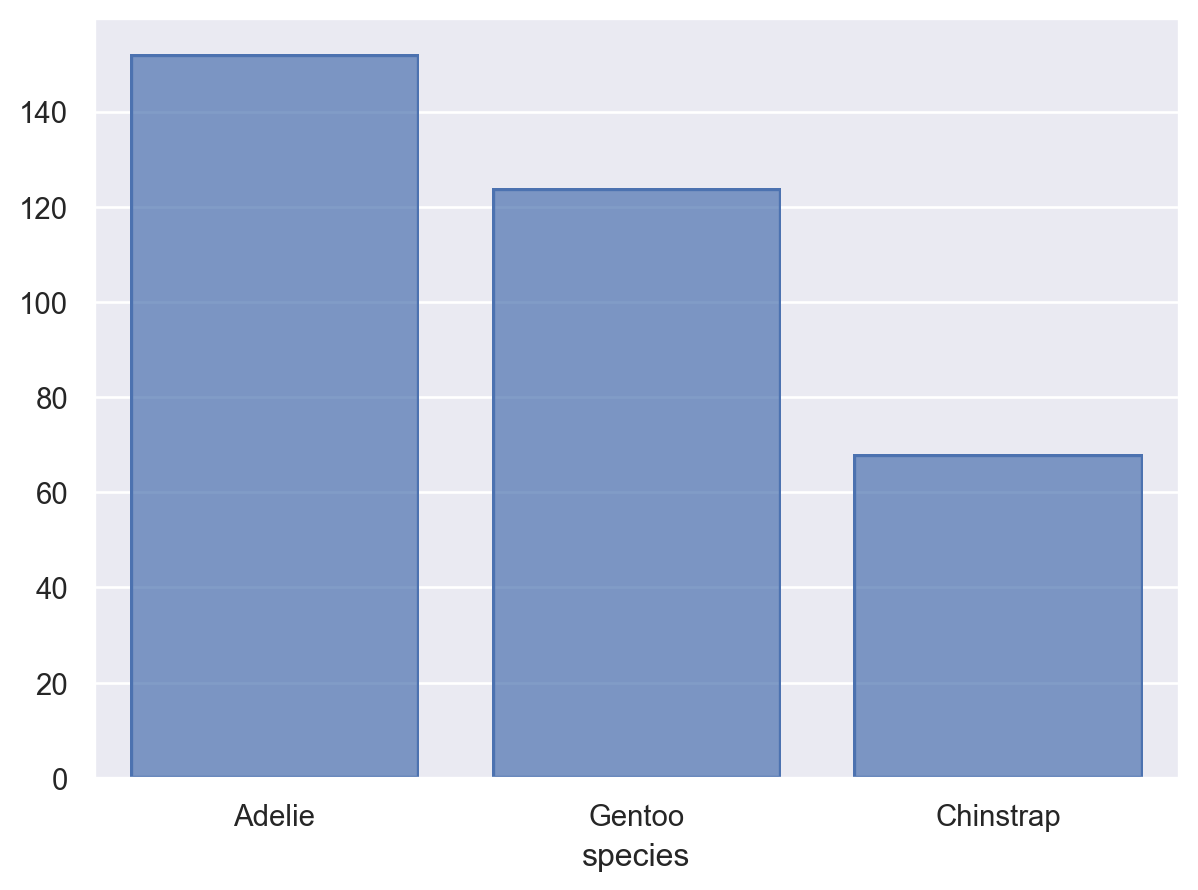

In [78]:
#| layout-ncol: 2

# value_counts()는 크기대로 sorting!
cl = penguins["species"].value_counts().index.values
#> array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Count())
    .scale(x=so.Nominal(order=cl)) # x축의 카테고리 순서를 변경
)

### A numerical variable

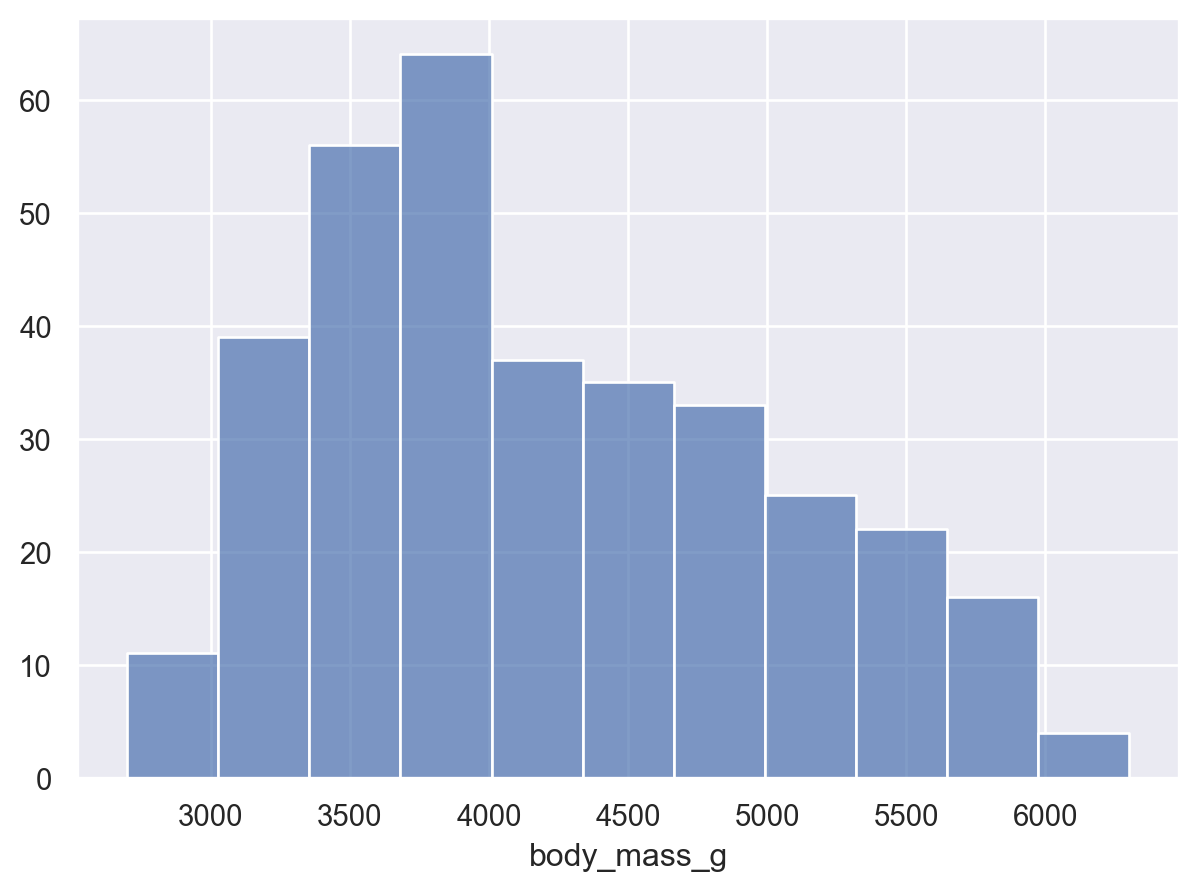

In [81]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g")
    .add(so.Bars(), so.Hist()) # Histogram; x값을 bins으로 나누어 count를 계산!
    # .Bars()는 .Bar()에 비해 연속변수에 더 적합: 얇은 경계선으로 나란히 붙혀서 그려짐
)

In [84]:
left = (
    so.Plot(penguins, x="body_mass_g")
    .add(so.Bars(), so.Hist(binwidth=100)) # binwidth vs. bins
)
right = (
    so.Plot(penguins, x="body_mass_g")
    .add(so.Bars(), so.Hist(bins=10)) # binwidth vs. bins
)

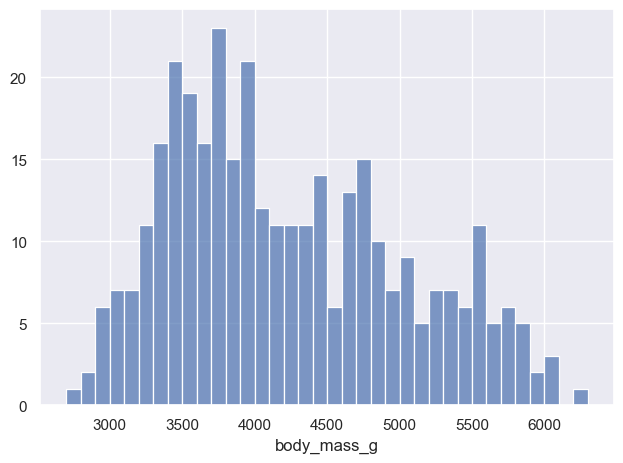

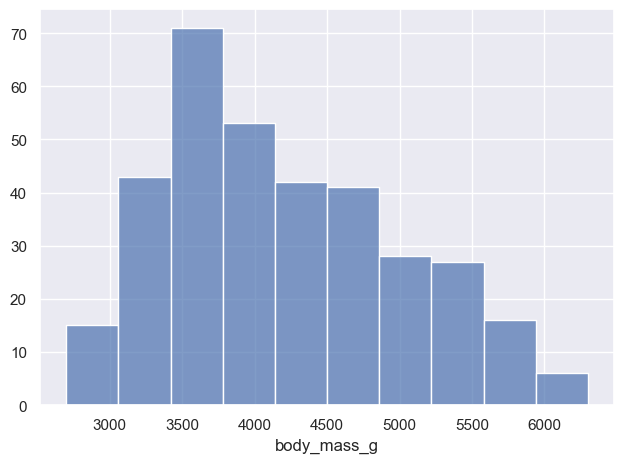

In [85]:
#| label: fig-charts5
#| fig-cap: binwidth vs. bins
#| fig-subcap: 
#|   - "binwidth=2"
#|   - "bins=5"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

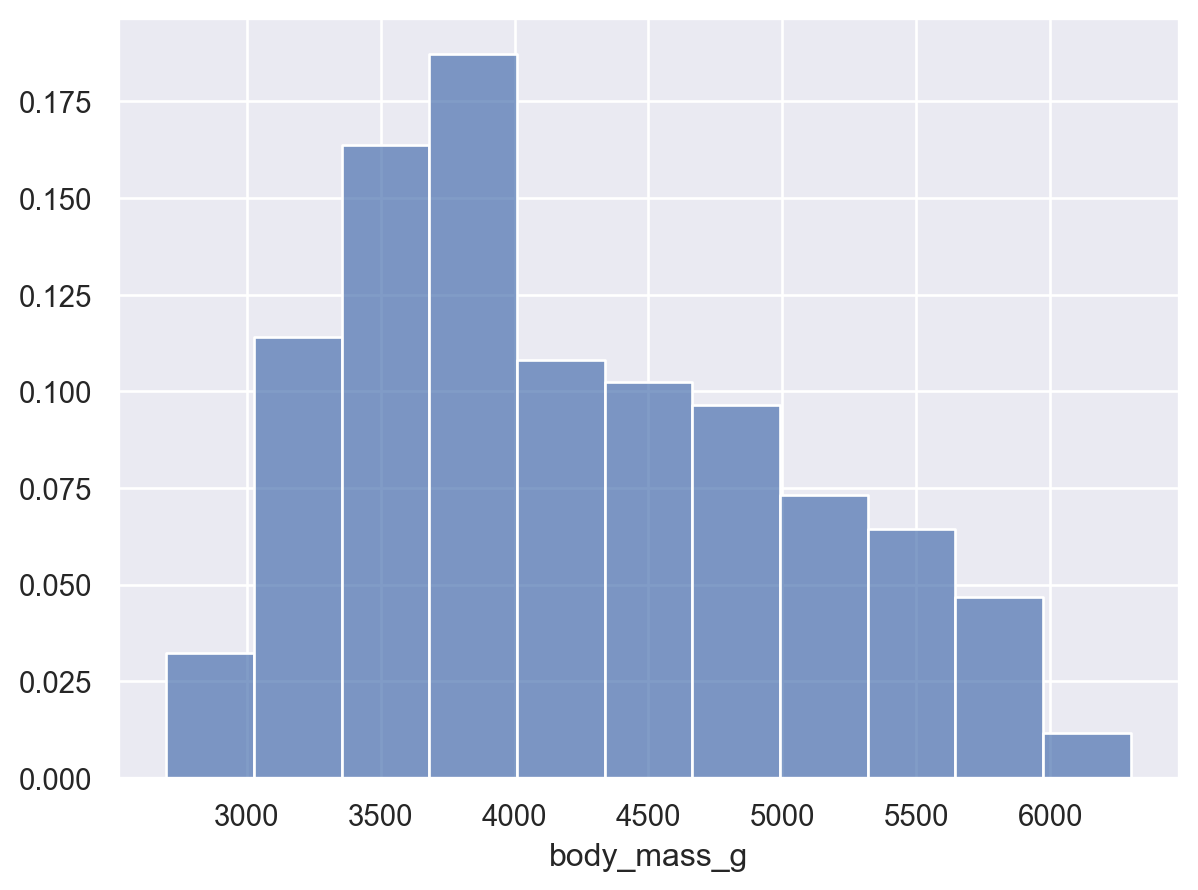

In [241]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g")
    .add(so.Bars(), so.Hist("proportion")) # 비율을 계산; stat="count"가 default
)

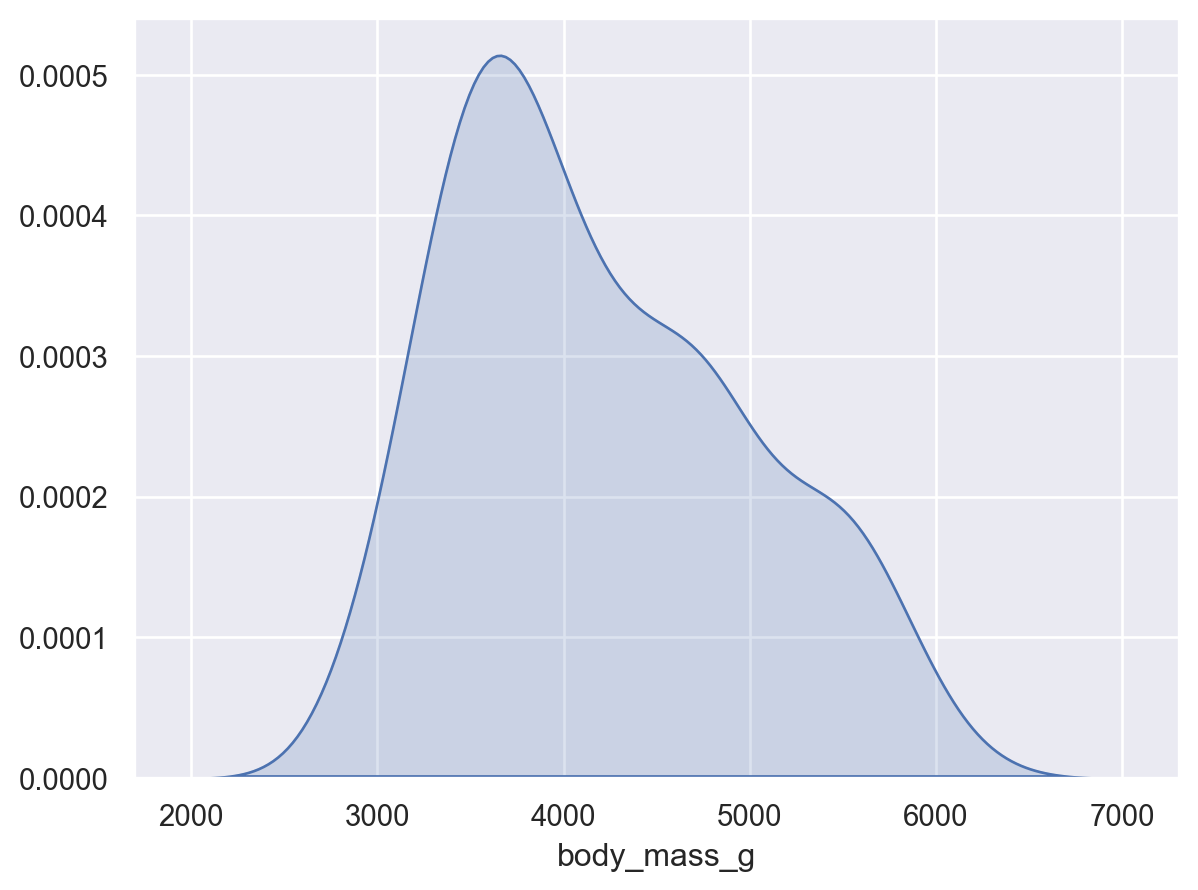

In [86]:
#| layout-ncol: 2
# Density plot: 넓이가 1이 되도록
(
    so.Plot(penguins, x="body_mass_g")
    .add(so.Area(), so.KDE()) # Density plot
)

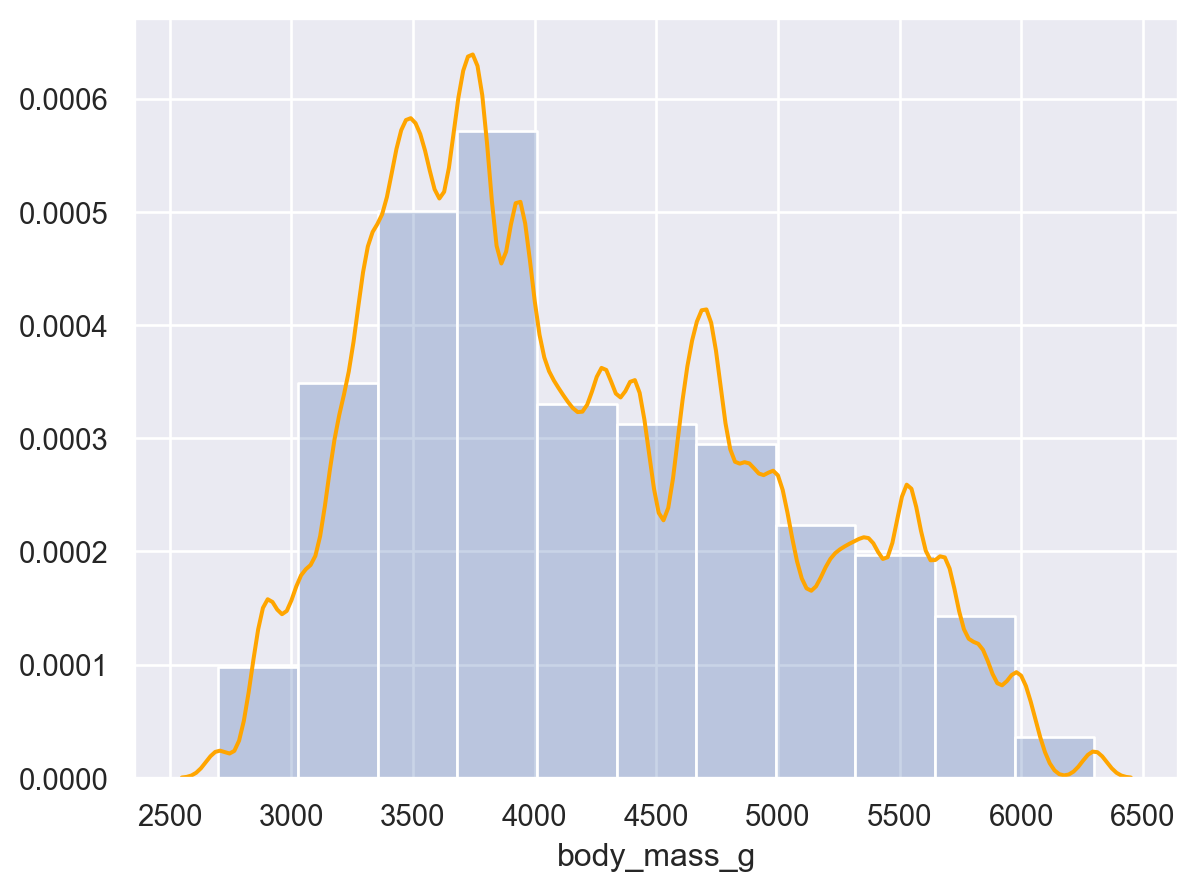

In [39]:
#| layout-ncol: 2
# Density plot: 넓이가 1이 되도록
(
    so.Plot(penguins, x="body_mass_g")
    .add(so.Line(color="orange"), so.KDE(bw_adjust=.2)) # Density bandwidth: binwidth에 대응
    .add(so.Bars(alpha=.3), so.Hist("density")) # stat="density"
)

## Visualizing relationships

### A numerical and a categorical variable

- Boxplot
- **Grouped** distribution: histogram, frequency polygon, density plot

**Boxplot**  
![](images/boxplot.png)  
source: R for Data Science

![](images/plot_cps4.png){width=900}

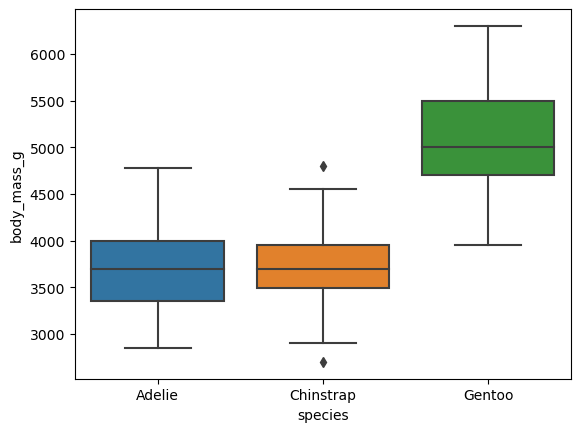

In [4]:
#| layout-ncol: 2
sns.boxplot(penguins, x="species", y="body_mass_g")
plt.show() # 생략해도 무방

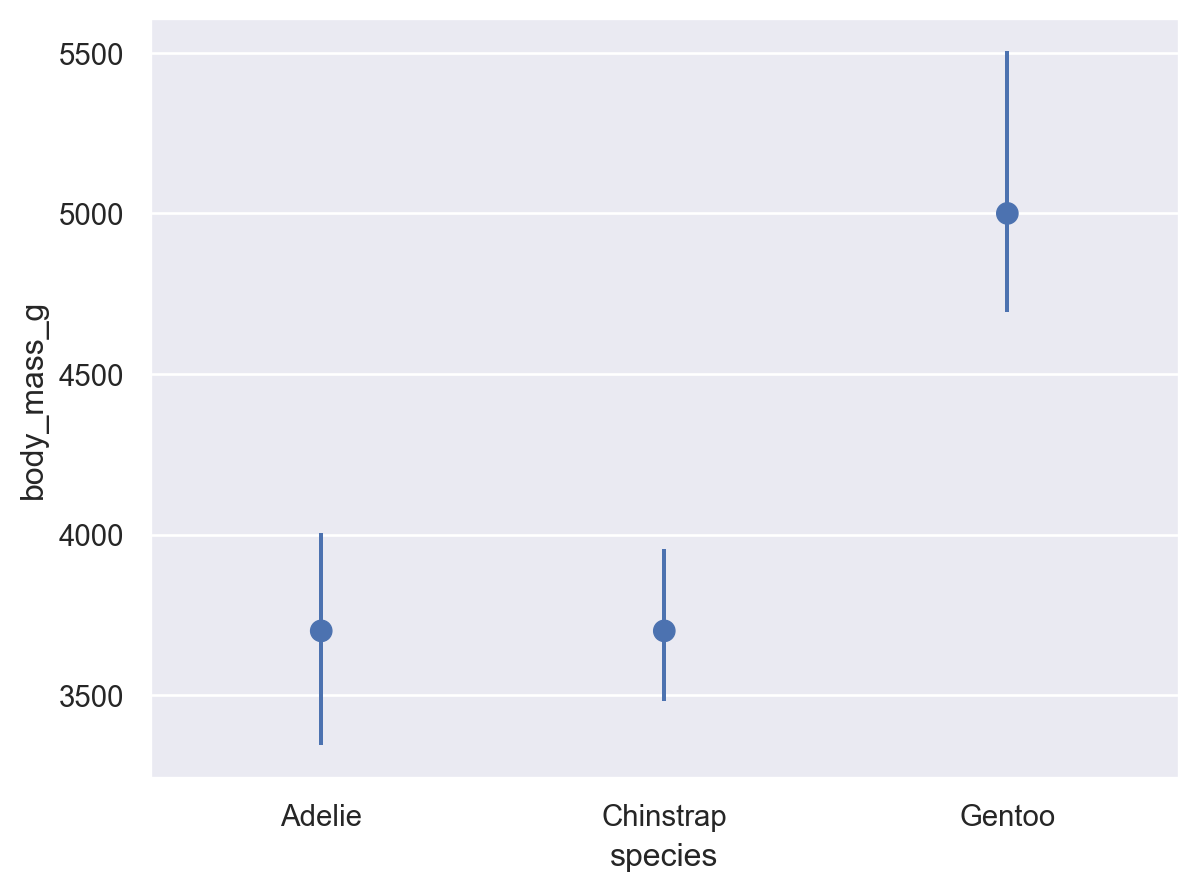

In [6]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=8), so.Agg("median")) # .Agg(): aggregation, default는 mean
    .add(so.Range(), so.Est("median", errorbar=("pi", 50))) # .Range(): 기본 min/max range, .Est(): estimator
)

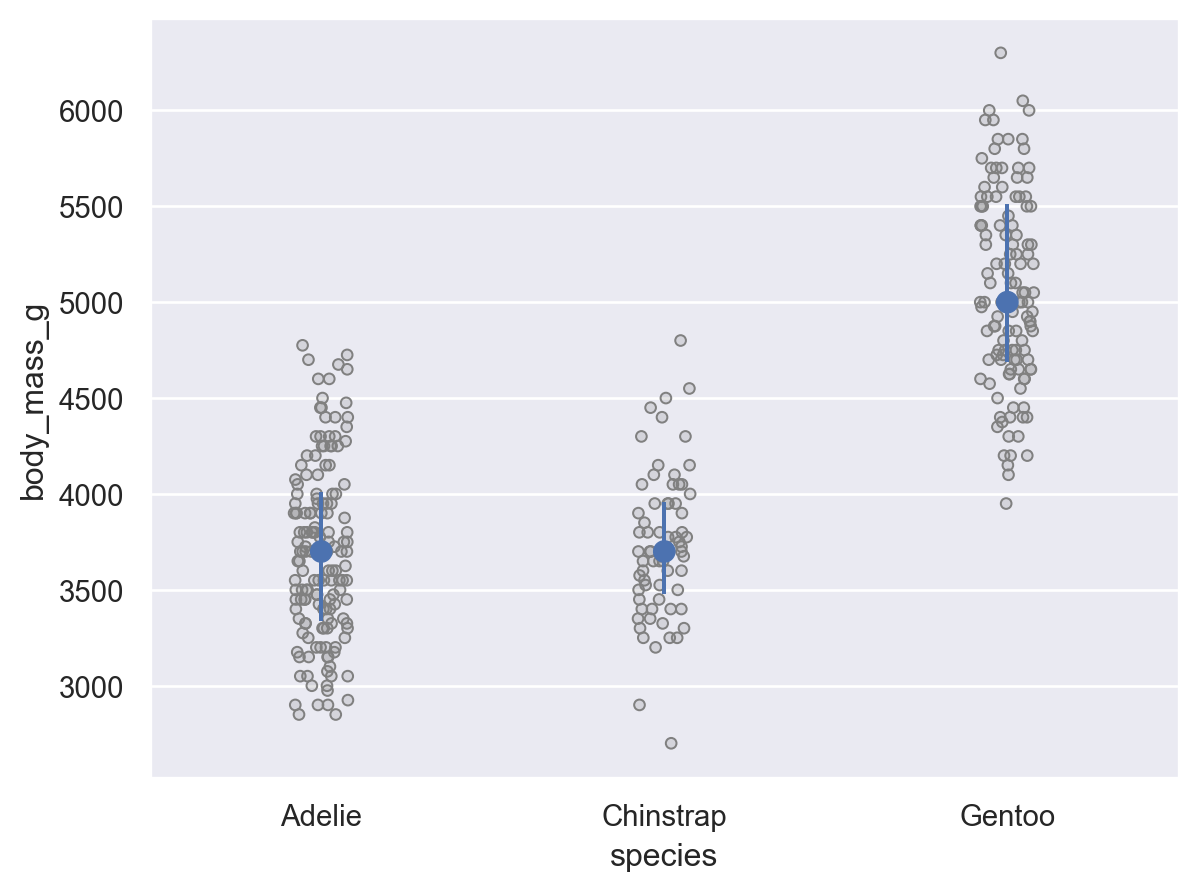

In [33]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dots(color=".5"), so.Jitter()) # so.Jitter(): 흐트려뜨려 그리기
    .add(so.Dot(pointsize=8), so.Agg("median")) # .Agg(): aggregation, default는 mean
    .add(so.Range(), so.Est("median", errorbar=("pi", 50))) # .Range(): 기본 min/max range, .Est(): estimator
)

Error bars에 대해서는 [seaborn/statistical estimation and error bars](https://seaborn.pydata.org/tutorial/error_bars.html)

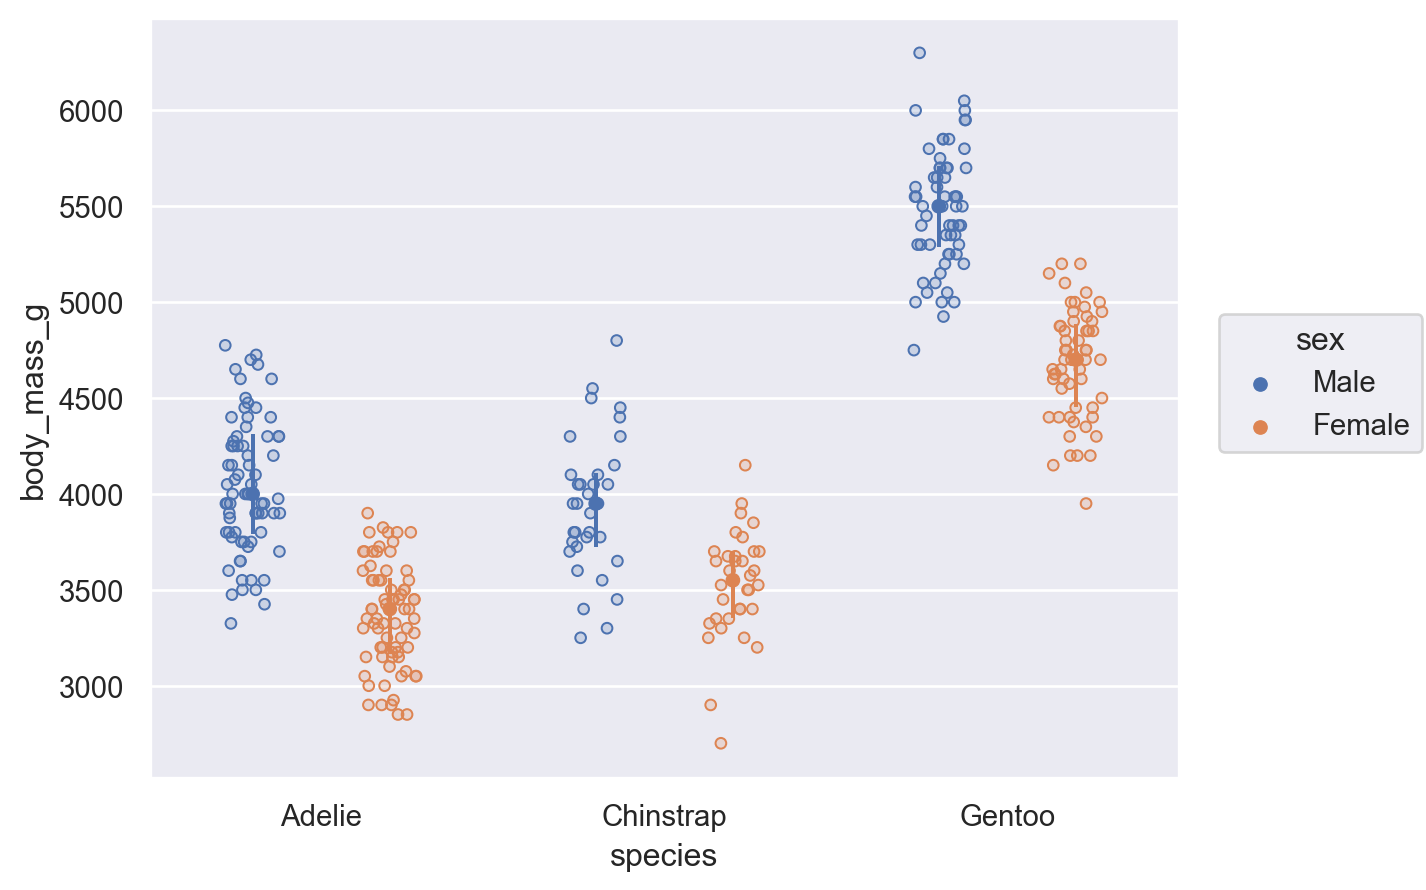

In [40]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dots(), so.Jitter(), so.Dodge())
    .add(so.Dot(pointsize=5), so.Agg("median"), so.Dodge())
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
)

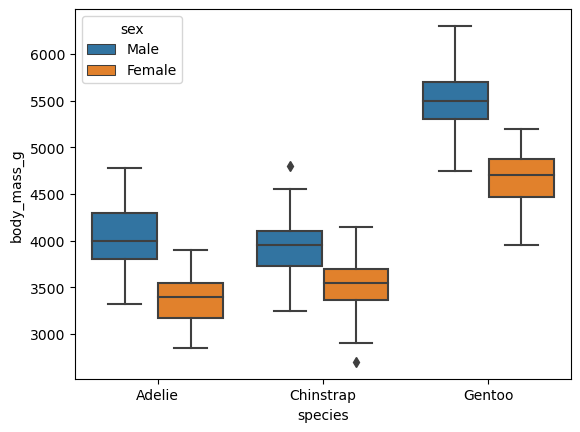

In [34]:
#| layout-ncol: 2
sns.boxplot(penguins, x="species", y="body_mass_g", hue="sex")
plt.show() # 생략해도 무방

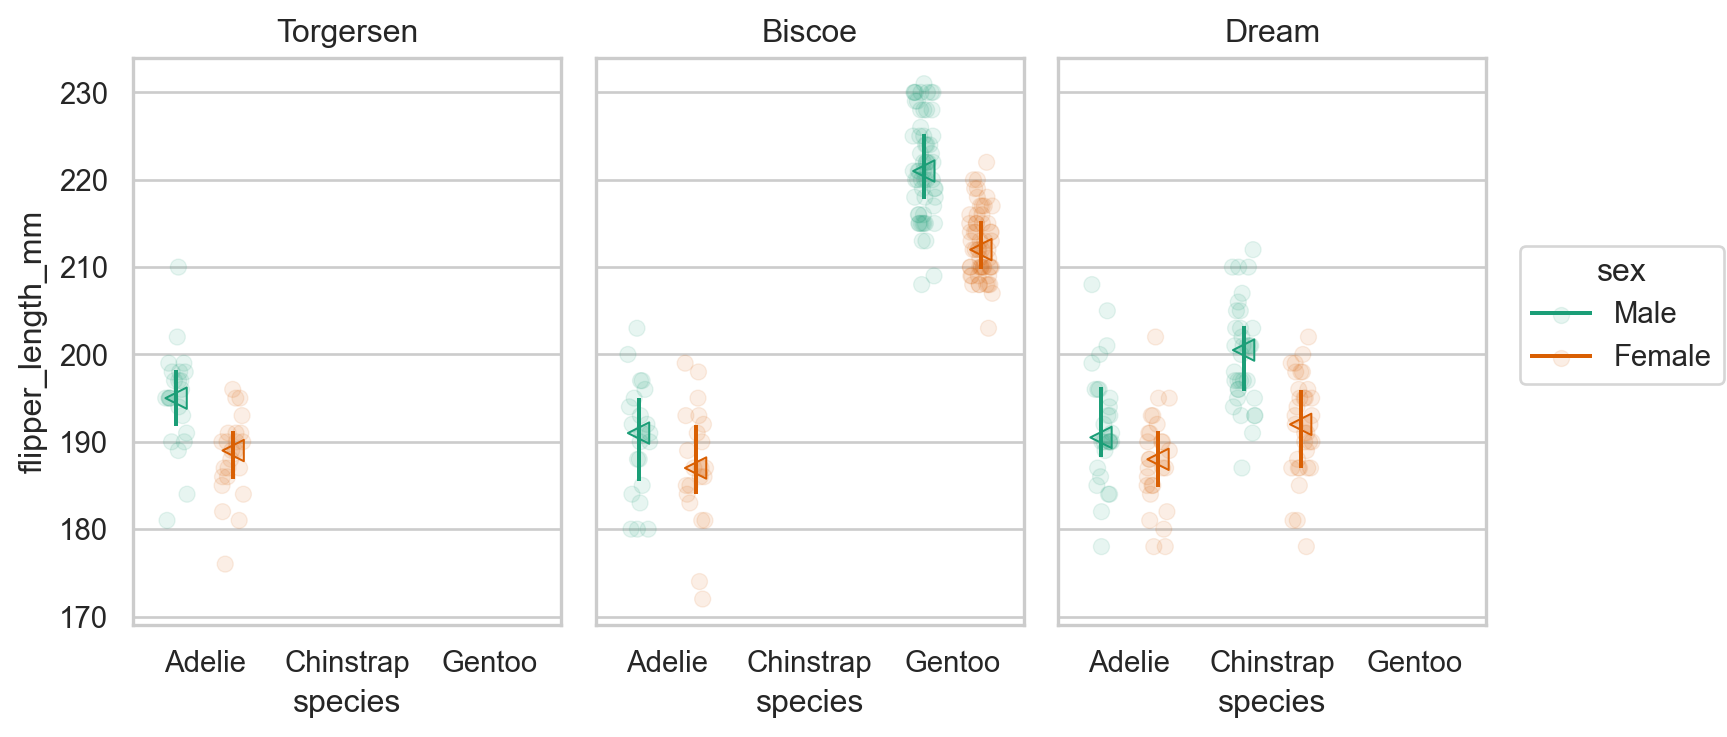

In [162]:
# Build a boxplot!
def boxplot(df, x, y, color=None, alpha=0.1):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".8"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )
(
    boxplot(penguins, x="species", y="flipper_length_mm", color="sex")
    .facet("island")
    .layout(size=(8, 4))
)

**Histogram**

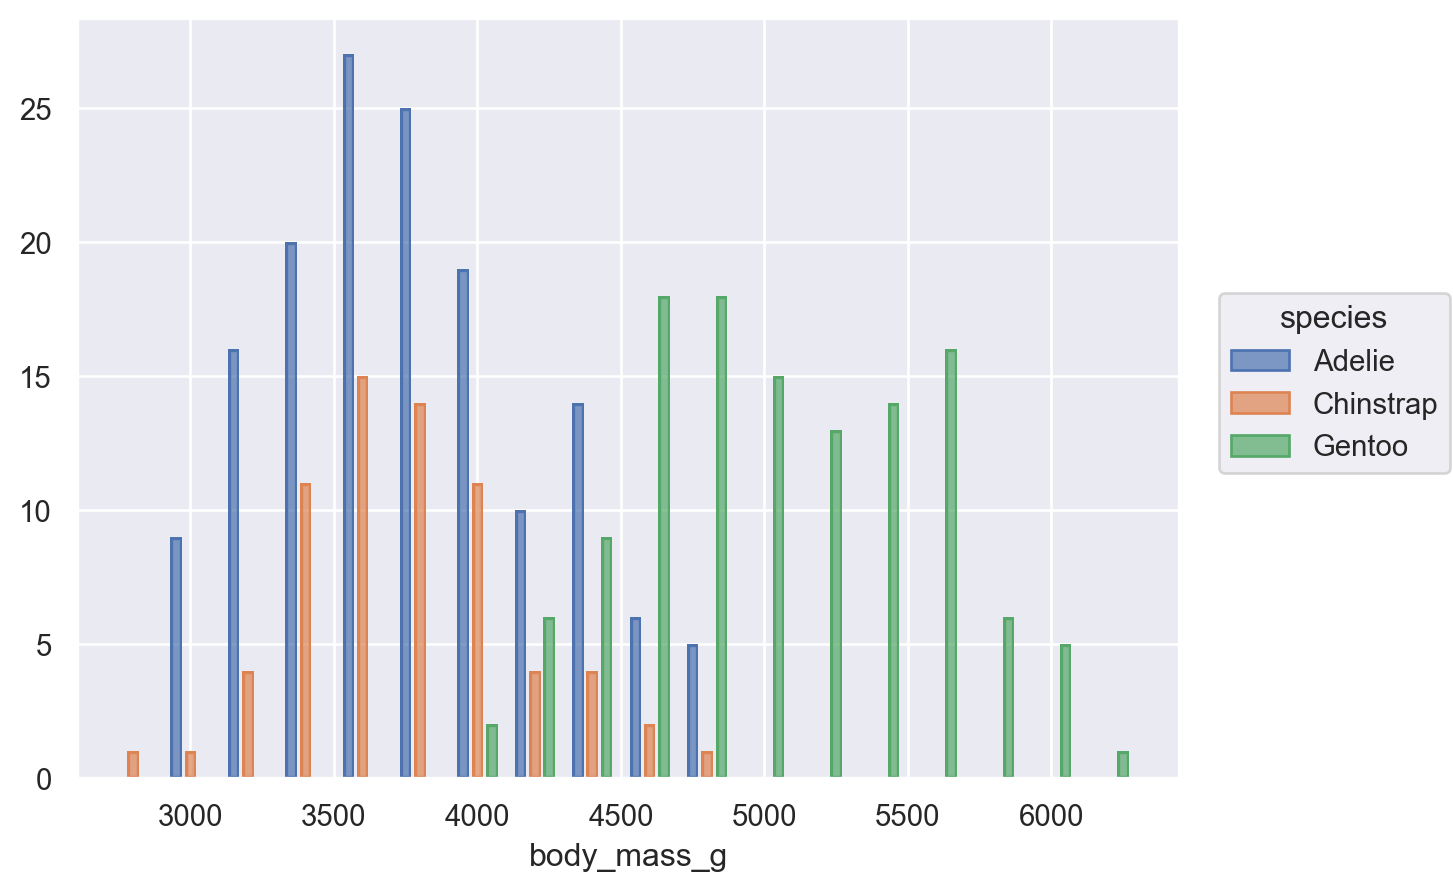

In [288]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Bar(), so.Hist(binwidth=200, common_bins=False))  # bins을 공유하지 않도록
)
# Hist(): 다양한 parameter가 있음...

**Frequency polygon**

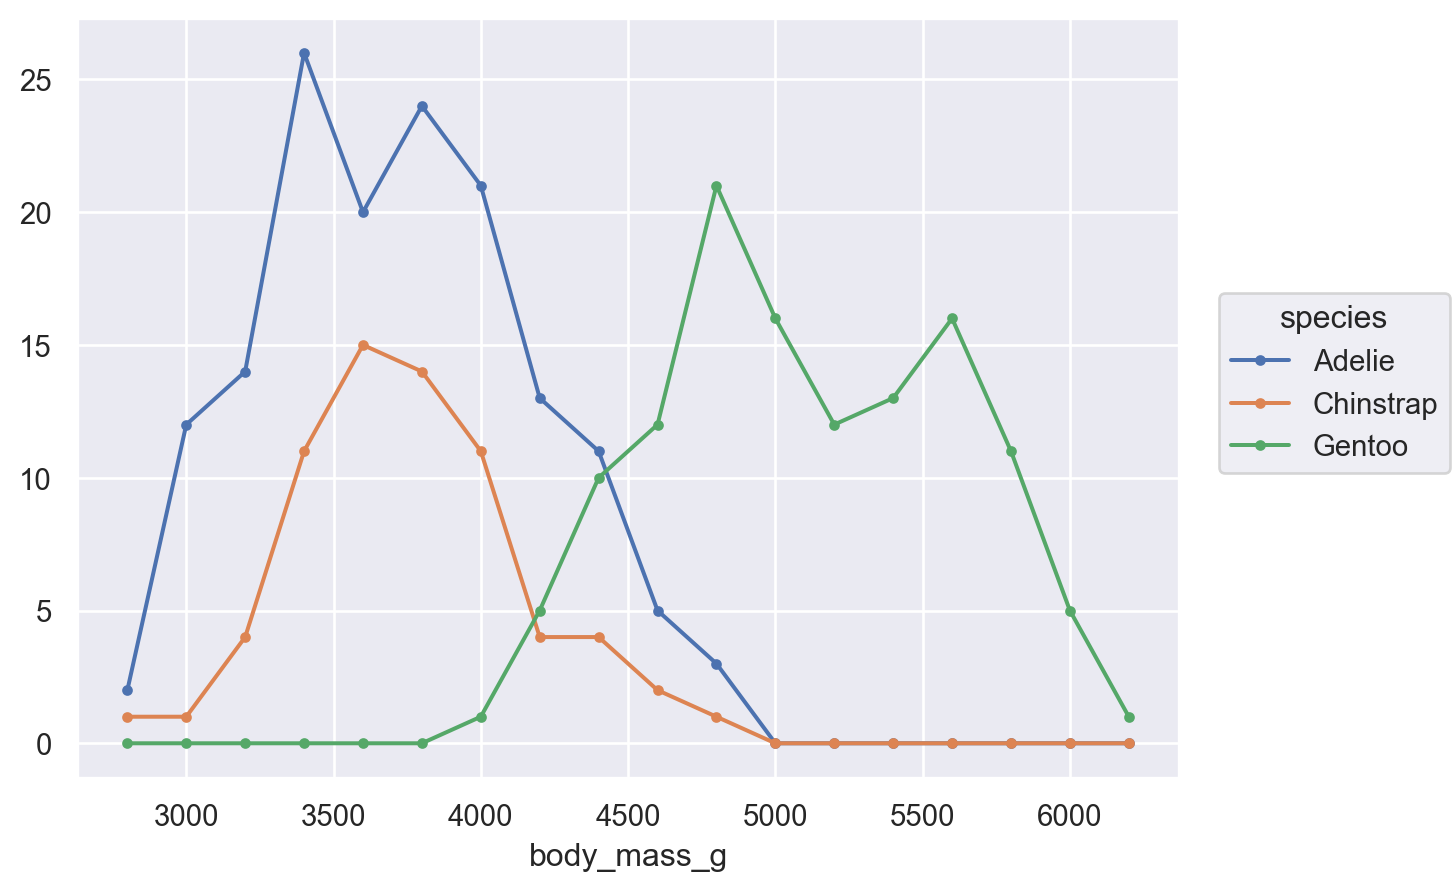

In [290]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Line(marker="."), so.Hist(binwidth=200)) # Line에 maker "."을 표시
)

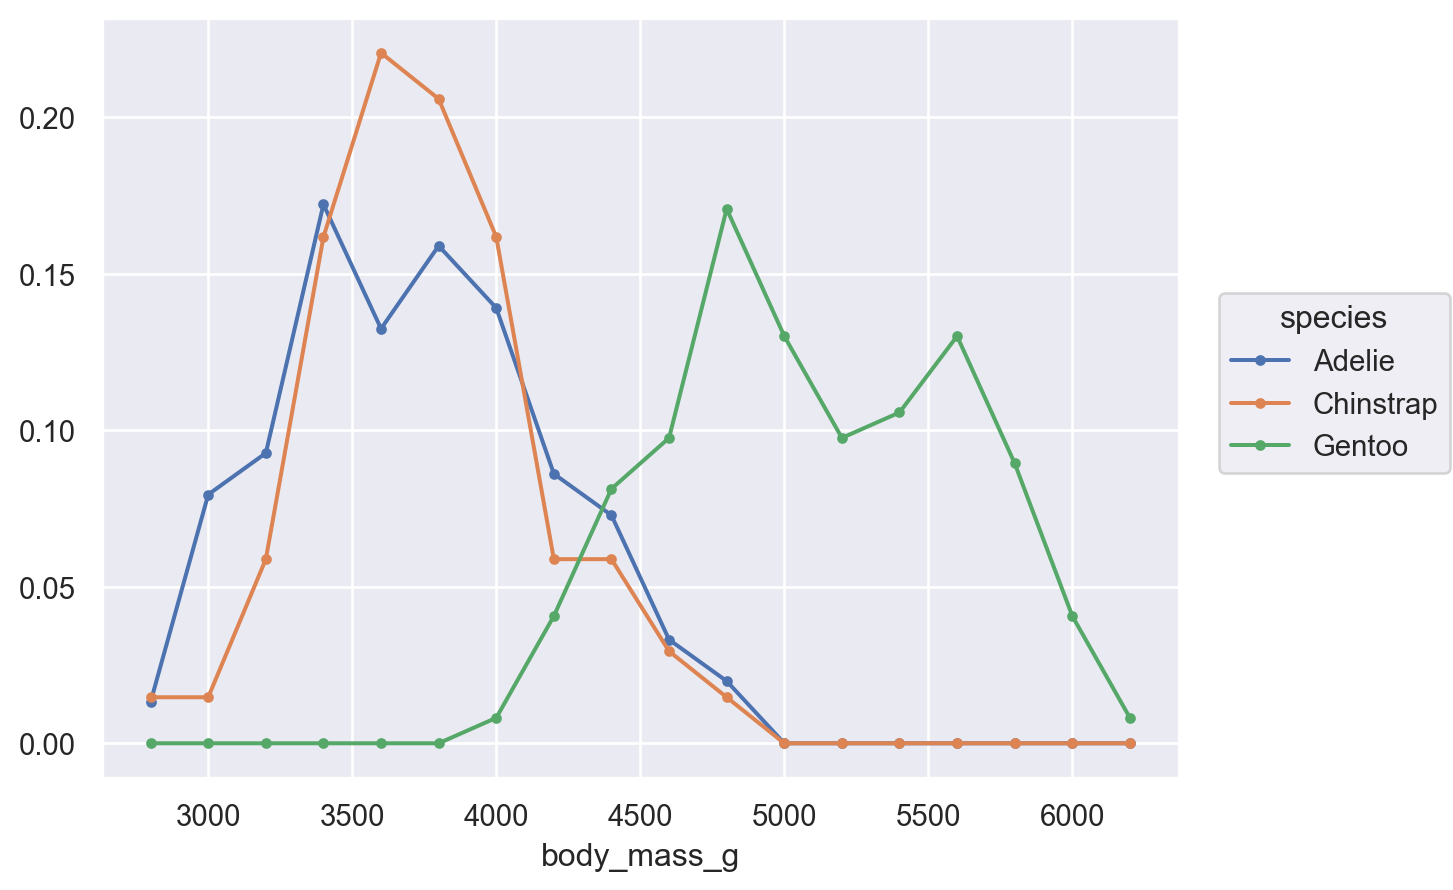

In [293]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Line(marker="."), so.Hist(binwidth=200, stat="proportion",  common_norm=False)) # Line에 maker "."을 표시
)

**Density plot**

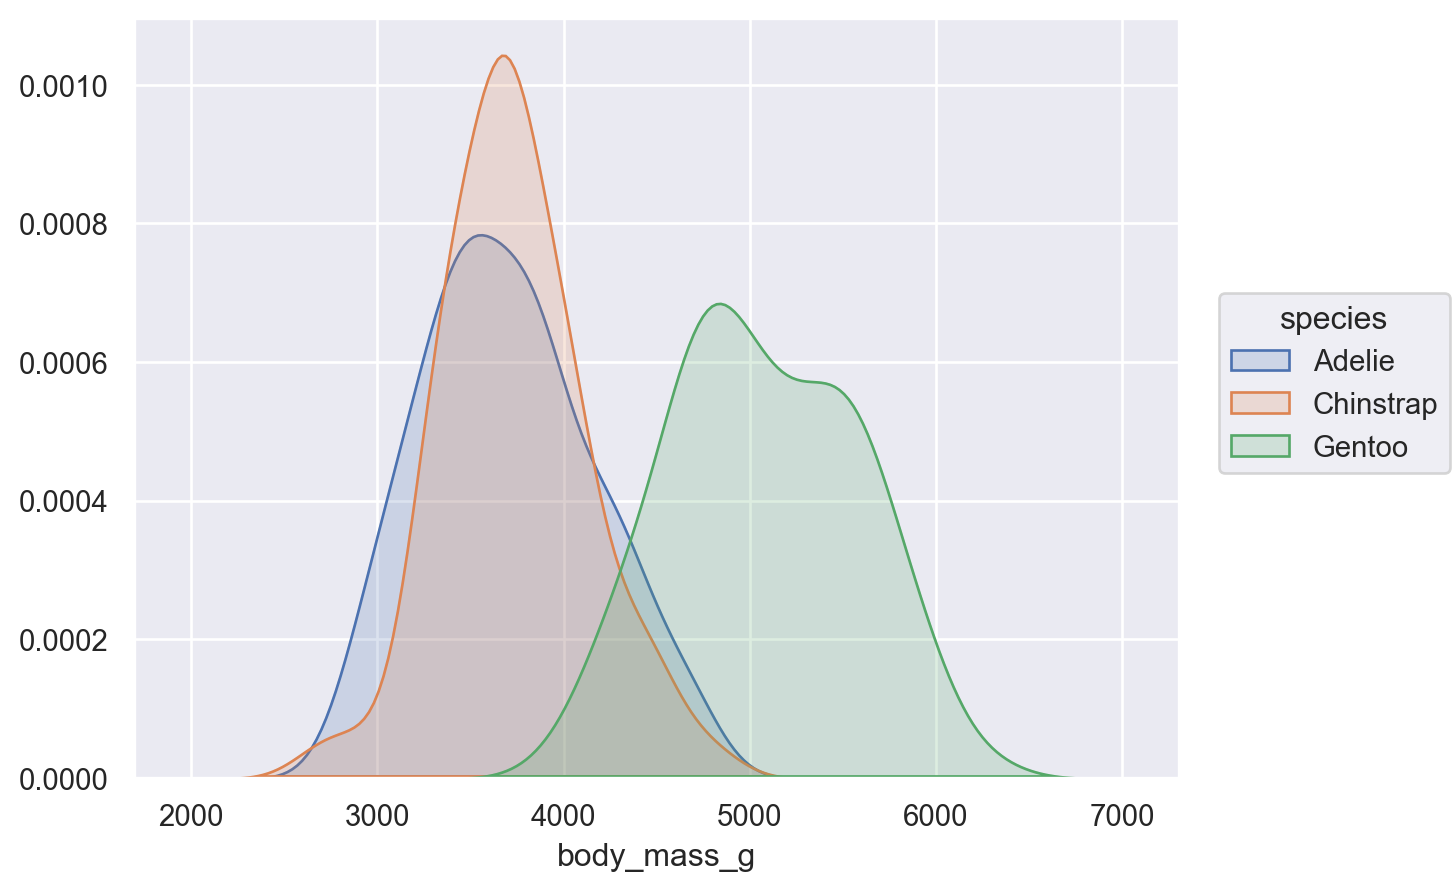

In [295]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Area(), so.KDE(common_norm=False)) # Density plot, species별로 넓이가 1이 되도록
)

### Two categorical variables

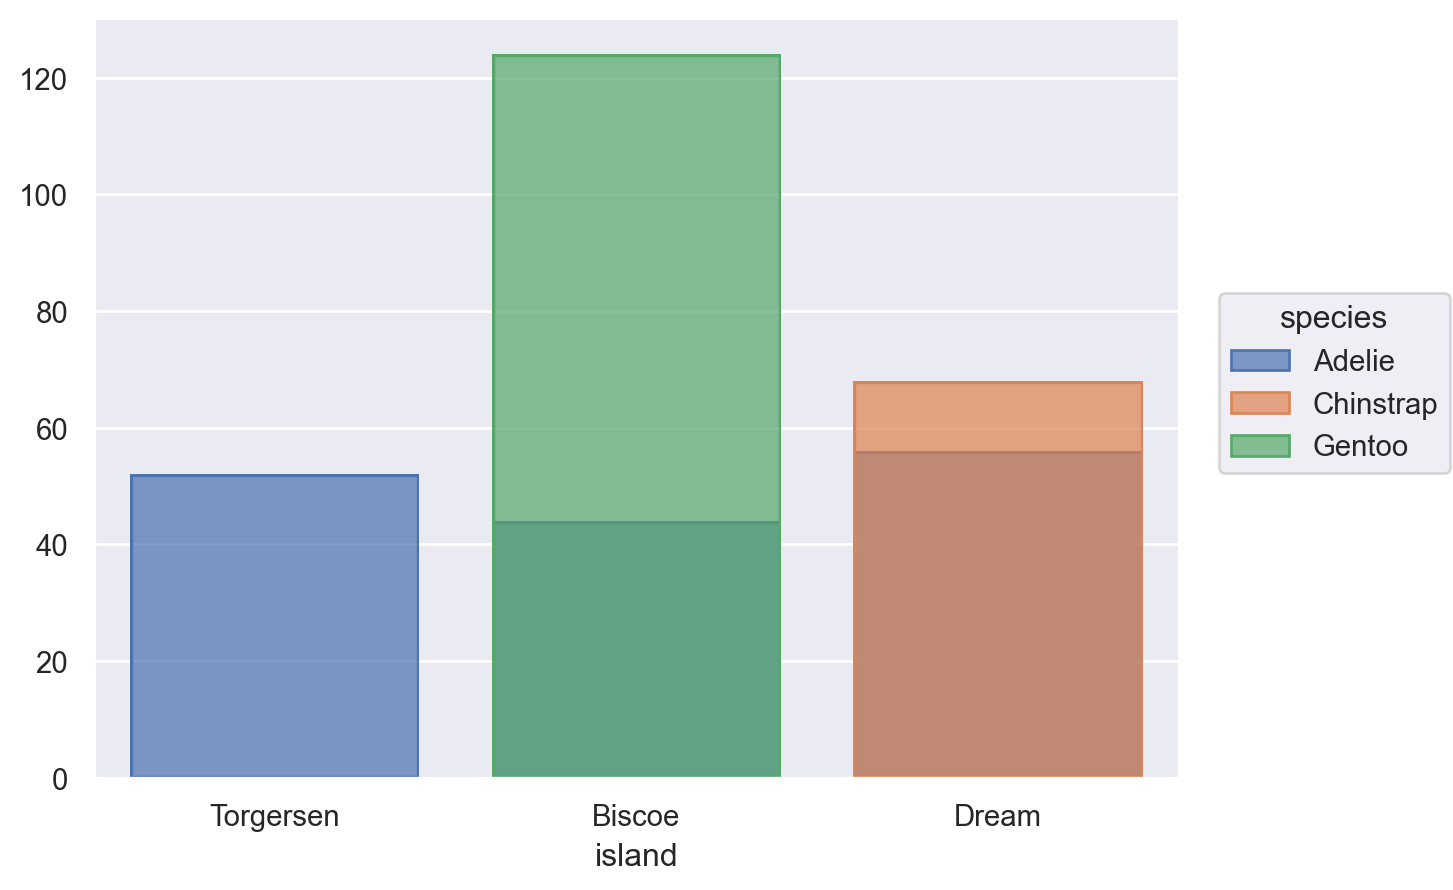

In [242]:
#| layout-ncol: 2
p = so.Plot(penguins, x="island", color="species")
p.add(so.Bar(), so.Count()) # Bar() mark + Count() transformation

In [111]:
left = p.add(so.Bar(), so.Count(), so.Dodge()) # 나란히 표시
right = p.add(so.Bar(), so.Count(), so.Stack()) # stacking

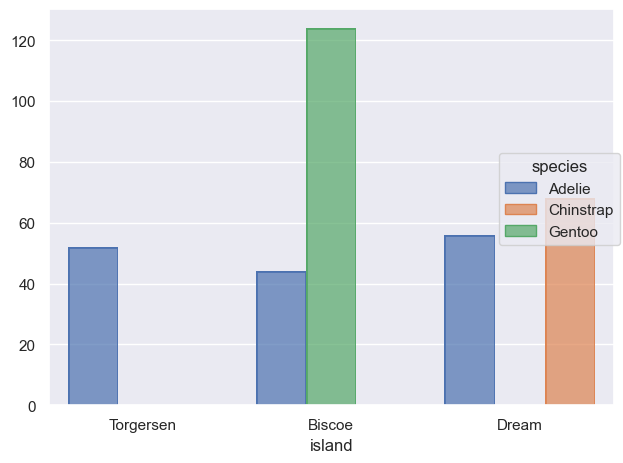

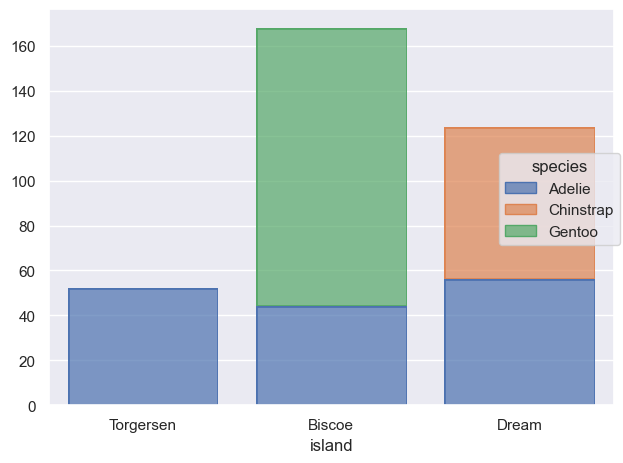

In [112]:
#| label: fig-charts6
#| fig-cap: dodge vs. stack
#| fig-subcap: 
#|   - "dodge"
#|   - "stack"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

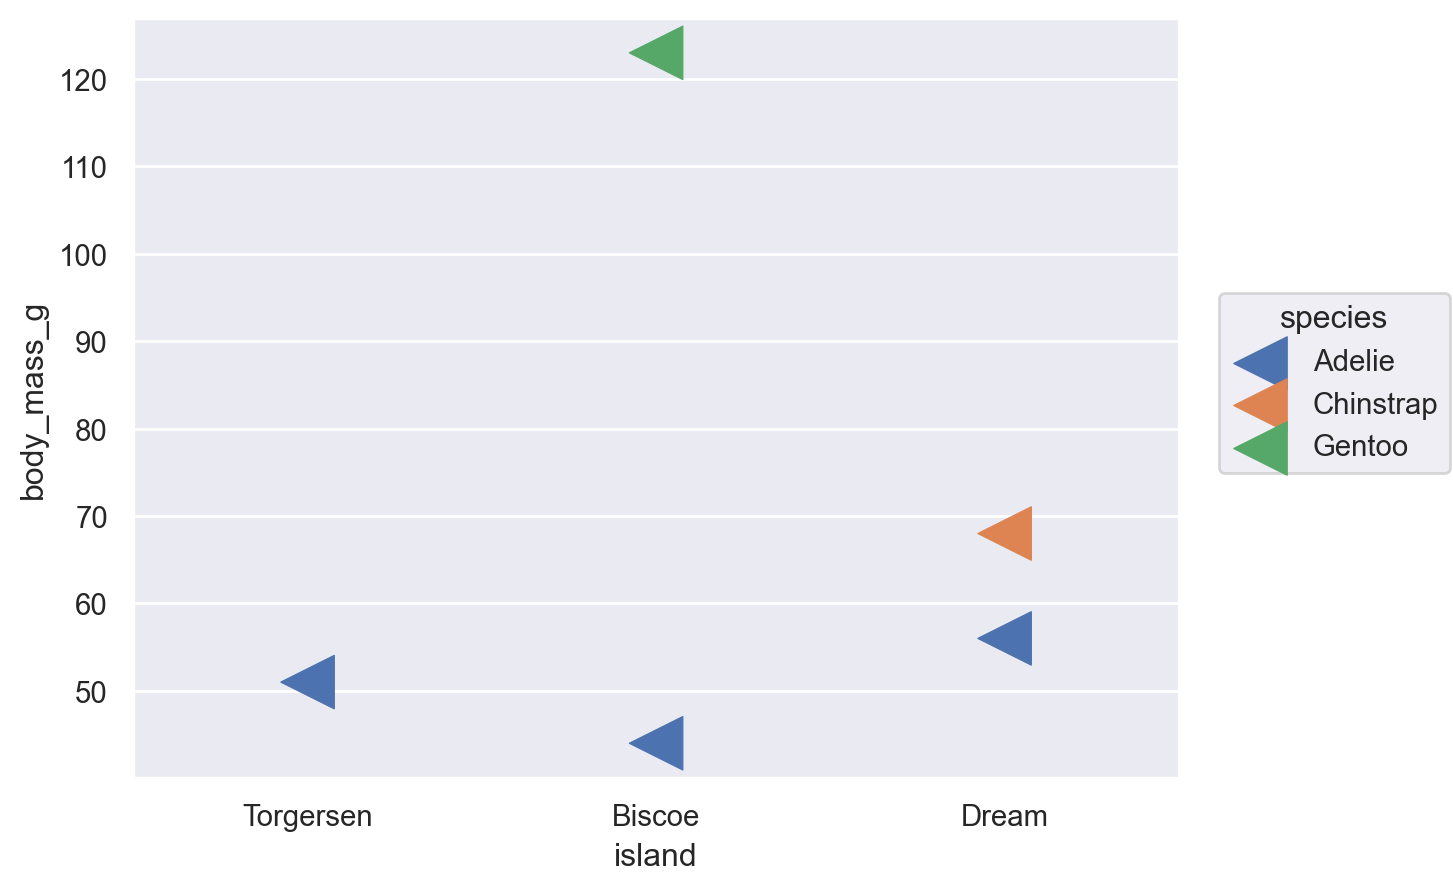

In [328]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="island", y="body_mass_g", color="species")
    .add(so.Dot(pointsize=20, marker="<"), so.Agg("count"))
)

Count 대신 proportion을 표시하는 경우

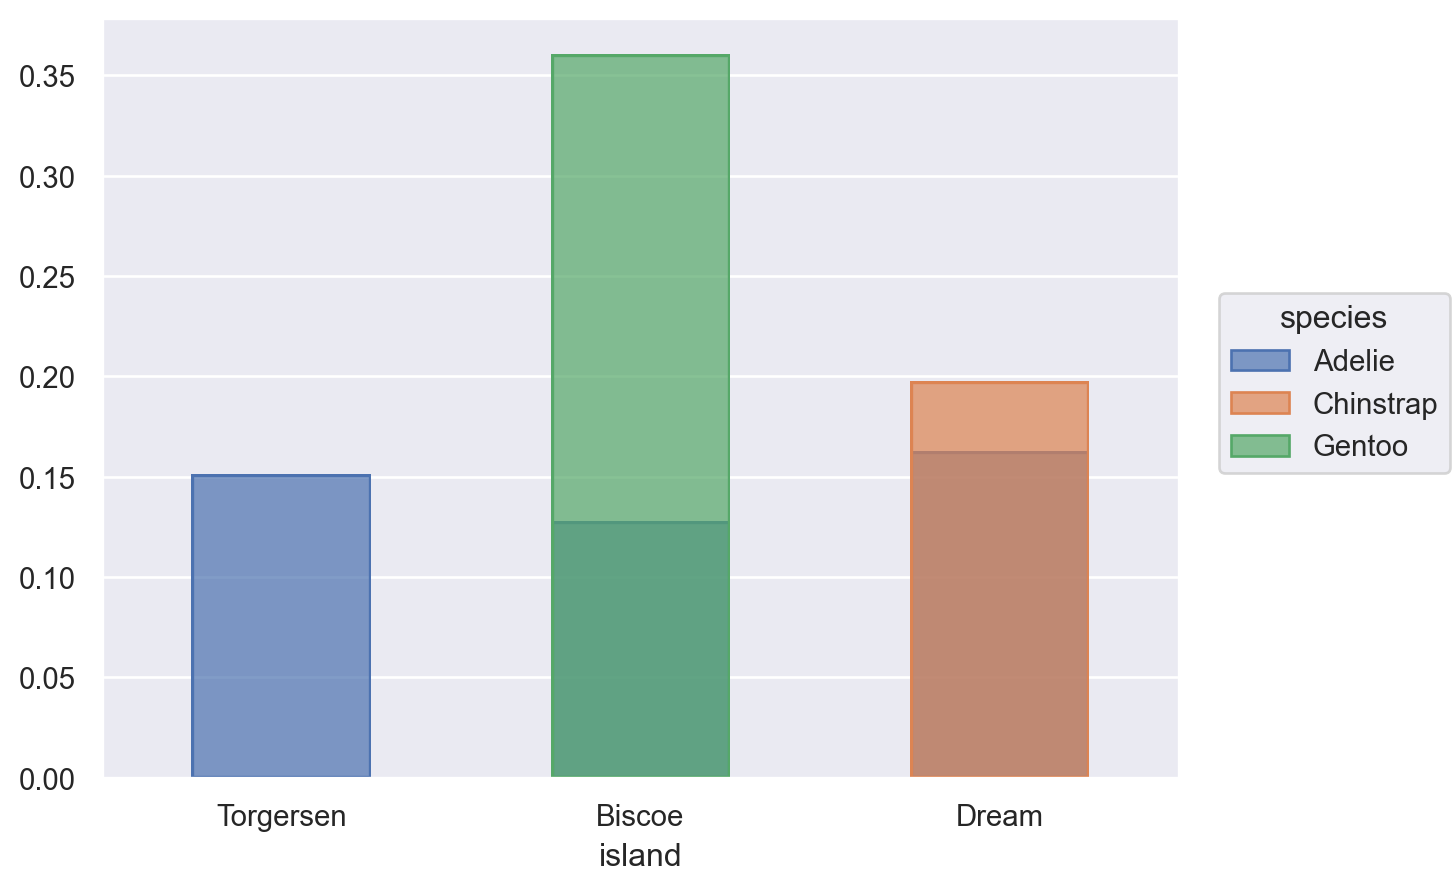

In [303]:
#| layout-ncol: 2
p.add(
    so.Bar(width=.5), so.Hist("proportion"), # proportion; stat="count"로 하면 앞서 so.Count()와 동일
    so.Stack() # stacking
)

/Users/georgeair/miniconda3/envs/envconda/lib/python3.11/site-packages/seaborn/_stats/counting.py:228: UserWarning: Undefined variable(s) passed for Hist.common_norm: 'x'.
  self._check_grouping_vars("common_norm", grouping_vars)


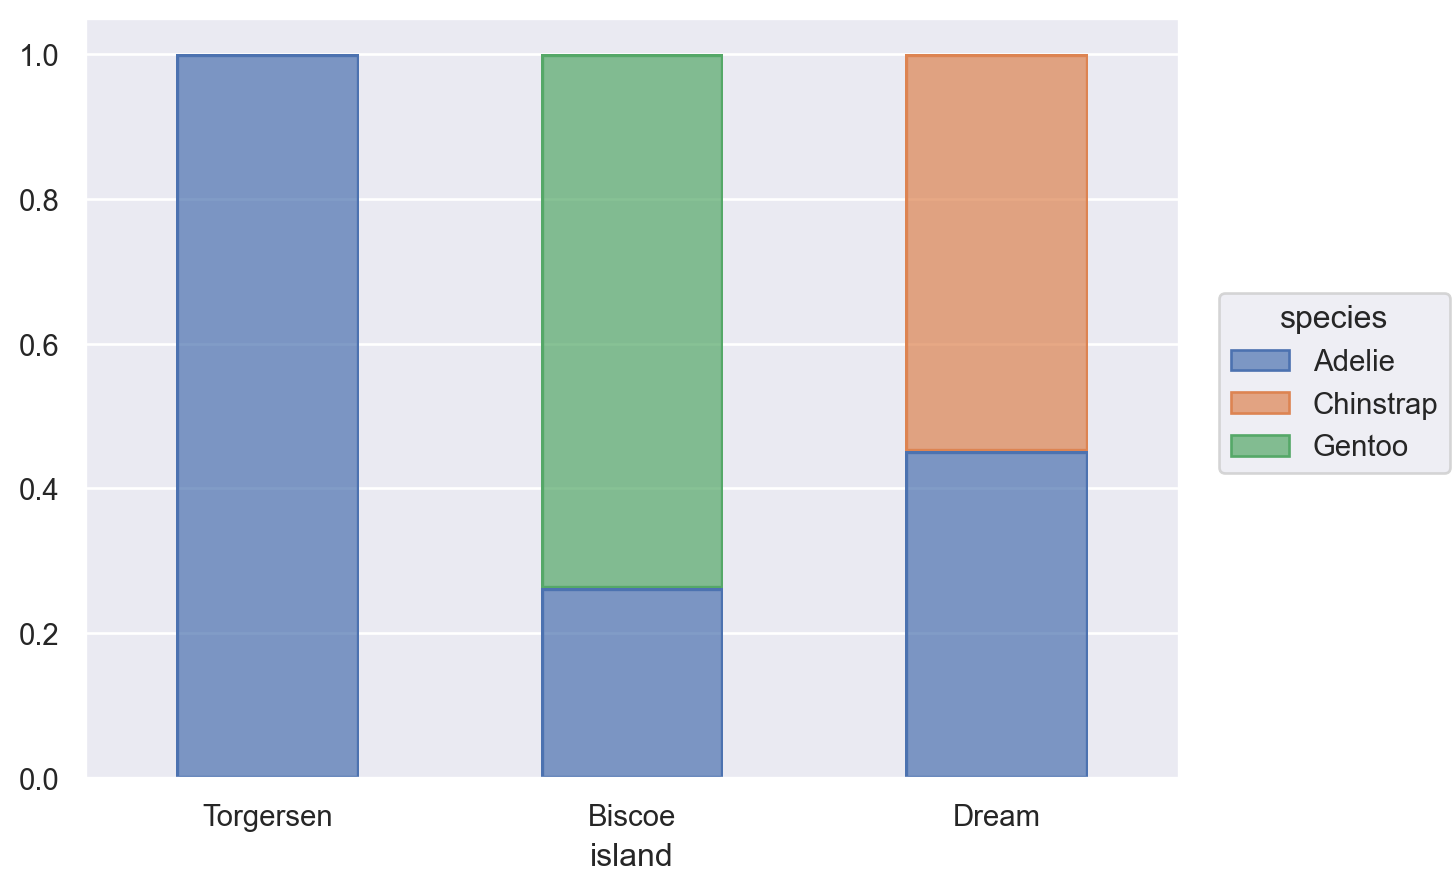

In [304]:
#| layout-ncol: 2
#| warning: false
p.add(
    so.Bar(width=.5), so.Hist("proportion", common_norm=["x"]), # proportion; 
    so.Stack() # stacking
)

/Users/georgeair/miniconda3/envs/envconda/lib/python3.11/site-packages/seaborn/_stats/counting.py:228: UserWarning: Undefined variable(s) passed for Hist.common_norm: 'x'.
  self._check_grouping_vars("common_norm", grouping_vars)


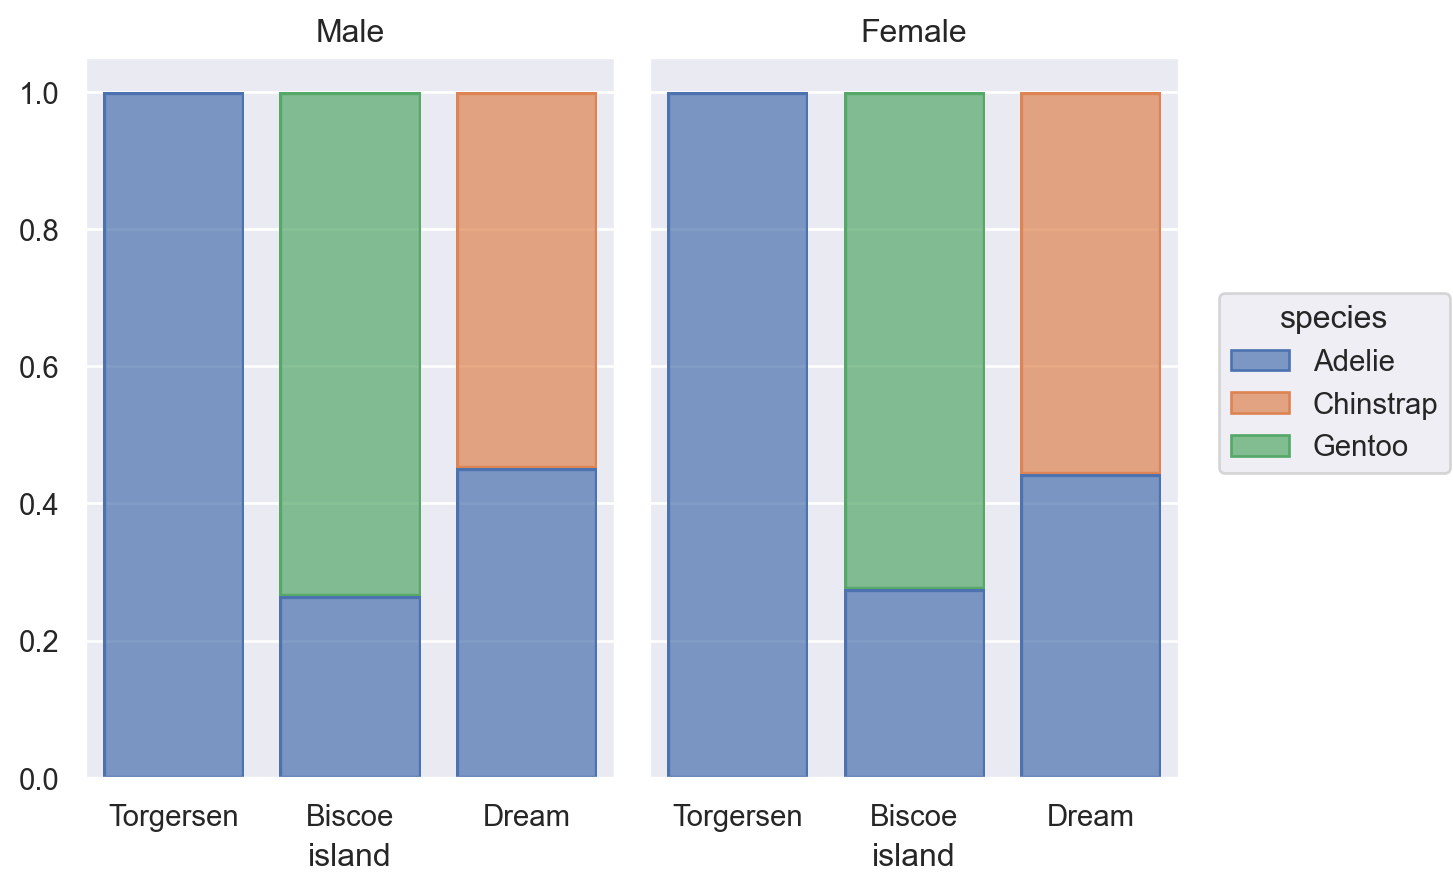

In [305]:
#| warning: false
p.add(
    so.Bar(width=.8), so.Hist("proportion", common_norm=["x", "col"]), # proportion
    so.Stack(), # stacking
).facet(col="sex") # faceting

### Two numerical variables

Scatterplot

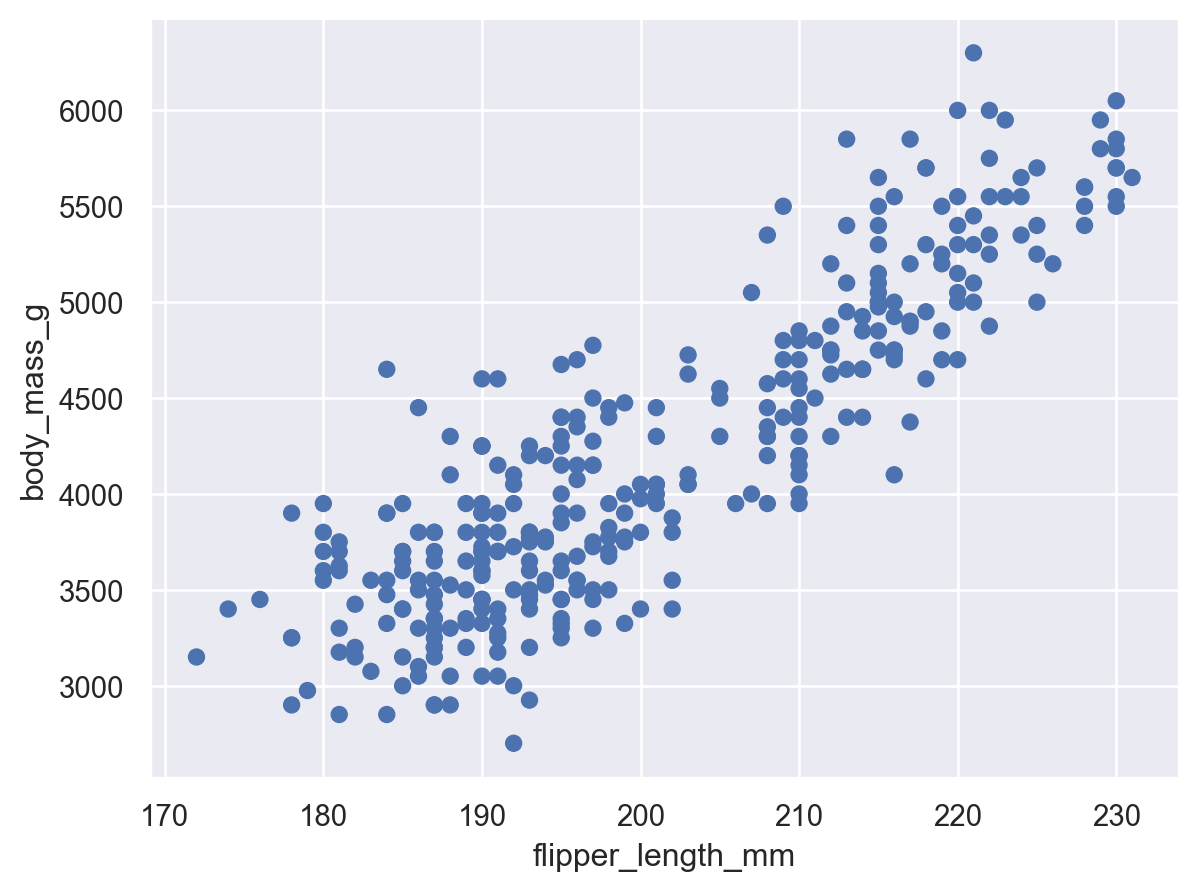

In [116]:
#| layout-ncol: 2
(
    so.Plot(penguins, x="flipper_length_mm", y="body_mass_g")
    .add(so.Dot())  # overplotting에는 so.Dots()가 유리 
)

### Three or more variables

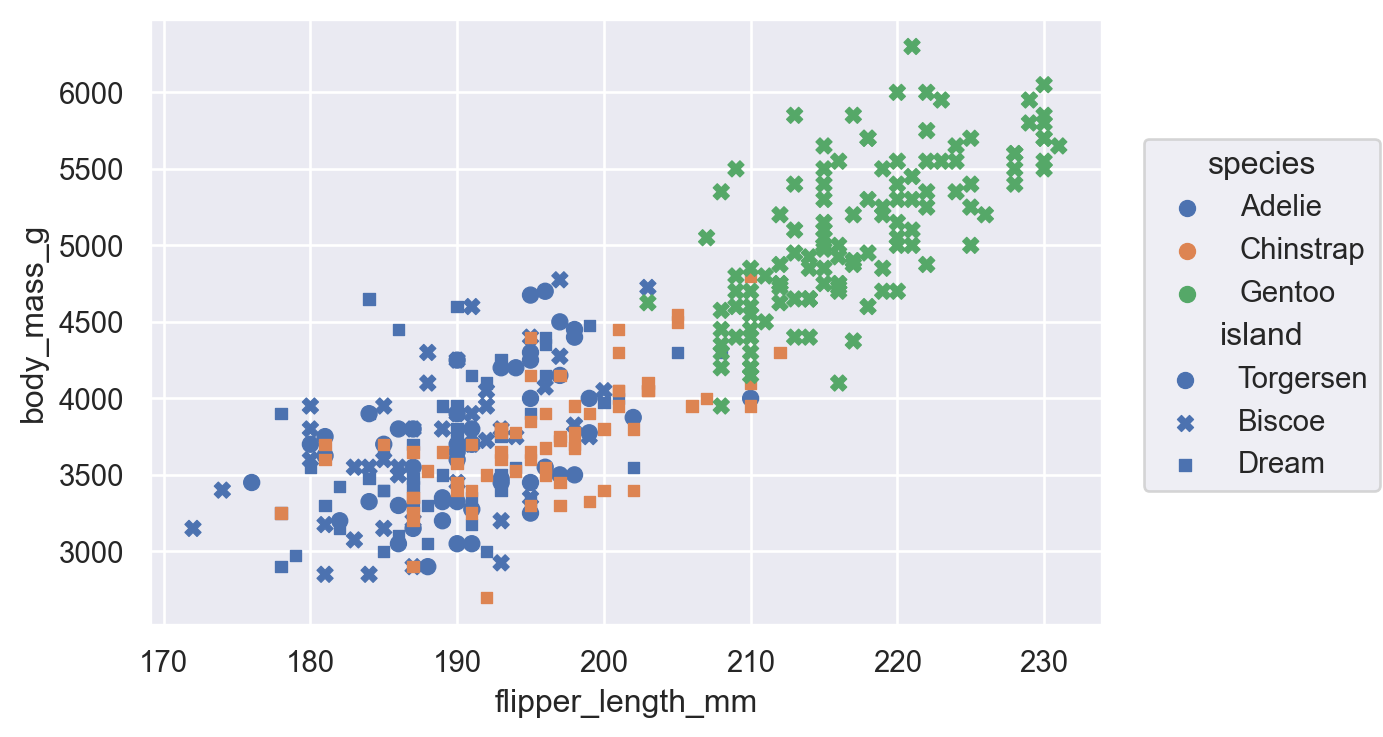

In [128]:
(
    so.Plot(penguins, x="flipper_length_mm", y="body_mass_g",
            color="species", marker="island")
    .add(so.Dot())
    .layout(size=(6, 4))
)

Facet의 활용

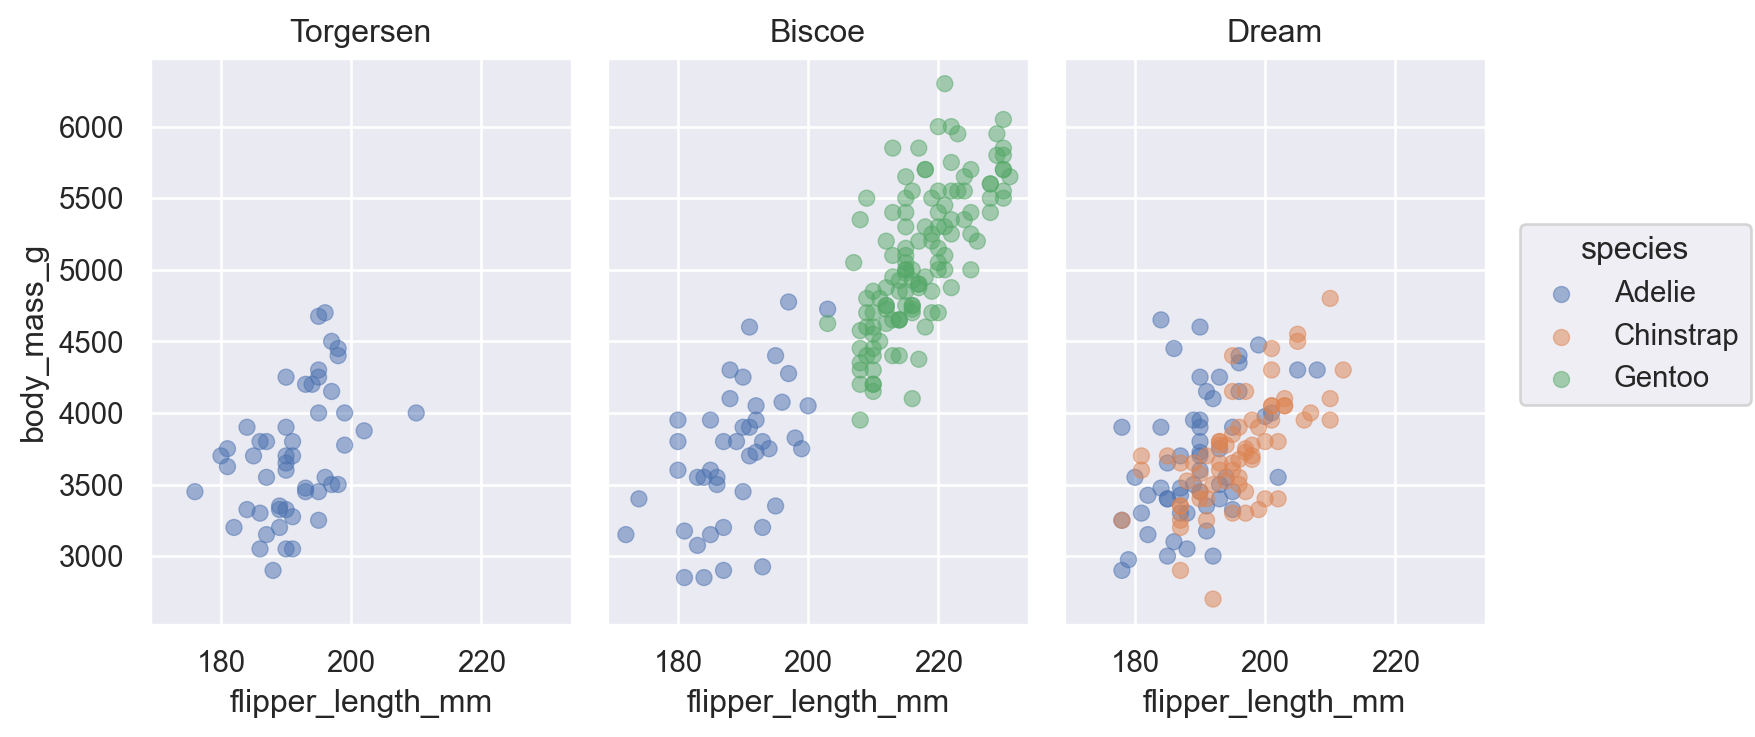

In [122]:
(
    so.Plot(penguins, x="flipper_length_mm", y="body_mass_g",
            color="species")
    .add(so.Dot(alpha=.5))
    .facet("island")
    .layout(size=(8, 4))
)

### Time series

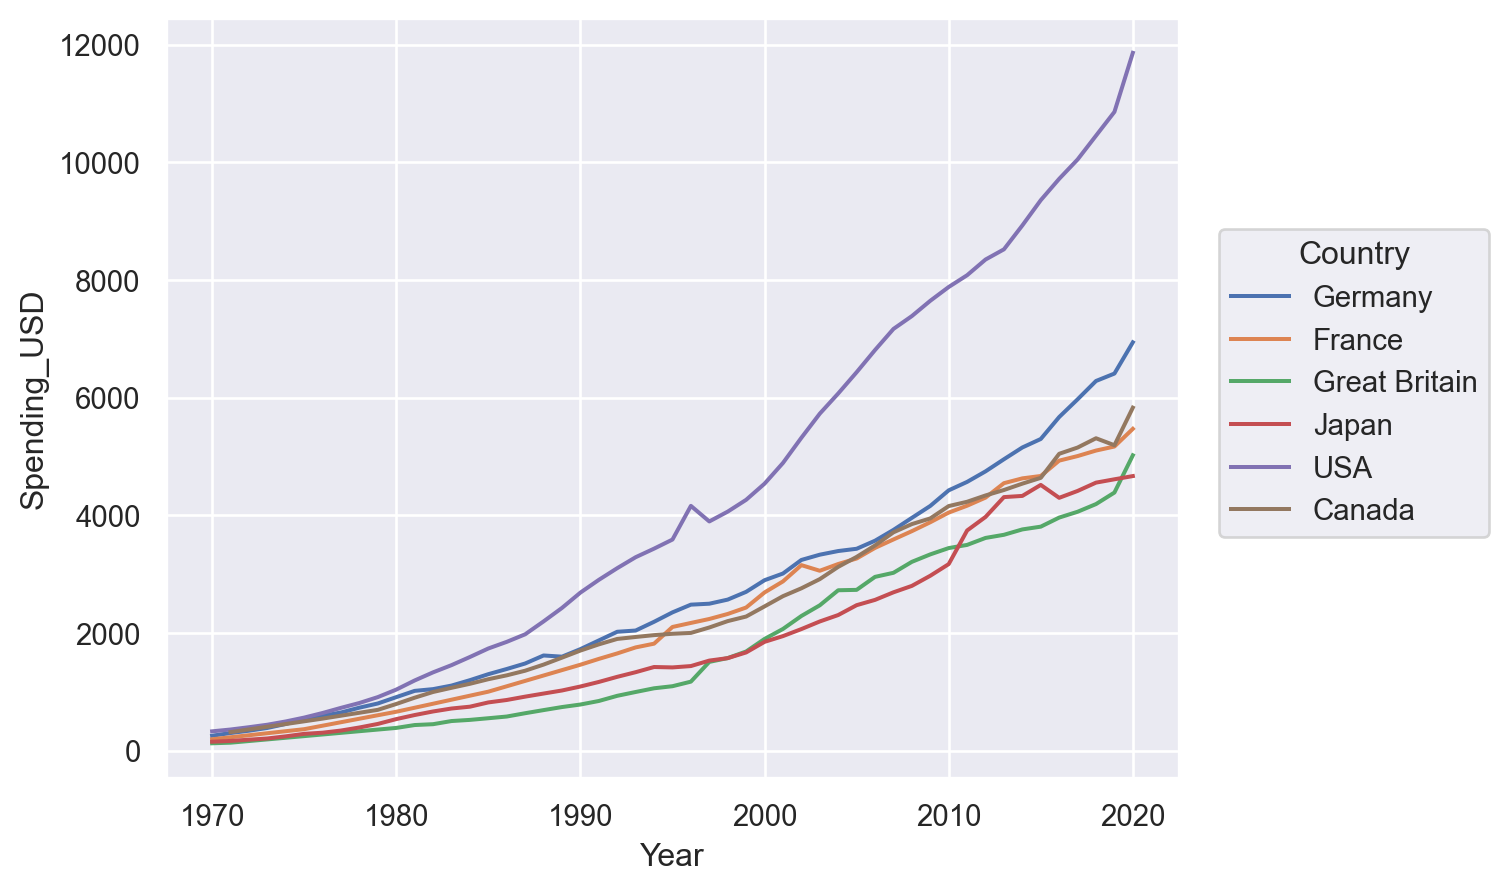

In [149]:
healthexp = sns.load_dataset("healthexp")

(
    so.Plot(healthexp, x="Year", y="Spending_USD", color="Country")
    .add(so.Lines())
)

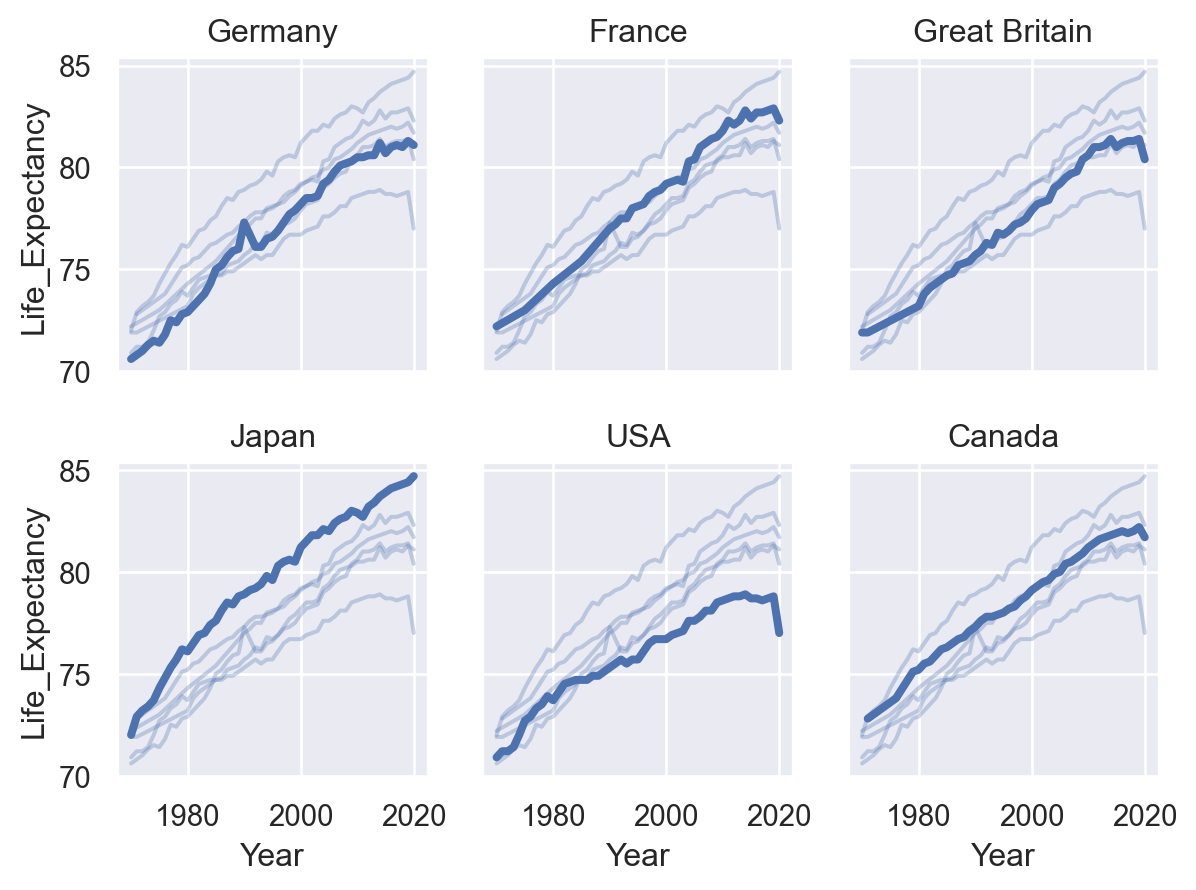

In [157]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .add(so.Line(alpha=.3), group="Country", col=None)
    .add(so.Line(linewidth=3))
    .facet("Country", wrap=3) # wrap!!!
)

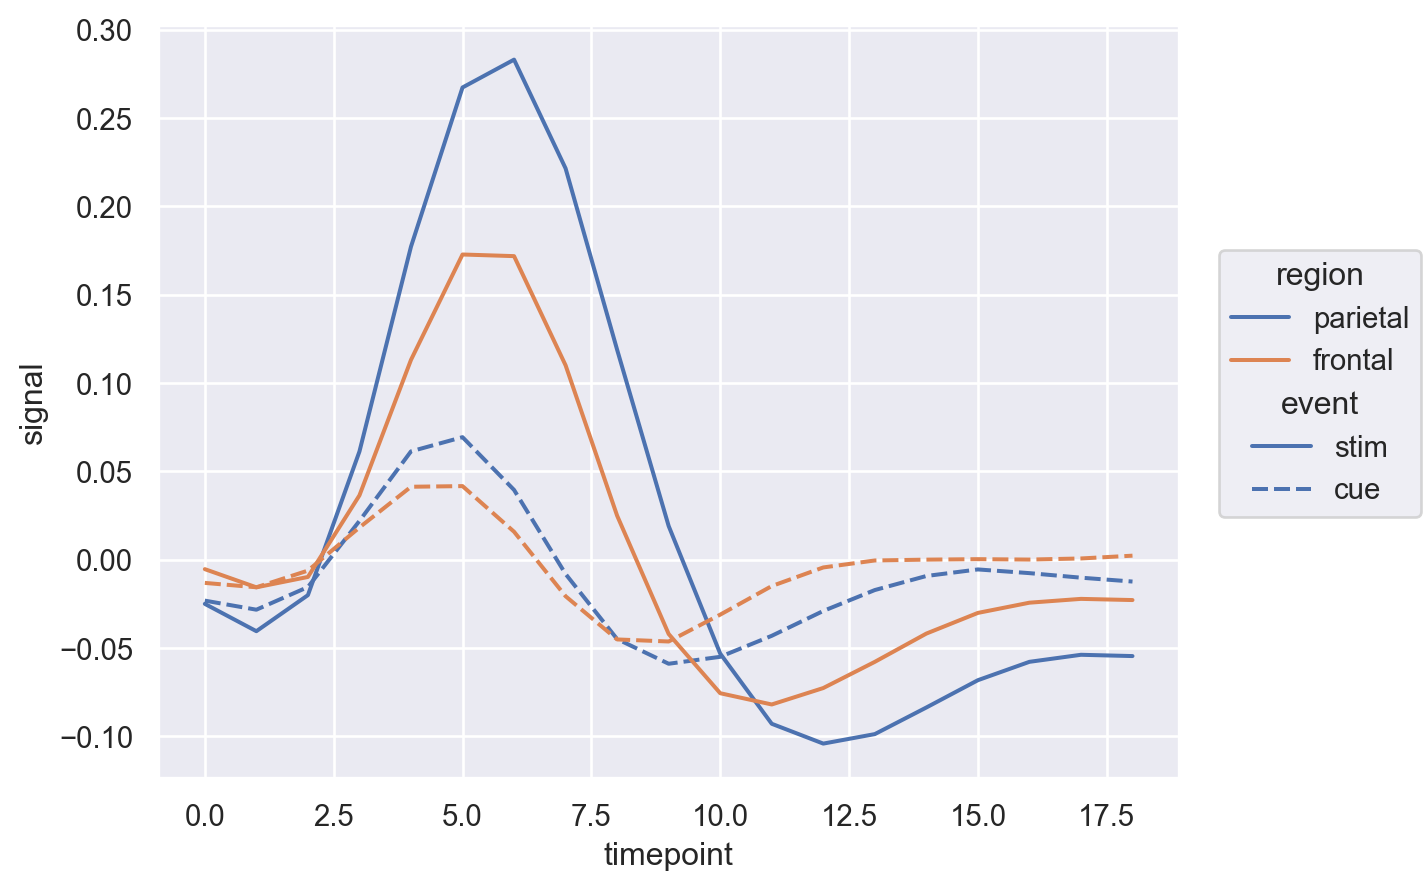

In [131]:
fmri = sns.load_dataset("fmri")

p = so.Plot(fmri, "timepoint", "signal", color="region", linestyle="event")
p.add(so.Line(), so.Agg())  # Agg()의 default 함수는 mean

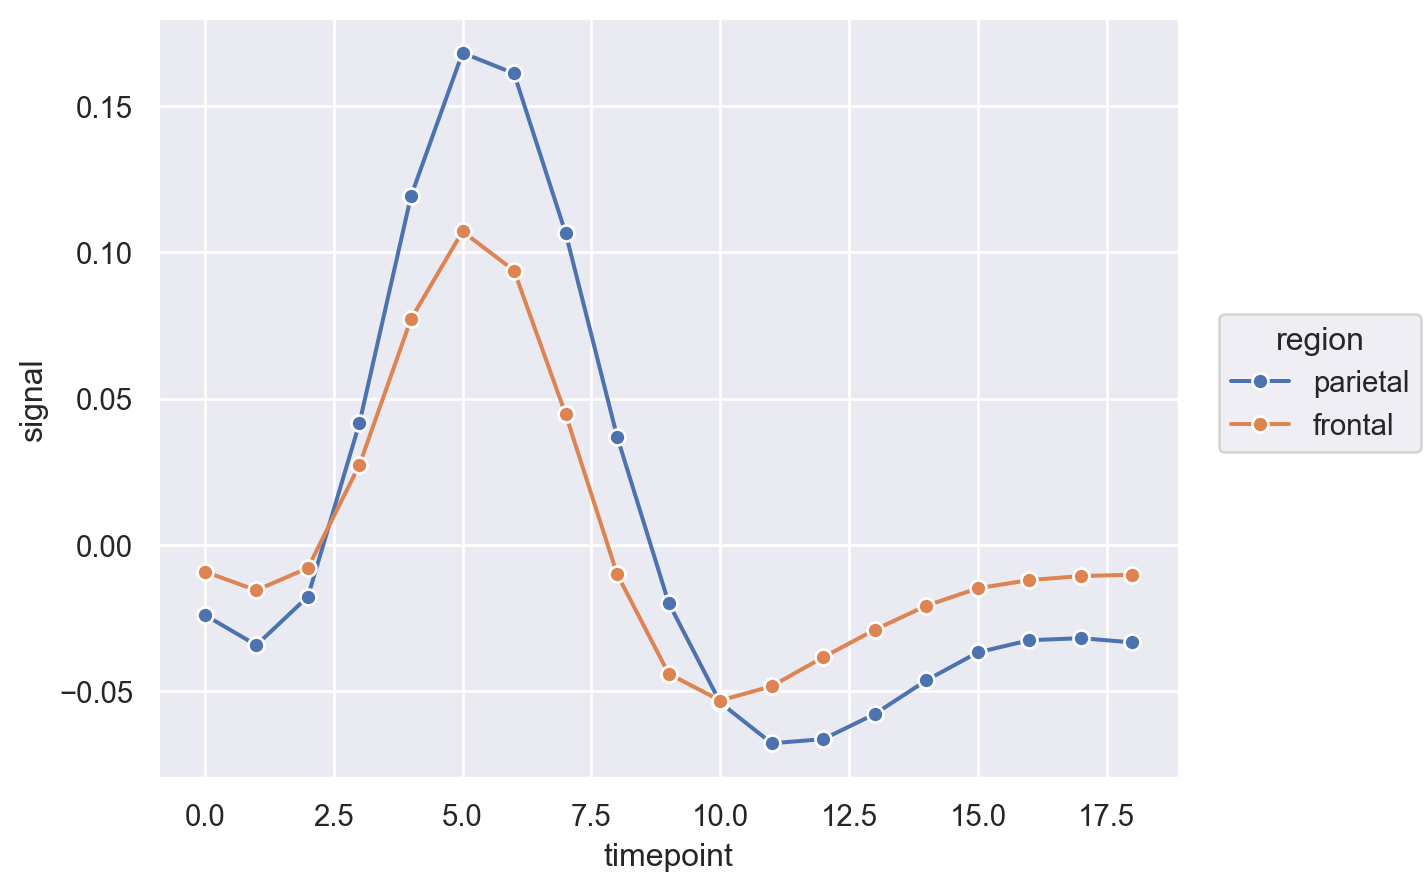

In [132]:
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)  # linestyle을 overwrite!

## Overploting

대표적으로 다음과 같은 방식으로 해결할 수 있음.  

- `alpha` property: 투명도를 조절  
- `so.Jitter()` mark: 흐트려뜨려 그리기  
- `so.Dots()` mark: 불투명, 테두리 선명한 점들  
- `.facet()` facet: 다른 면에 그리기

특별히 overplotting에 특화된 plots도 있음. 예를 들어,

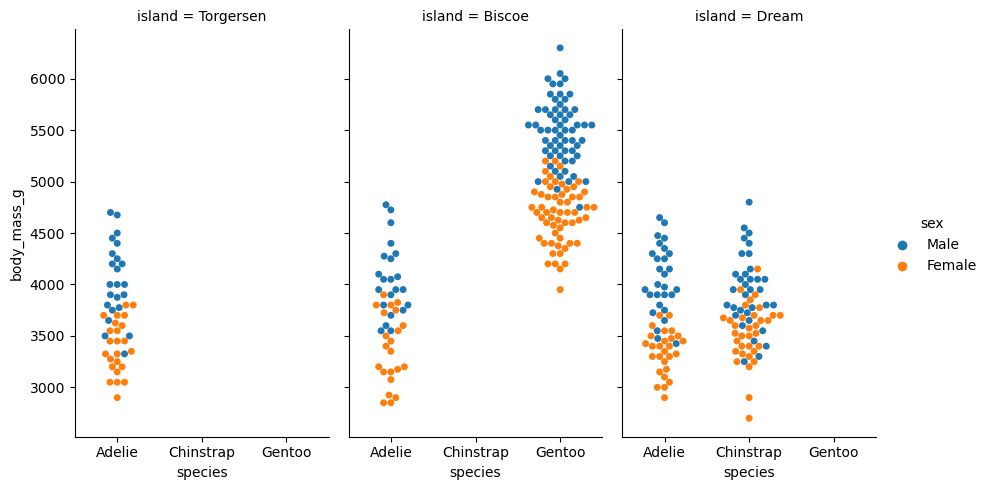

In [148]:
sns.catplot(
    data=penguins, kind="swarm",
    x="species", y="body_mass_g", hue="sex", col="island",
    aspect=.6
)
plt.show()

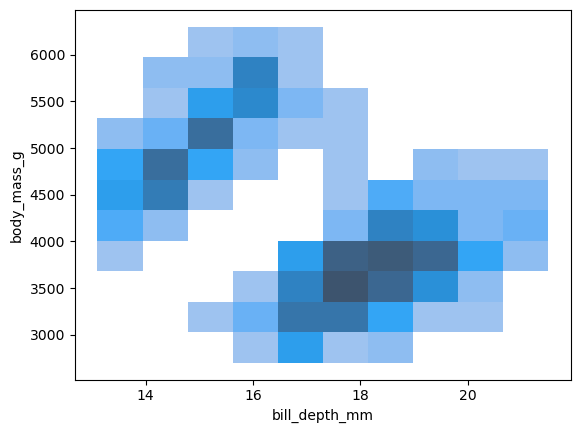

In [149]:
#| layout-ncol: 2
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")
plt.show()

## New data
새로운 데이터 값을 이용하고자 할 때, 직접 입력

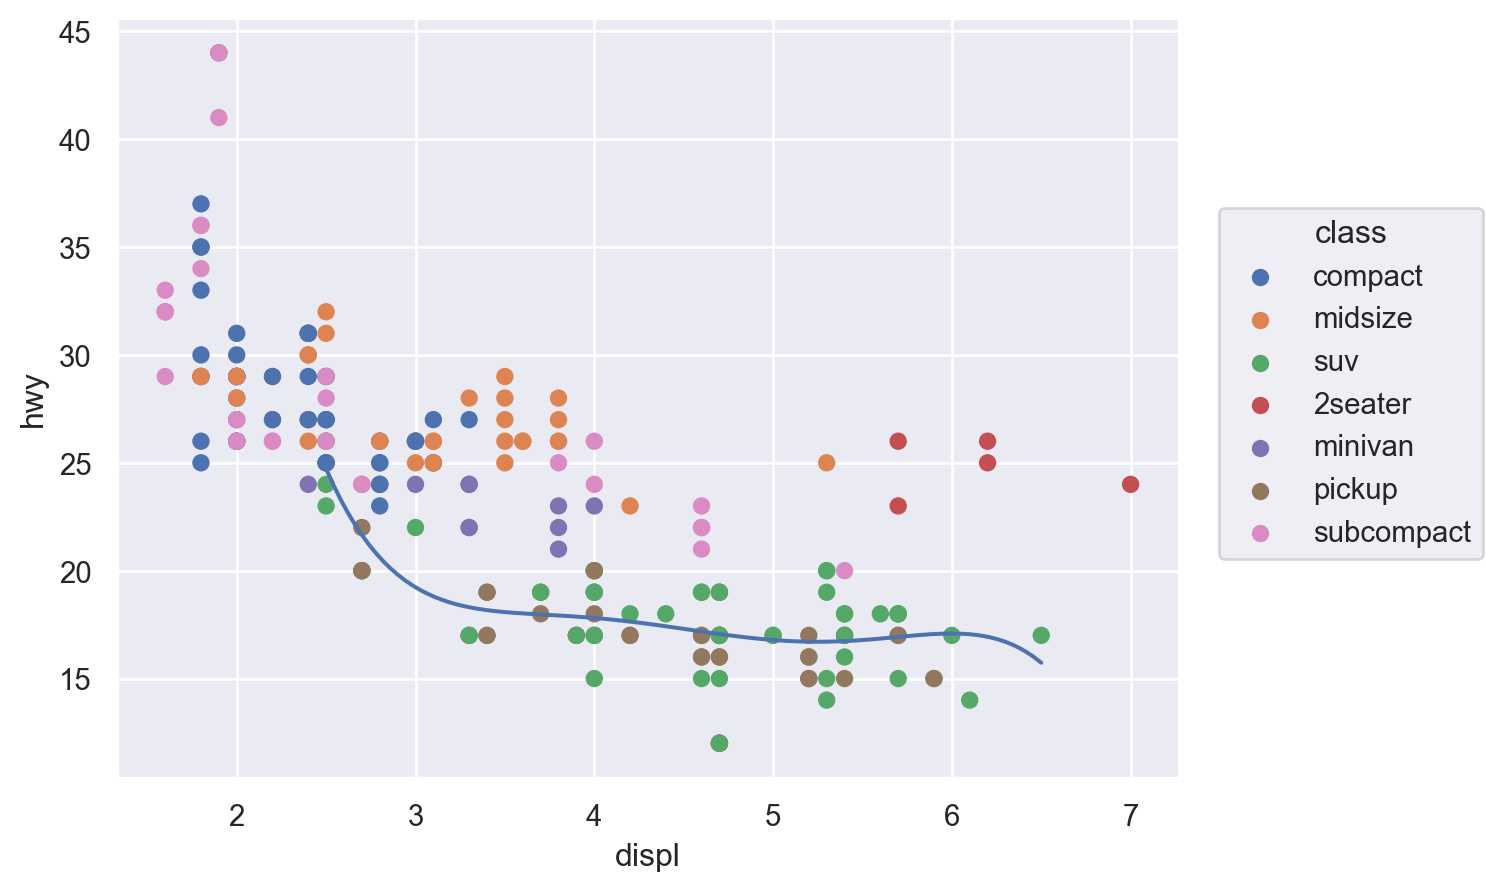

In [19]:
mpg_suv = mpg.query('`class` == "suv"')

(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(), color="class")
    .add(so.Line(), so.PolyFit(5), 
         x=mpg_suv["displ"], y=mpg_suv["hwy"])
)

## Exercises
다음 데이터들로 위에서 다룬 시각화를 연습해보세요.

1. `tips` 
   
    ```python
    tips = sns.load_dataset("tips")
    ```

2. Data on houses in Saratoga County, New York, USA in 2006
   
   ```python
   houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
   
   houses = houses_data.data # data
   print(houses_data.__doc__) # documents
   ```